In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import f_oneway, chi2_contingency
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, log_loss, roc_curve, auc)




In [2]:
df = pd.read_csv('data.csv')

df.head()


Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [3]:
print("Missing Values:\n", df.isnull().sum())

df.dropna(inplace=True)

duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    df.drop_duplicates(inplace=True)



Missing Values:
 Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64
Number of duplicate rows: 0


In [4]:
df['Bankrupt?'] = df['Bankrupt?'].astype('category')
df[' Liability-Assets Flag'] = df[' Liability-Assets Flag'].astype('category')
df[' Net Income Flag'] = df[' Net Income Flag'].astype('category')

numerical_features = df.select_dtypes(include=['number']).columns
categorical_features = df.drop(columns=['Bankrupt?']).select_dtypes(include=['category']).columns

print("Numerical Features:\n", numerical_features)
print("Categorical Features:\n", categorical_features)


Numerical Features:
 Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operatin

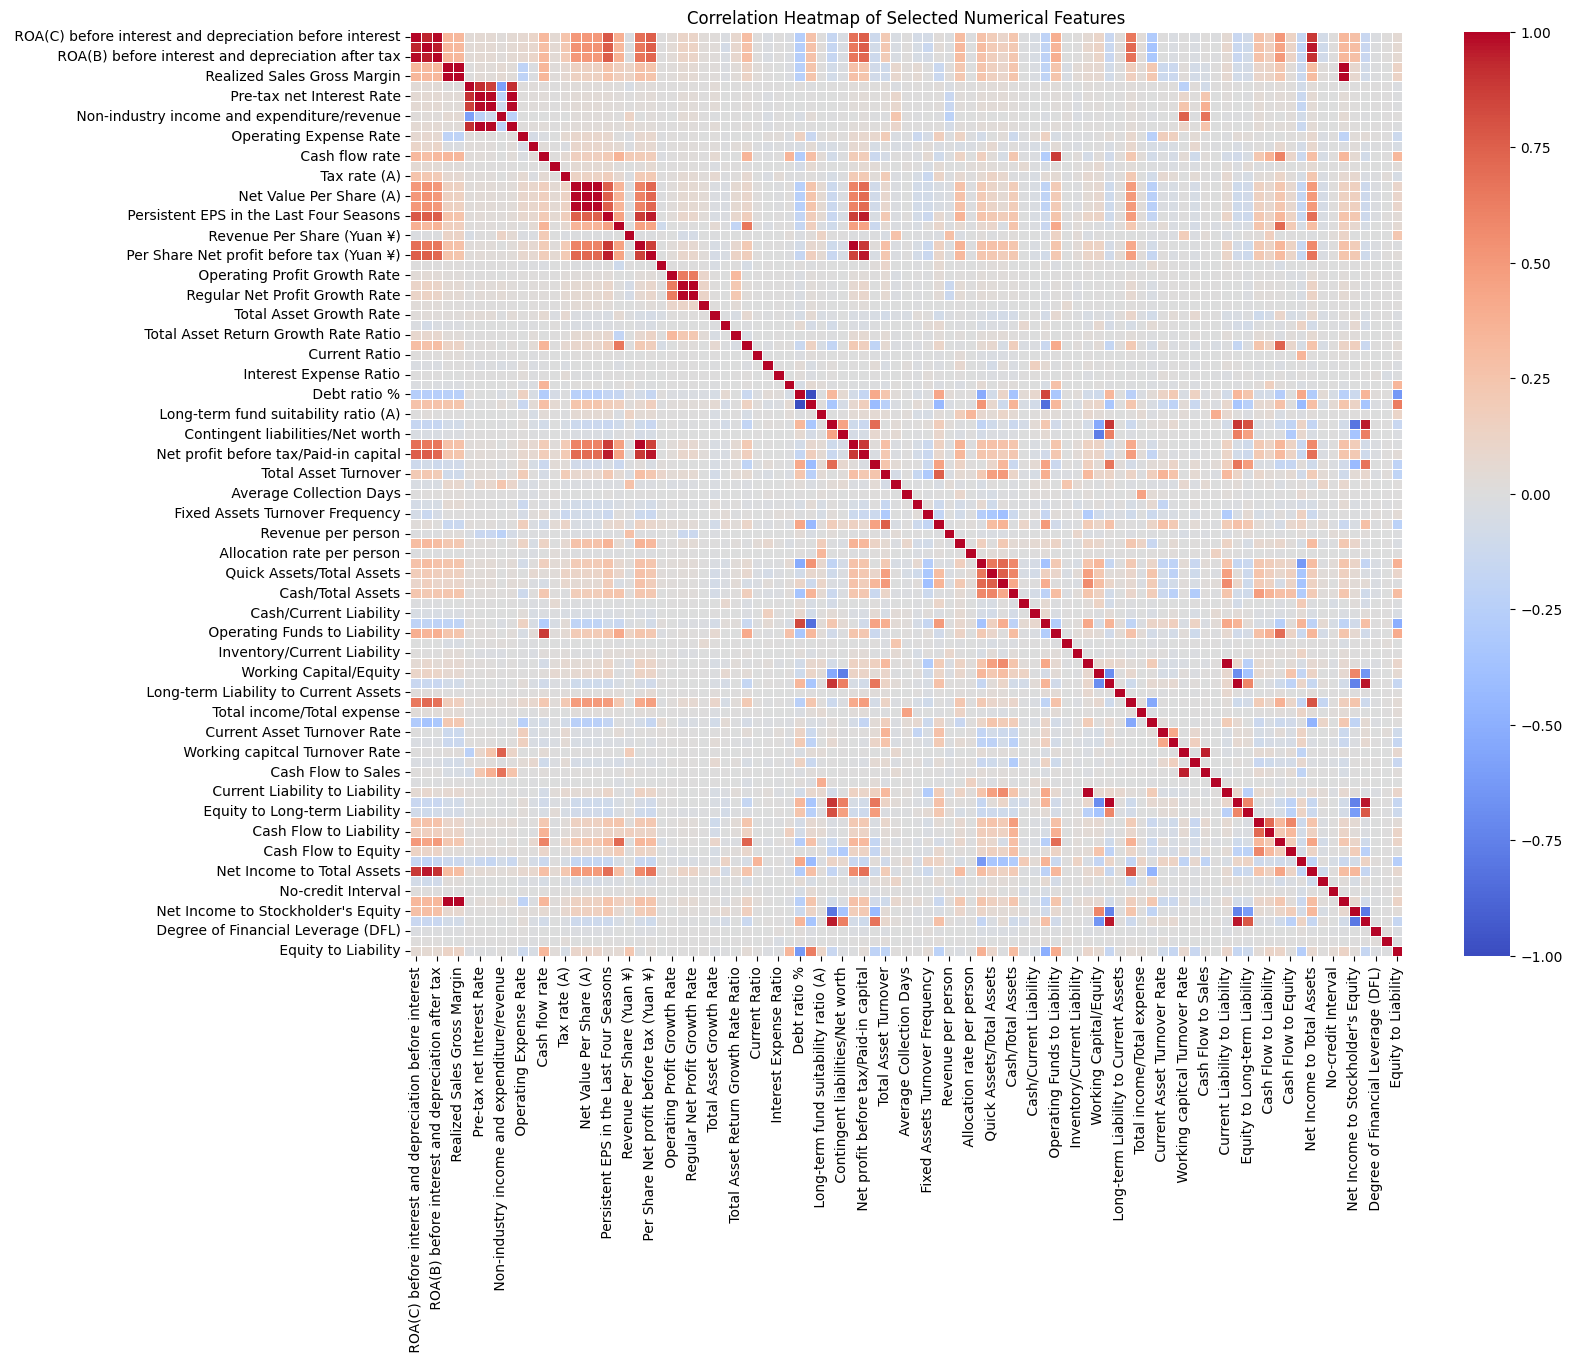

In [5]:
plt.figure(figsize=(16, 12))
correlation_matrix_numerical = df[numerical_features].corr()
sns.heatmap(correlation_matrix_numerical, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Numerical Features')
plt.show()

Reduced Numerical Features:
 [' ROA(C) before interest and depreciation before interest', ' Operating Gross Margin', ' Operating Profit Rate', ' Non-industry income and expenditure/revenue', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Continuous Net Profit Growth Rate', ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %', ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio', ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets', ' Long-term fund suitability ratio (A)', ' Borrowing dependency', ' Contingent liabilities/Net worth', ' Total Asset Turnover', ' Accounts Receivable Turnover', ' Average Collectio

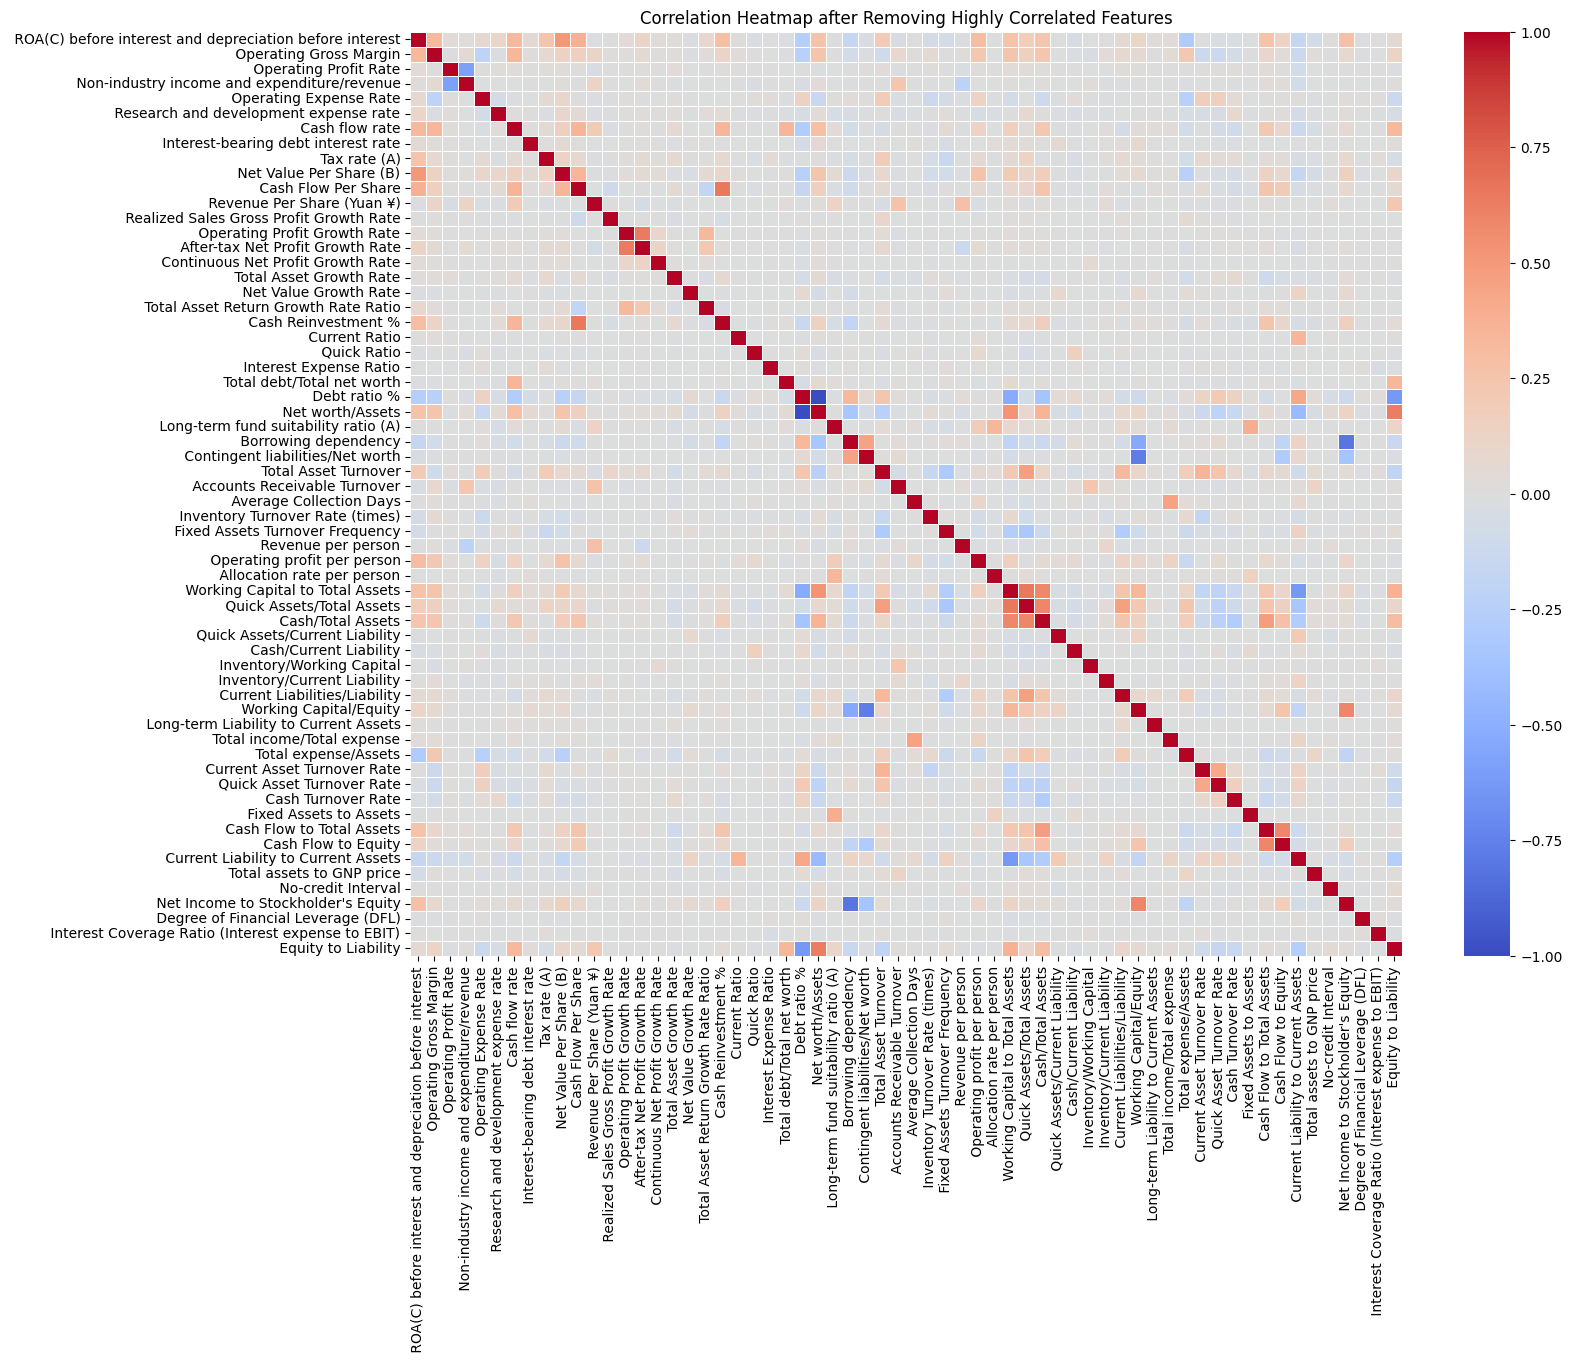

In [6]:
# drop features w/ high correlation
threshold = 0.70
high_correlation_drop = []

for i in range(len(correlation_matrix_numerical.columns)):
    for j in range(i):
        if correlation_matrix_numerical.iloc[i, j] > threshold:
            feature_name = correlation_matrix_numerical.columns[i]
            if feature_name not in high_correlation_drop:
                high_correlation_drop.append(feature_name)

# Remaining features 
numerical_features_reduced = [feature for feature in numerical_features if feature not in high_correlation_drop]
print("Reduced Numerical Features:\n", numerical_features_reduced)


plt.figure(figsize=(16, 12))
correlation_matrix_reduced = df[numerical_features_reduced].corr()
sns.heatmap(correlation_matrix_reduced, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap after Removing Highly Correlated Features')
plt.show()


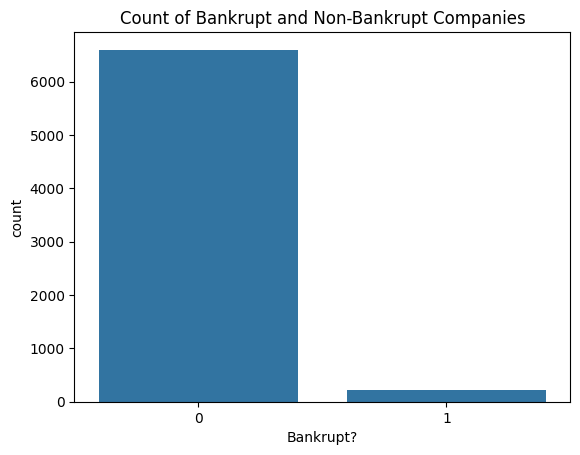

In [7]:
sns.countplot(x='Bankrupt?', data=df)
plt.title('Count of Bankrupt and Non-Bankrupt Companies')
plt.show()


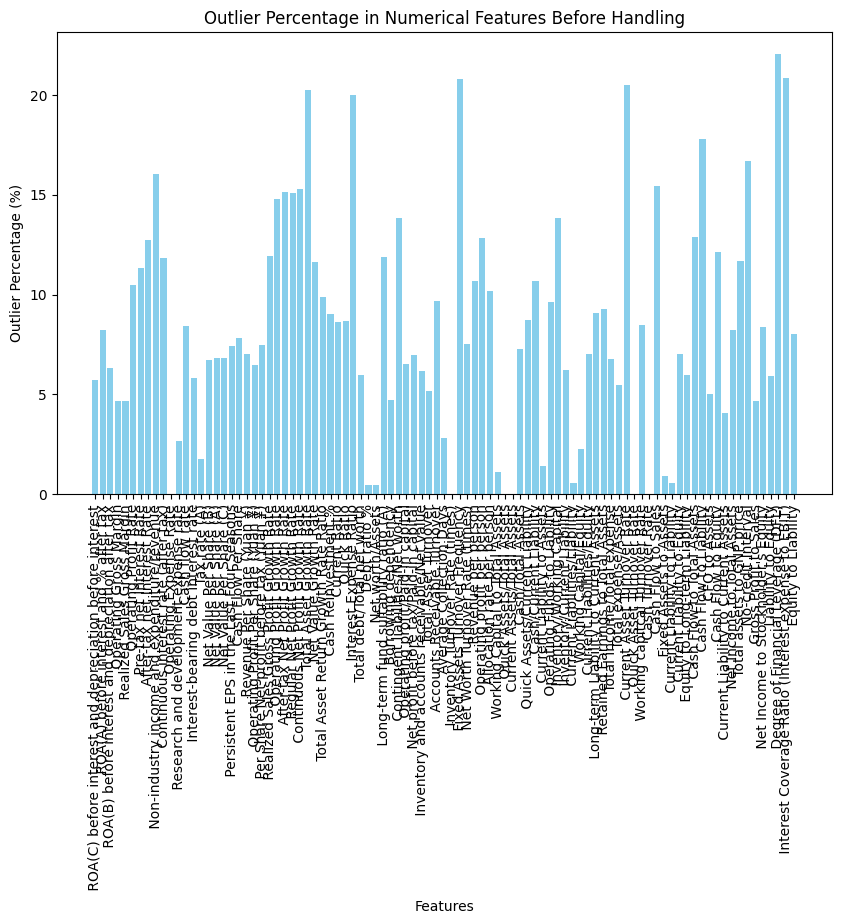

In [8]:
# percentage of outliers
def plot_outlier_histogram(dataframe):
    outlier_percentage = {}

    for feature in dataframe.select_dtypes(include=[np.number]).columns:
        Q1 = dataframe[feature].quantile(0.25)
        Q3 = dataframe[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = dataframe[(dataframe[feature] < lower_bound) | (dataframe[feature] > upper_bound)]
        outlier_percentage[feature] = (len(outliers) / len(dataframe)) * 100

    plt.figure(figsize=(10, 6))
    plt.bar(outlier_percentage.keys(), outlier_percentage.values(), color='skyblue')
    plt.xlabel('Features')
    plt.ylabel('Outlier Percentage (%)')
    plt.title('Outlier Percentage in Numerical Features Before Handling')
    plt.xticks(rotation=90)
    plt.show()

plot_outlier_histogram(df)


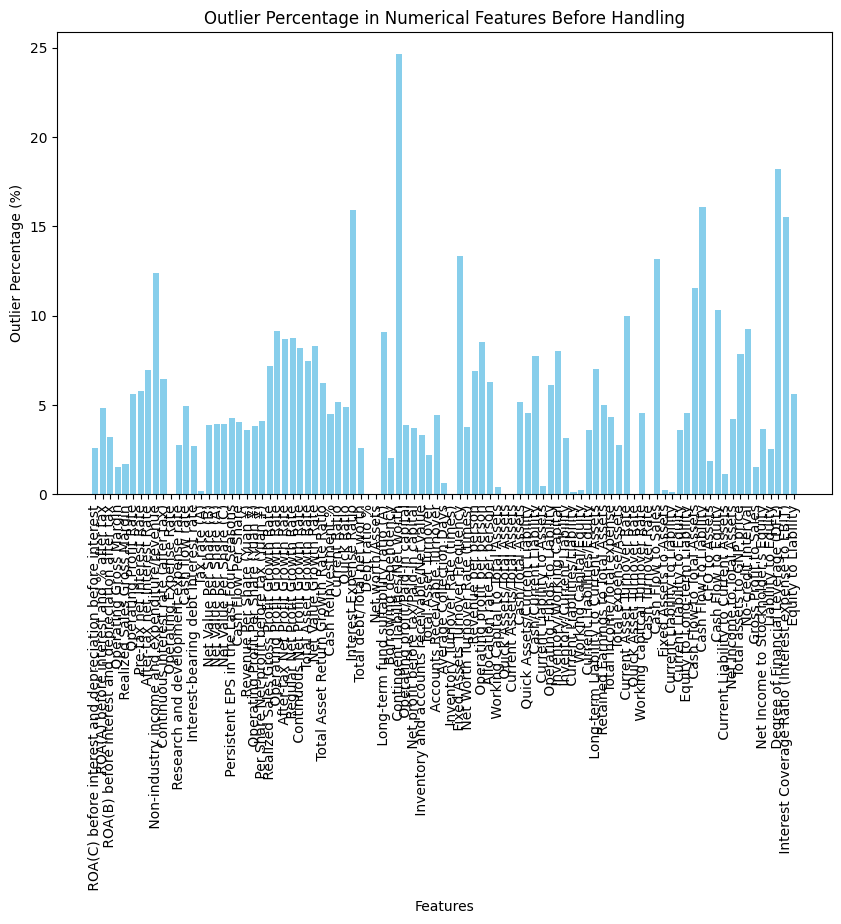

In [9]:
def replace_outliers_iqr(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), df[column].median(), df[column])
    return df

# Handling outliers
df = replace_outliers_iqr(df)

plot_outlier_histogram(df)


C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


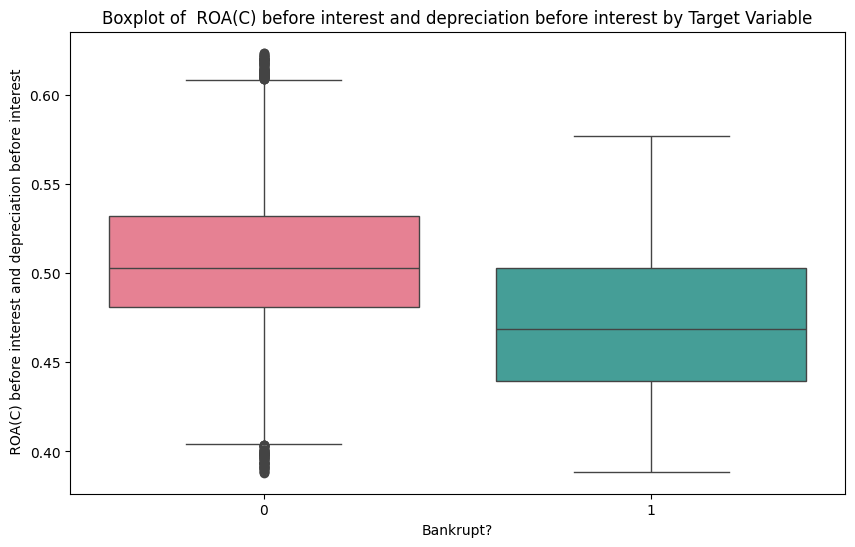

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


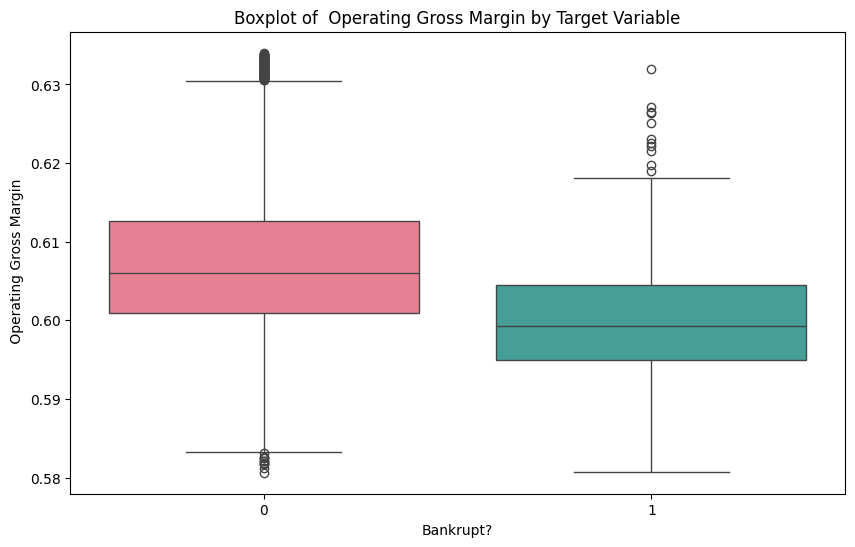

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


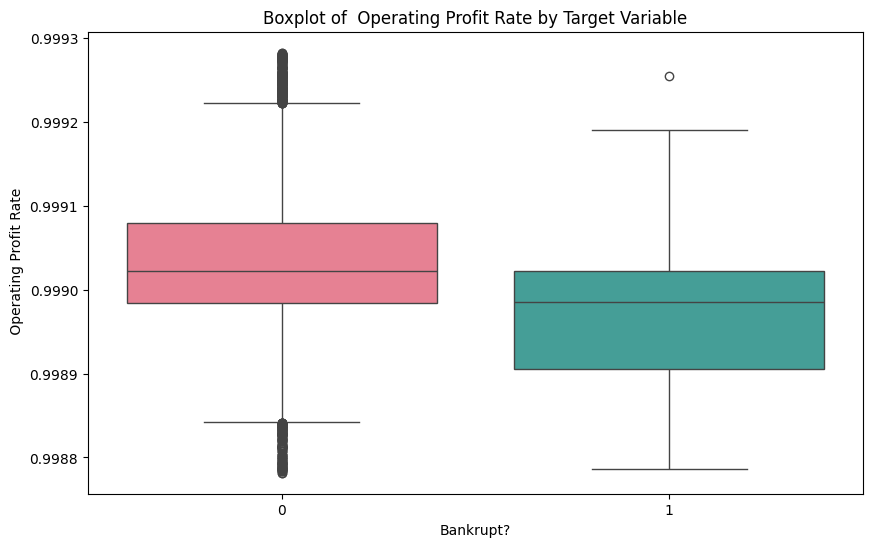

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


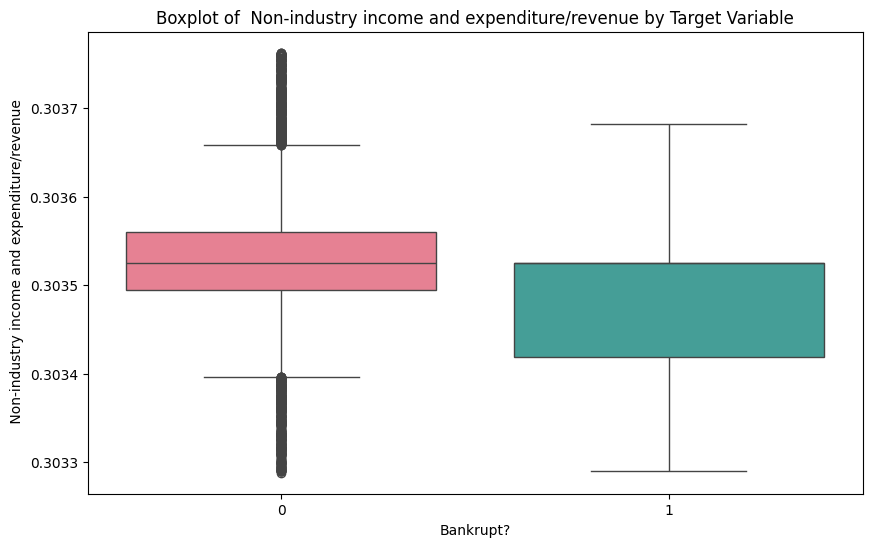

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


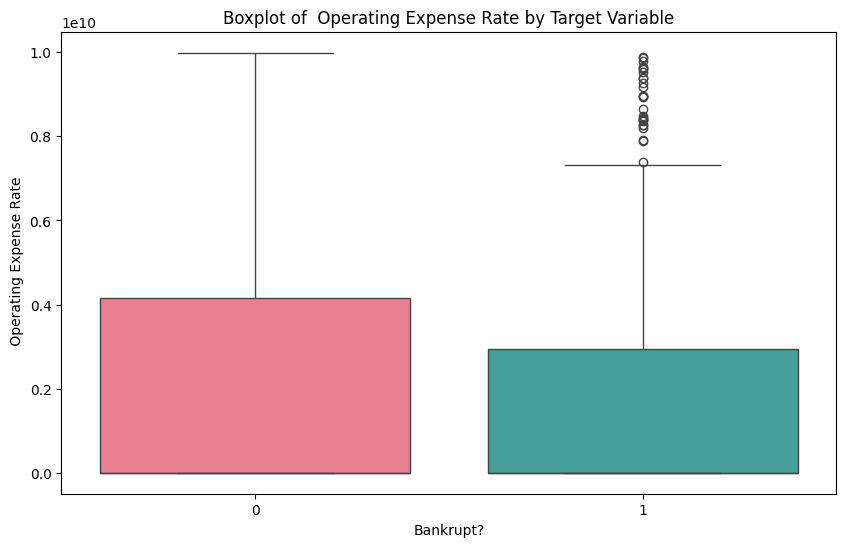

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


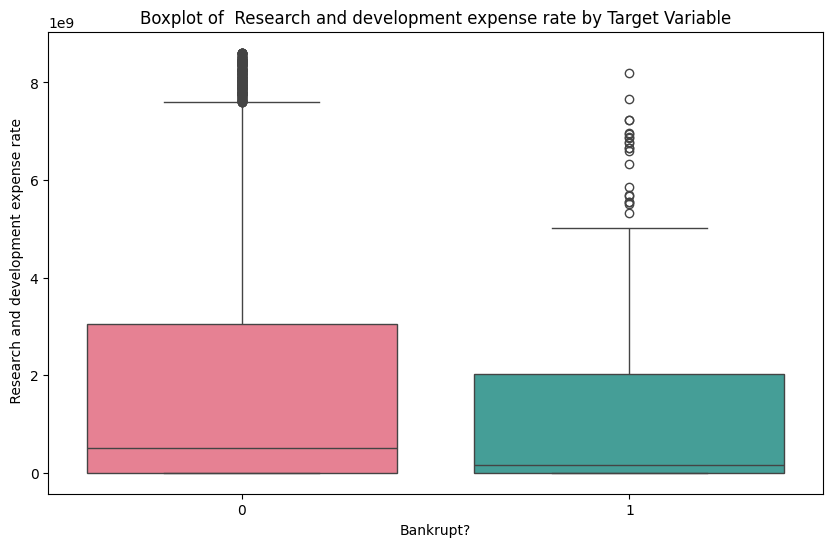

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


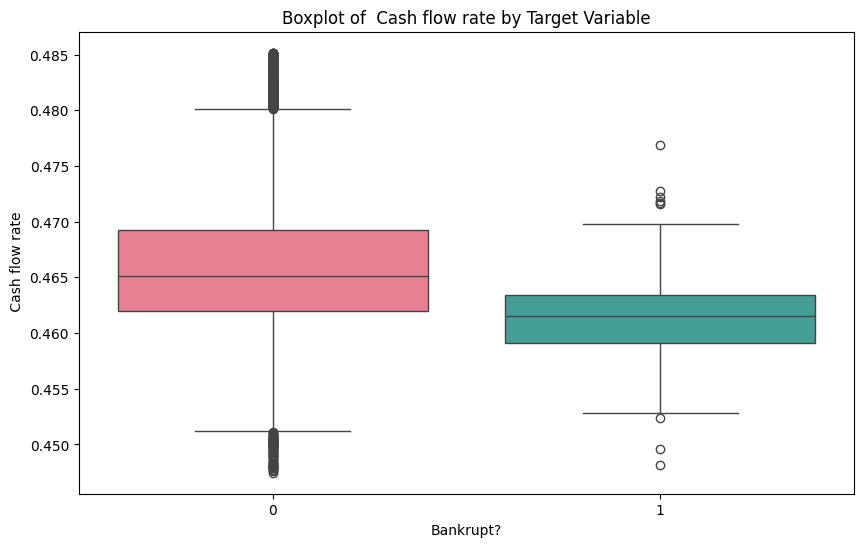

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


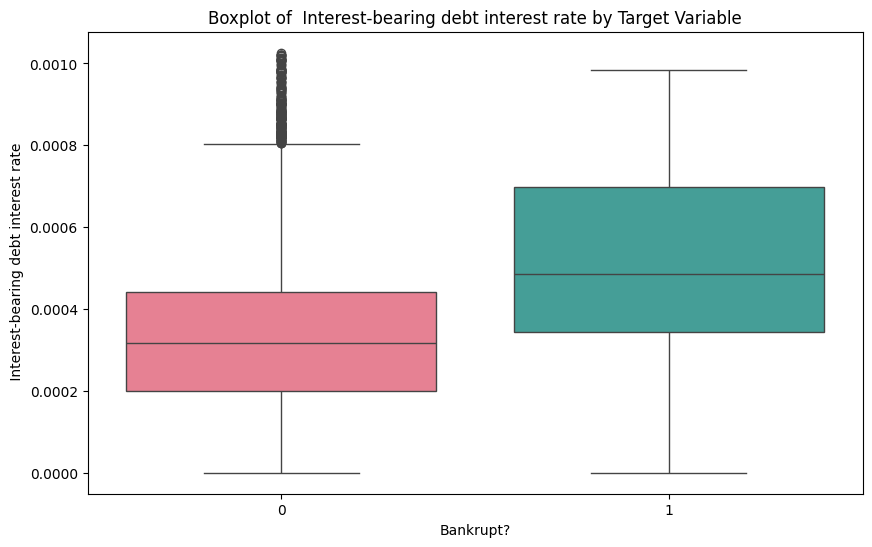

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


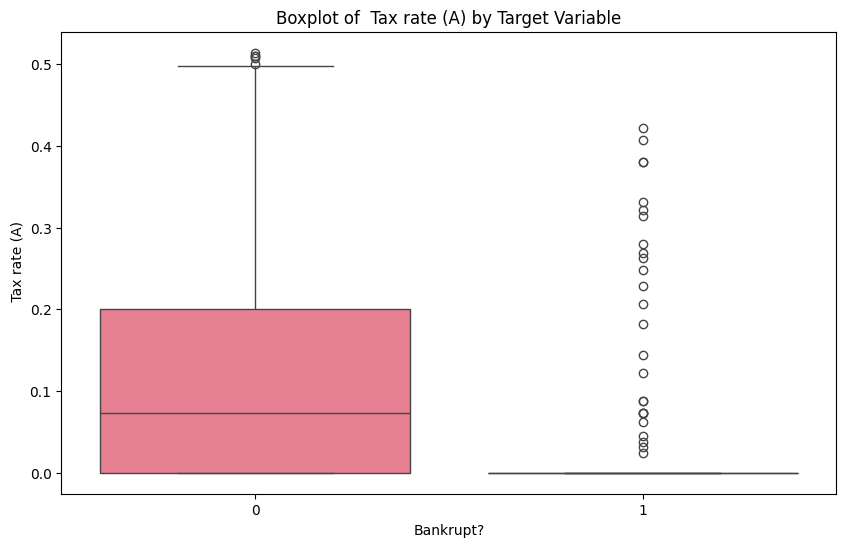

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


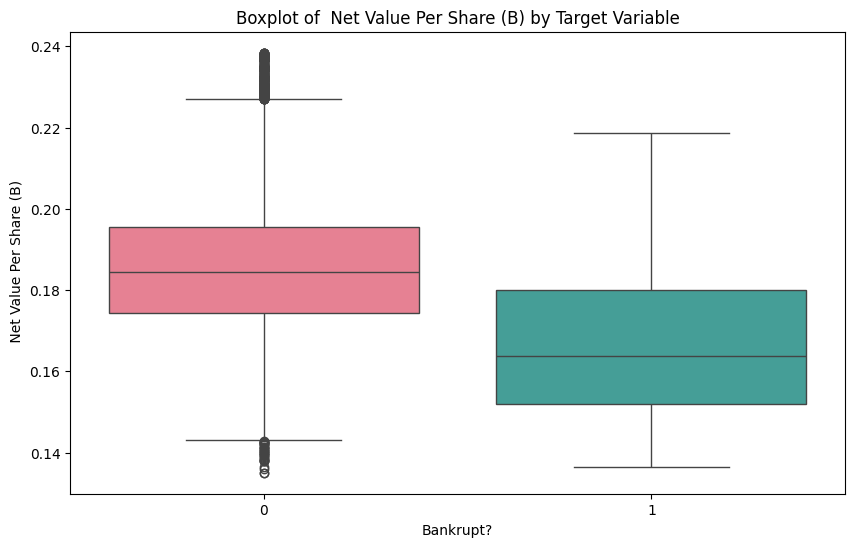

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


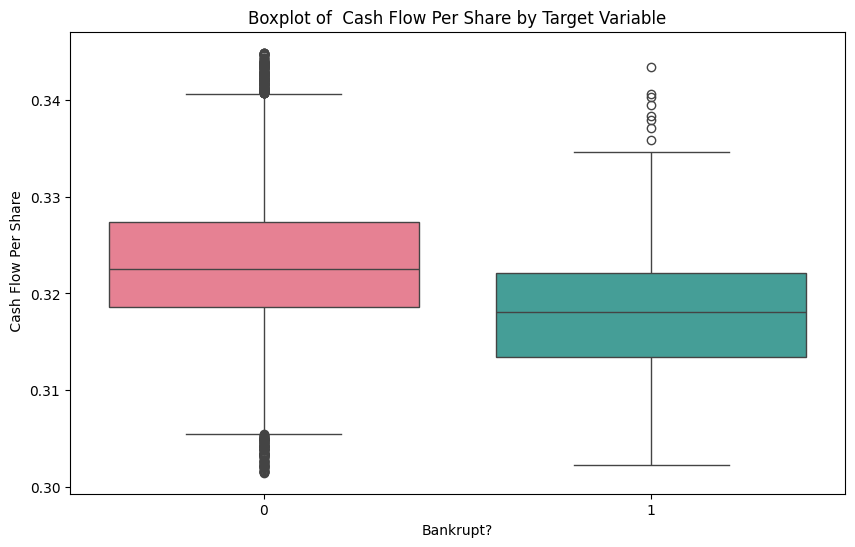

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


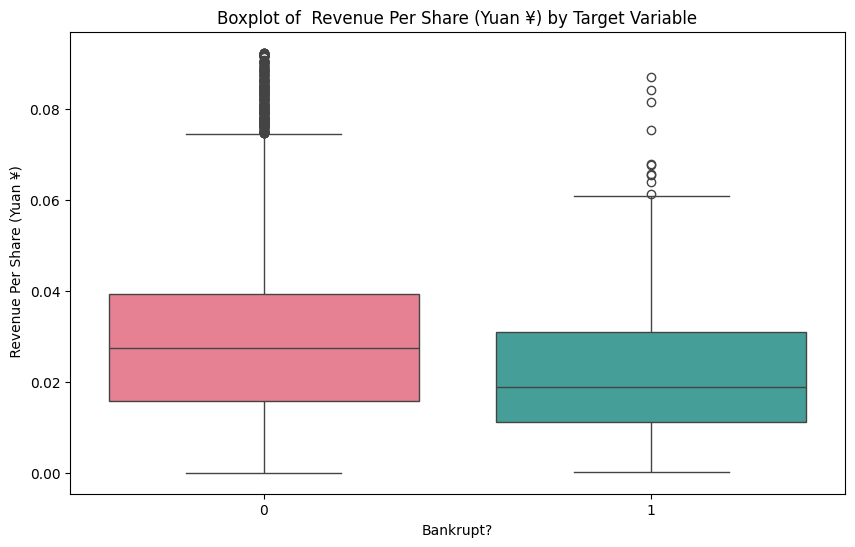

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


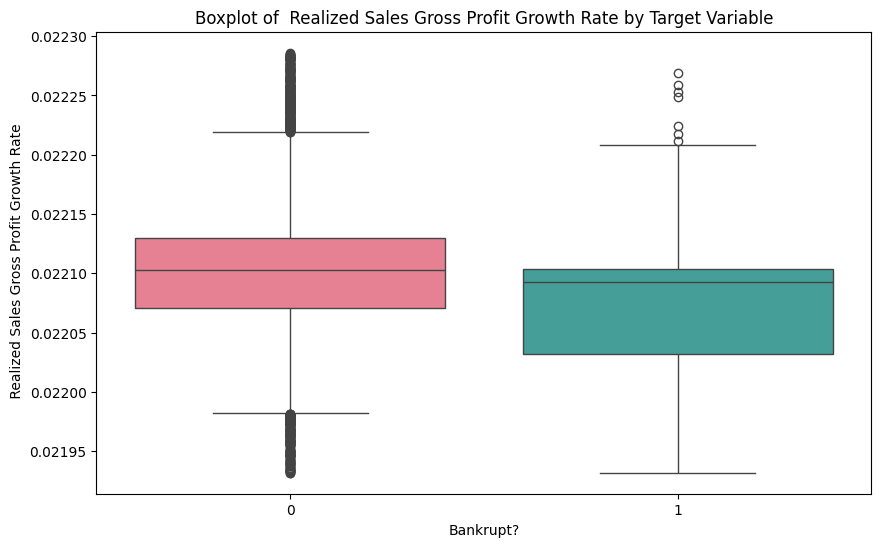

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


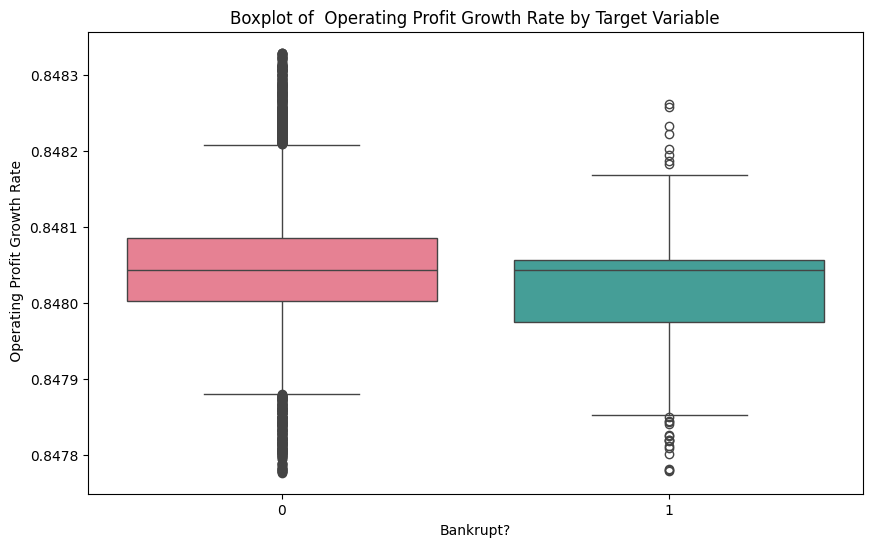

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


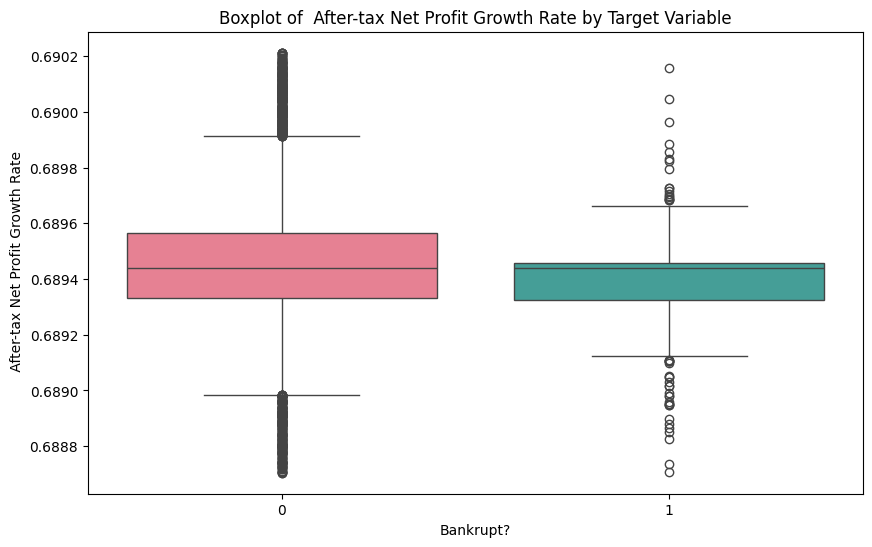

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


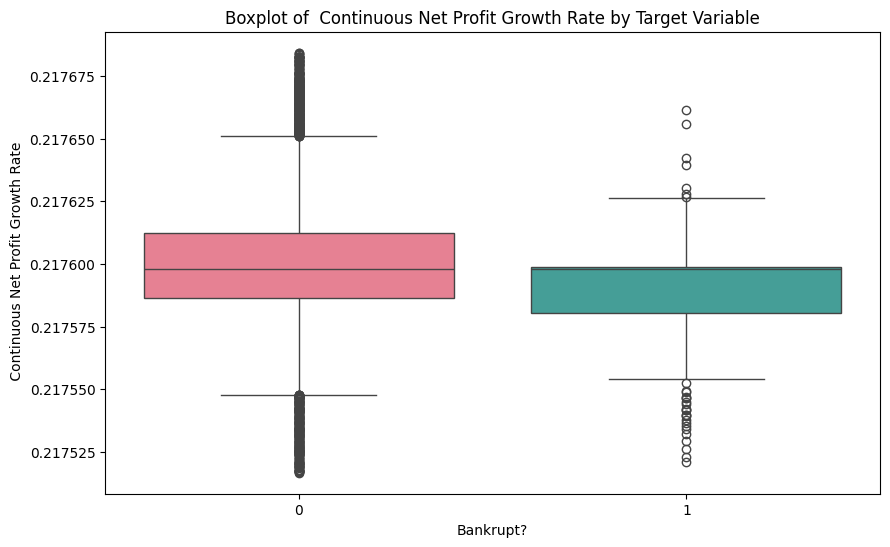

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


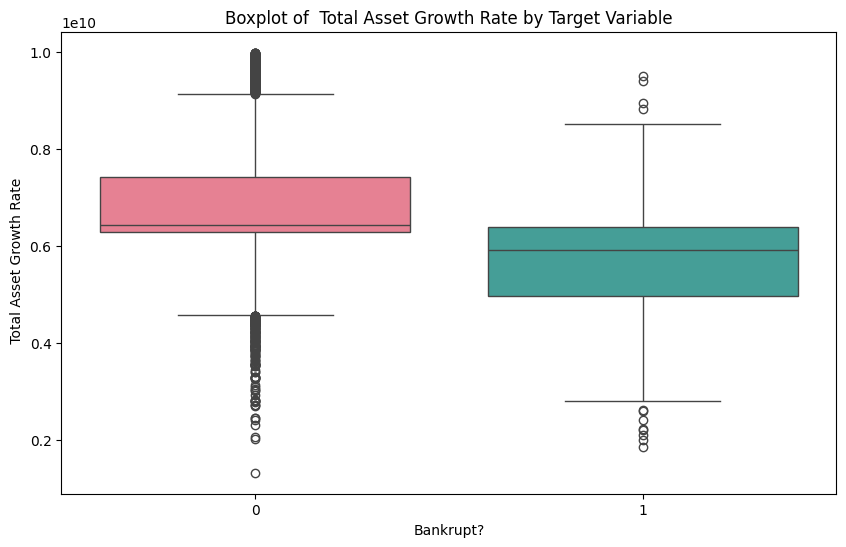

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


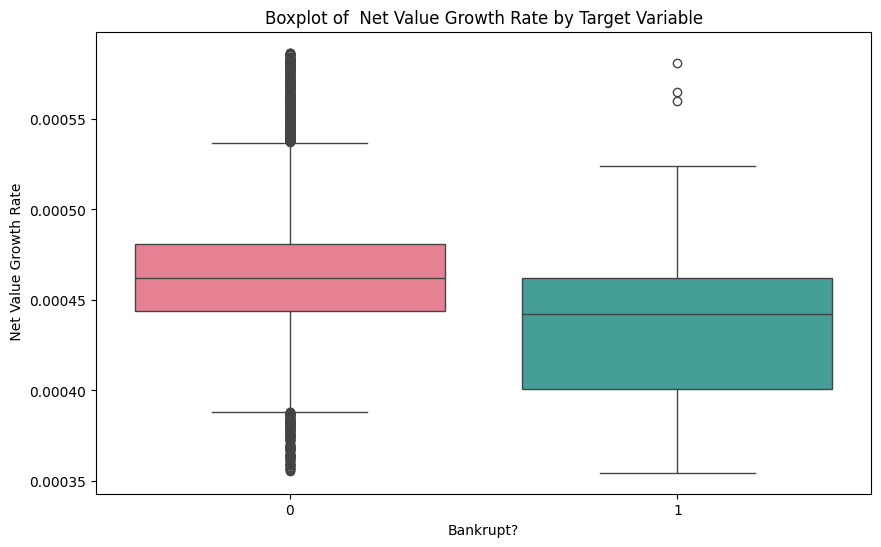

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


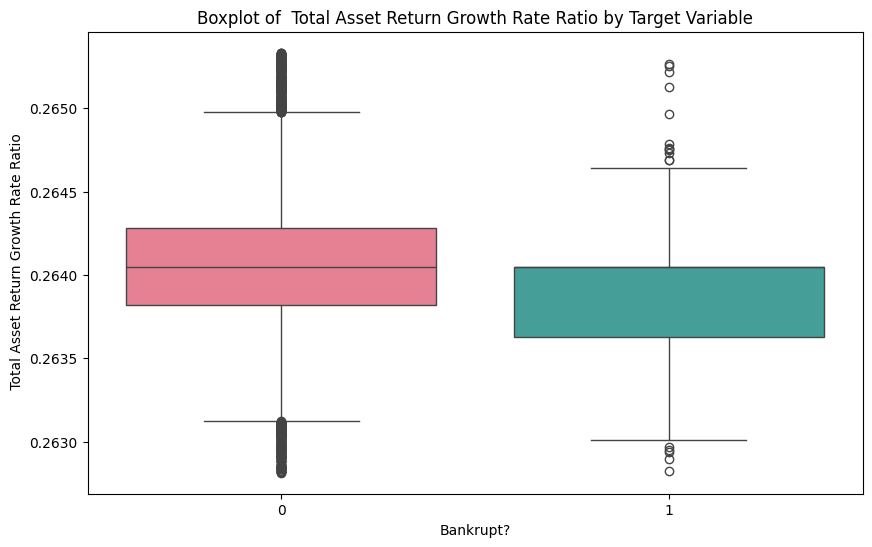

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


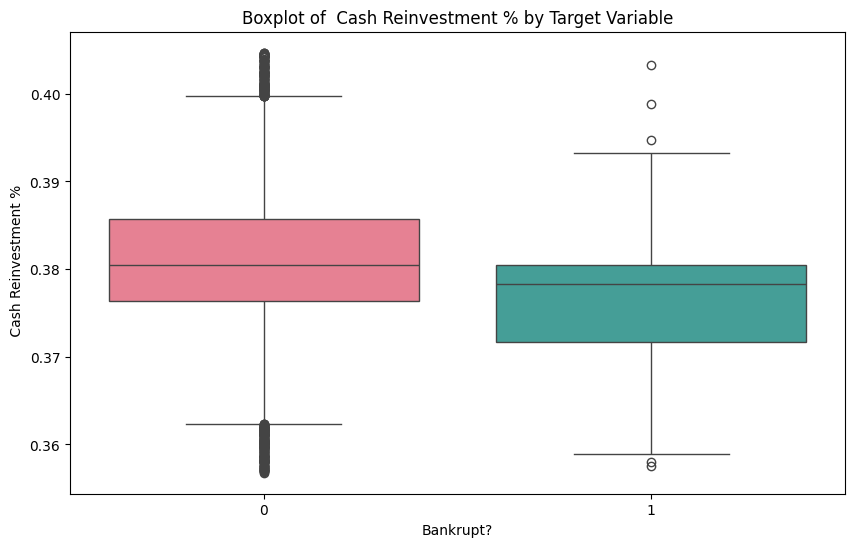

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


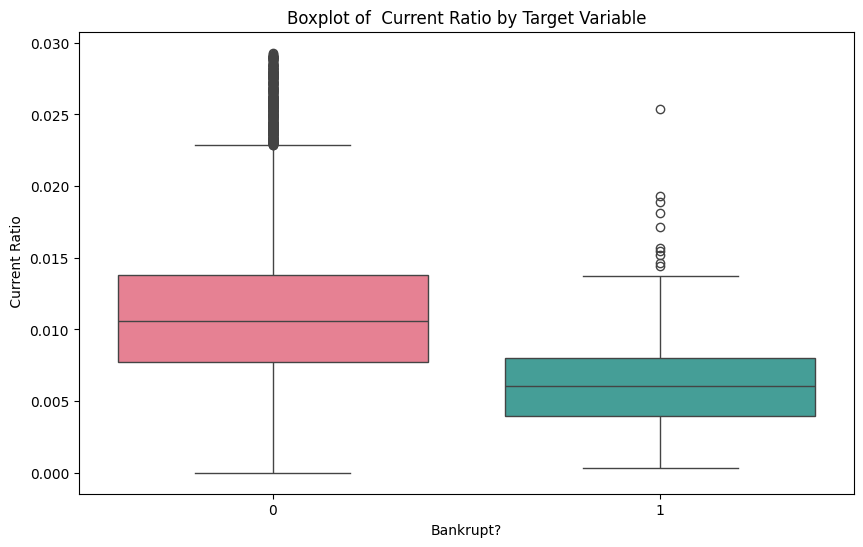

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


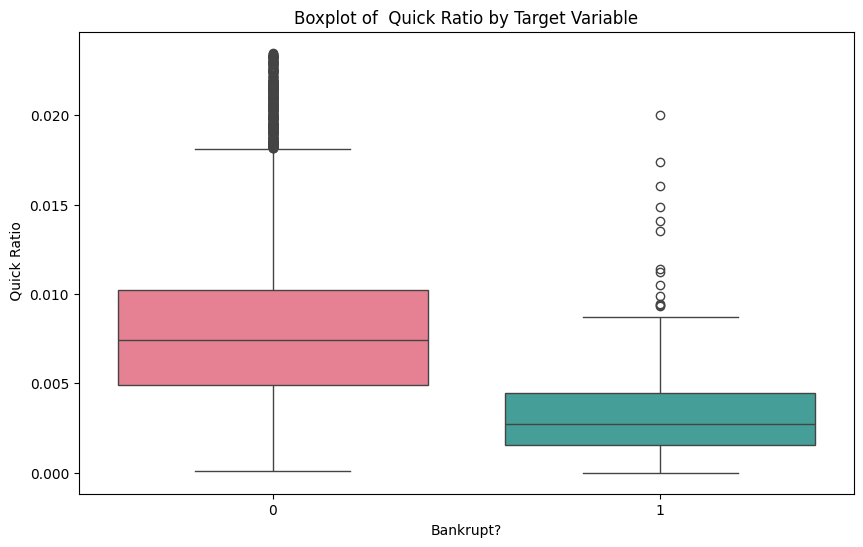

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


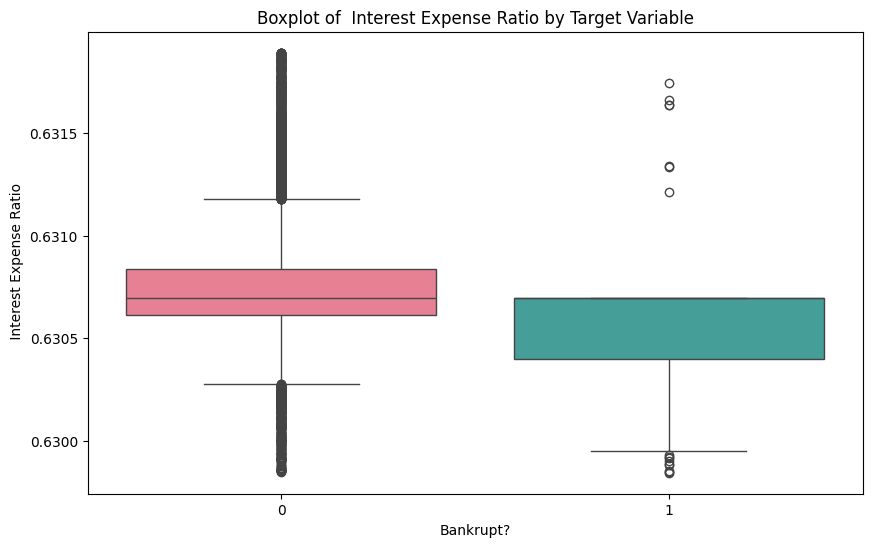

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


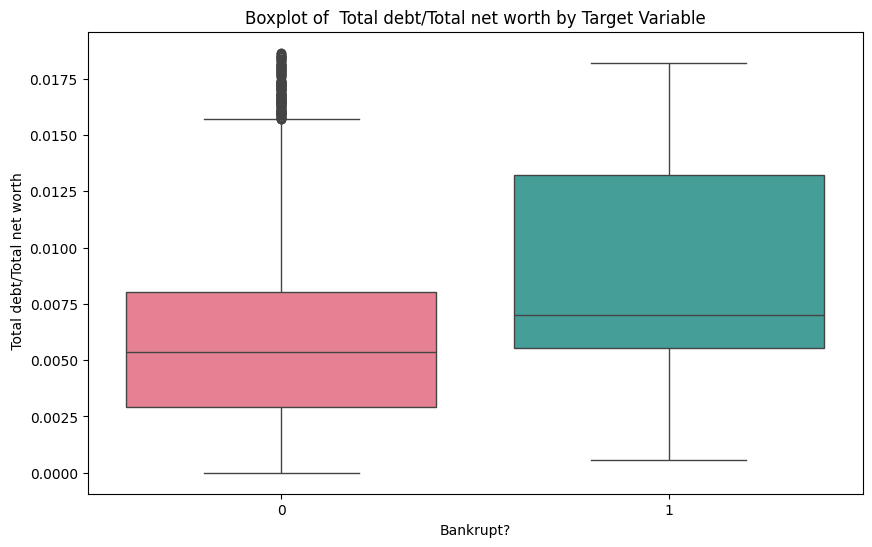

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


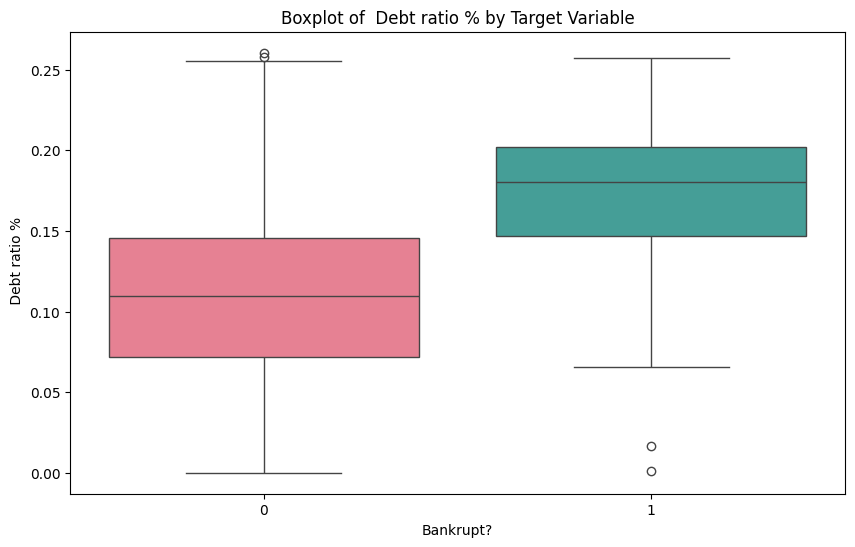

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


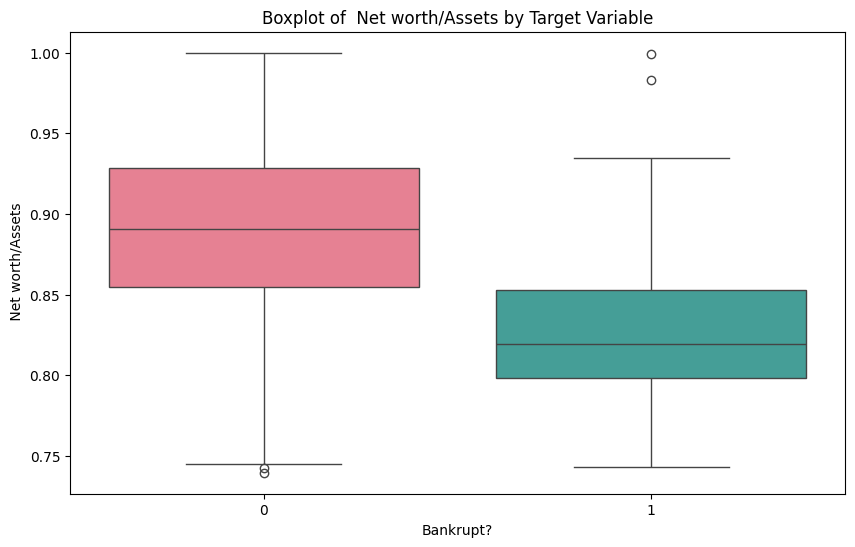

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


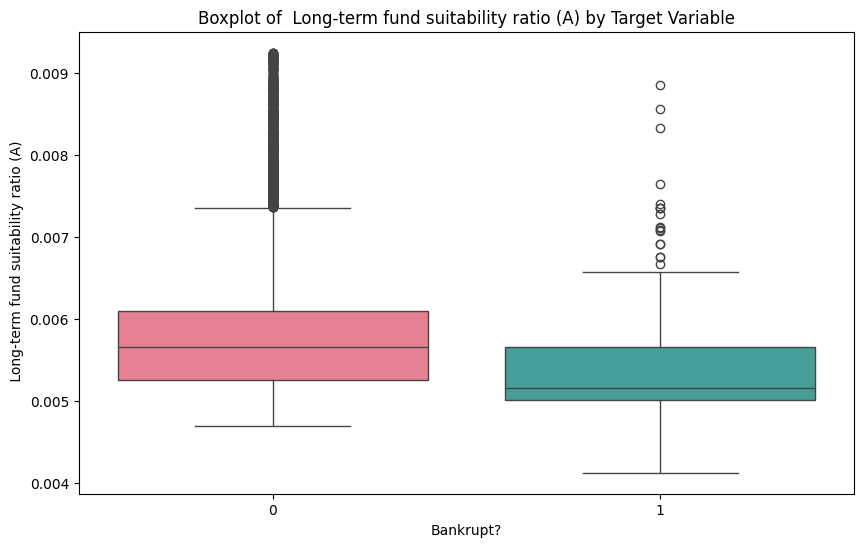

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


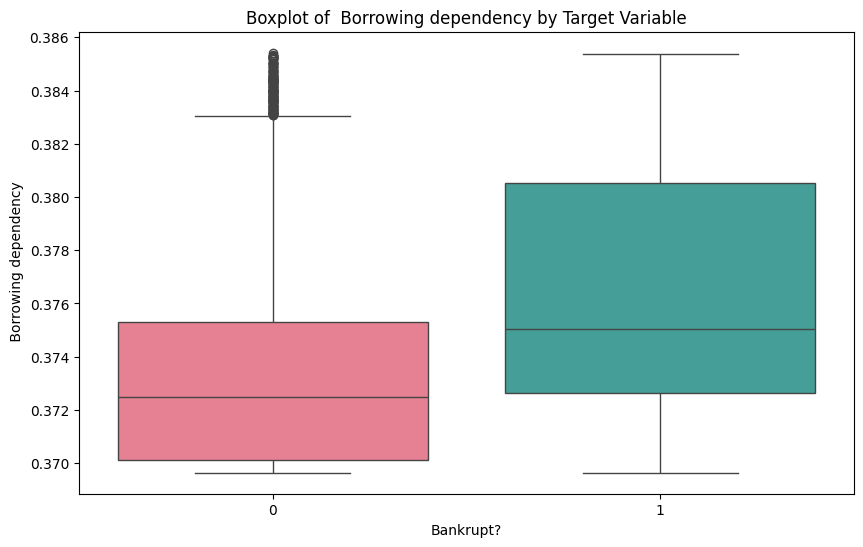

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


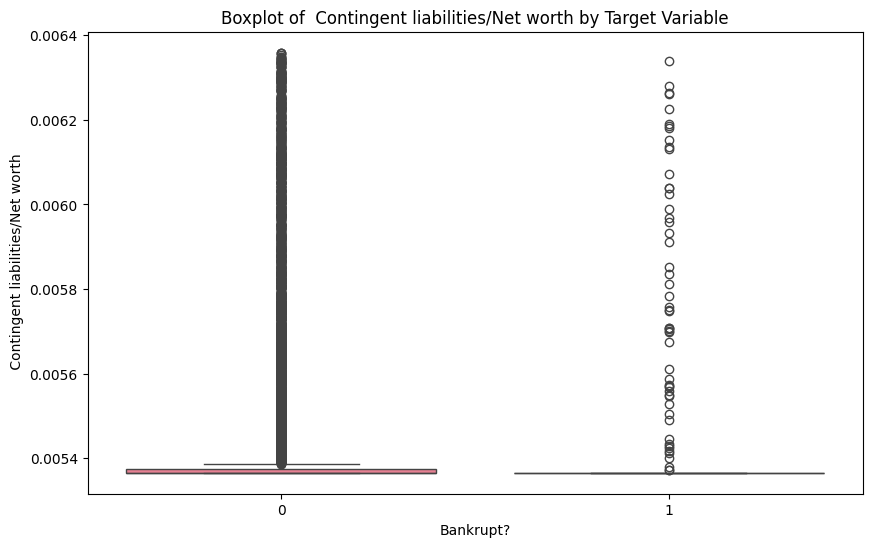

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


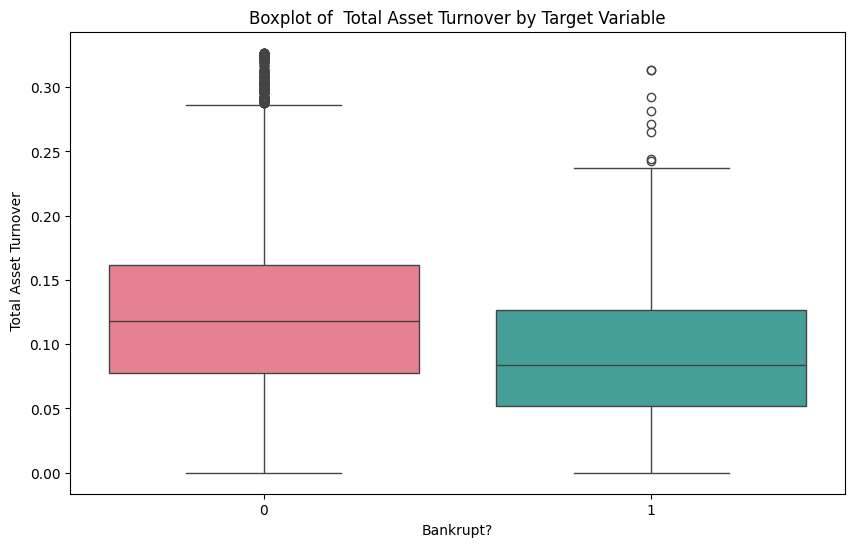

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


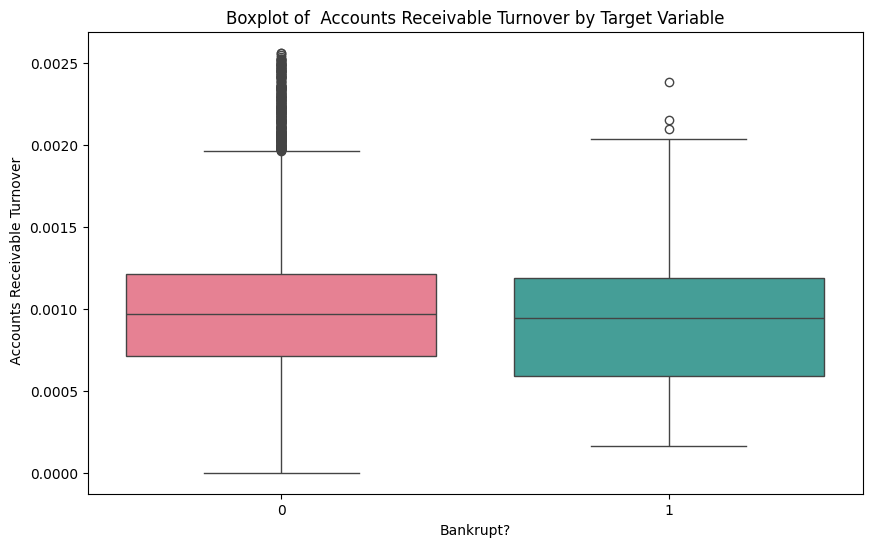

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


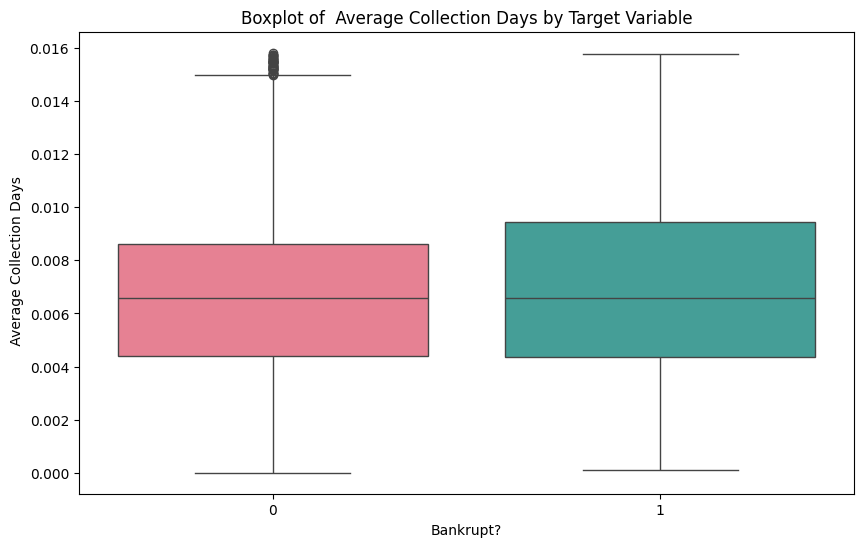

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


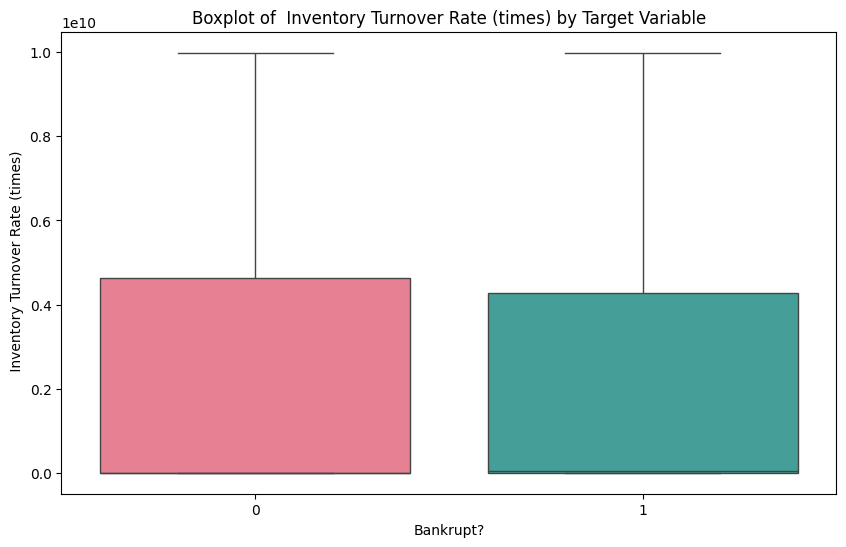

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


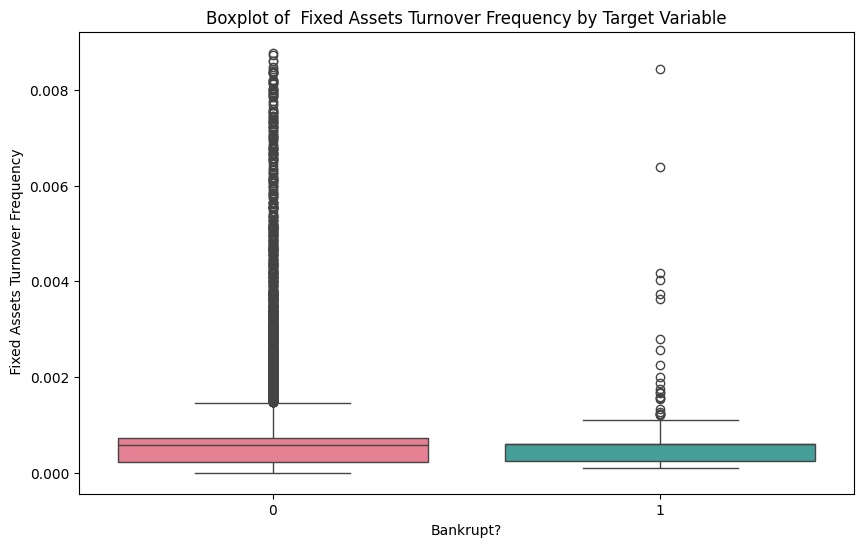

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


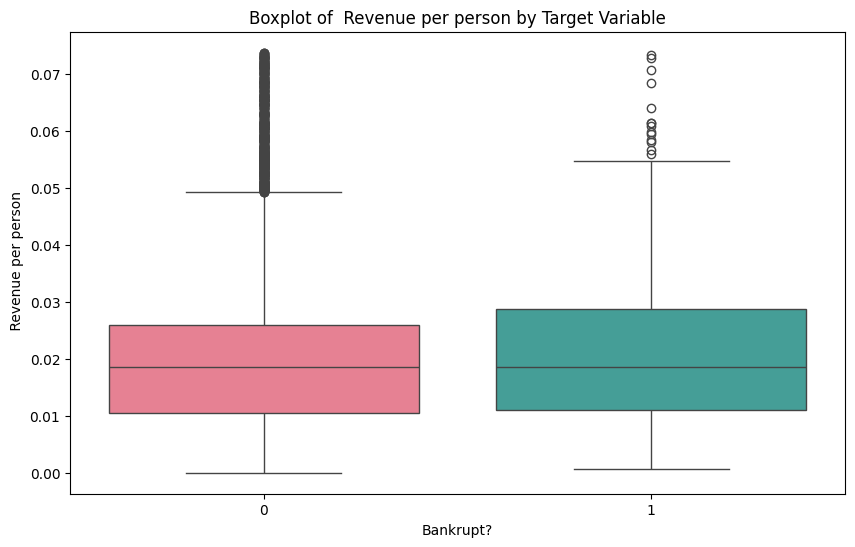

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


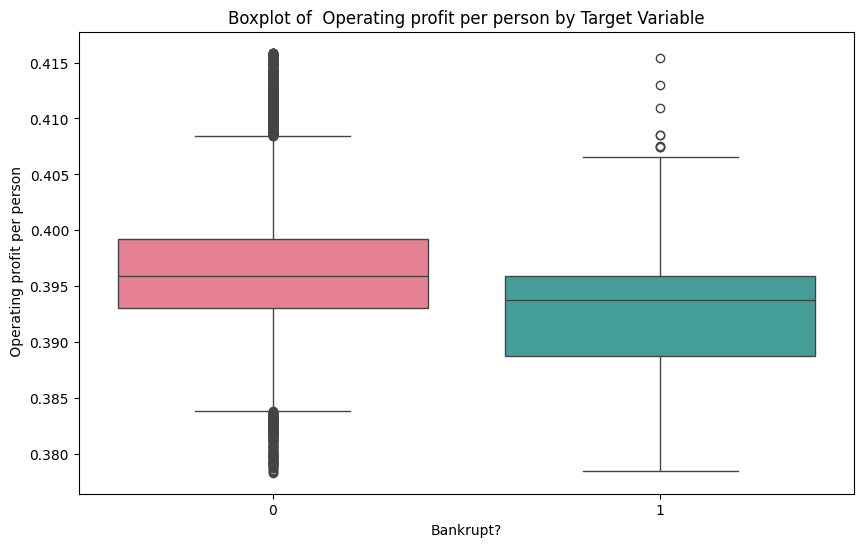

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


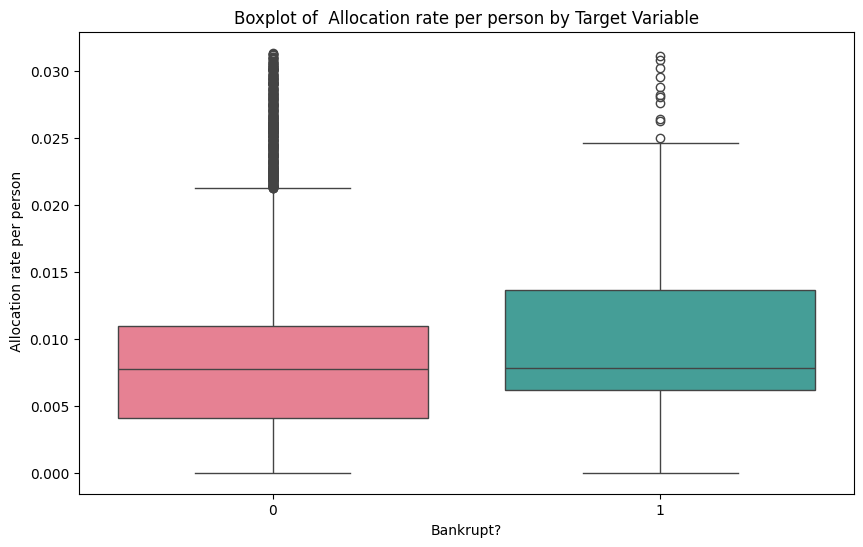

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


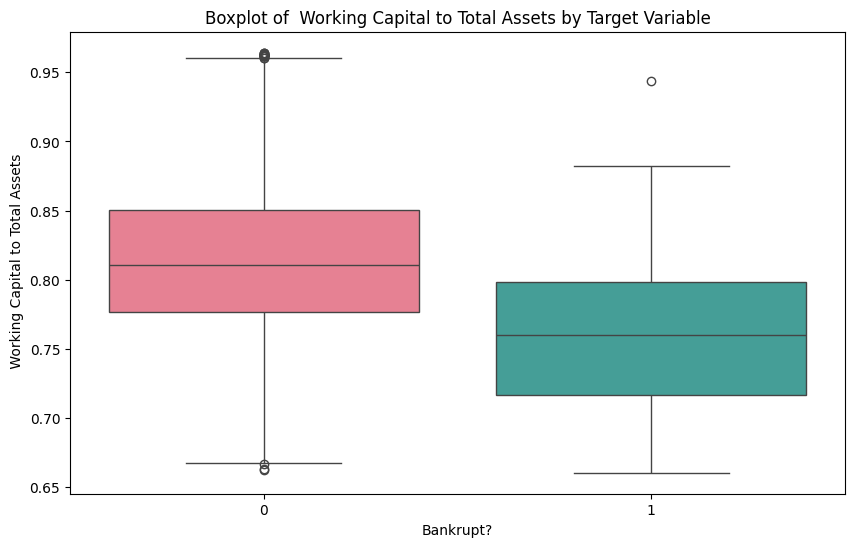

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


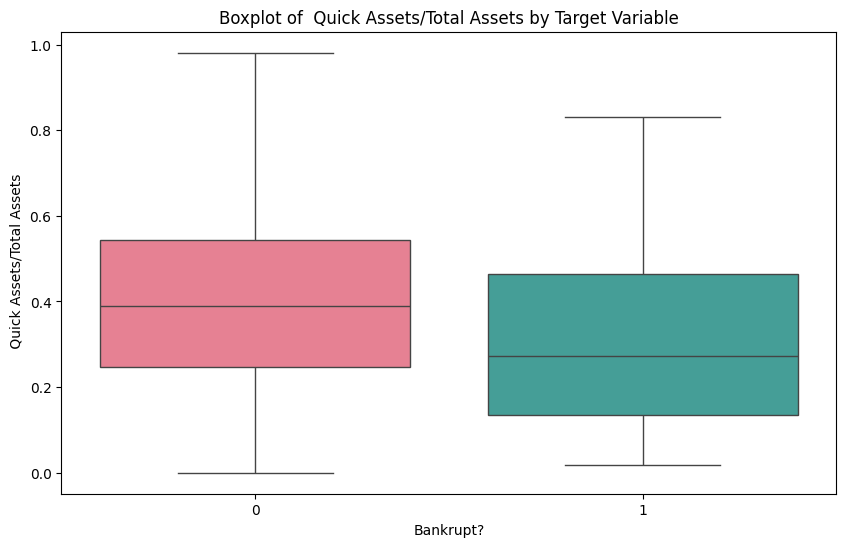

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


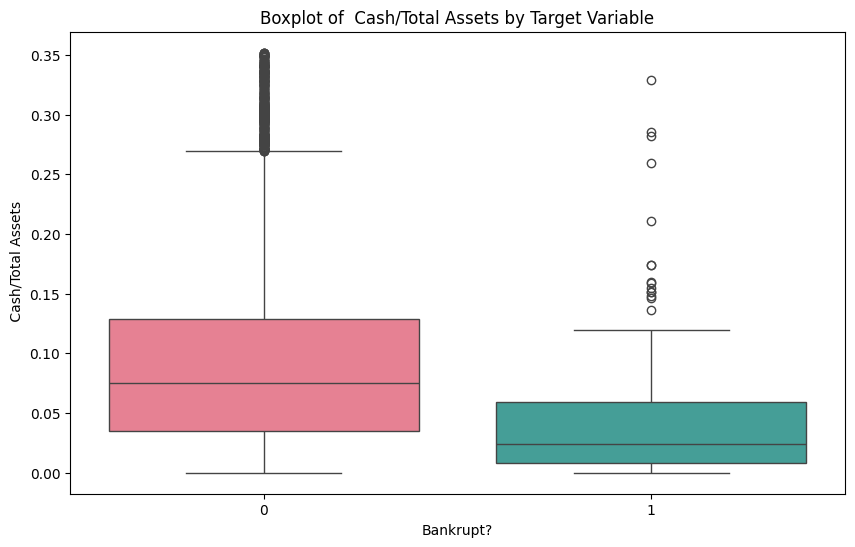

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


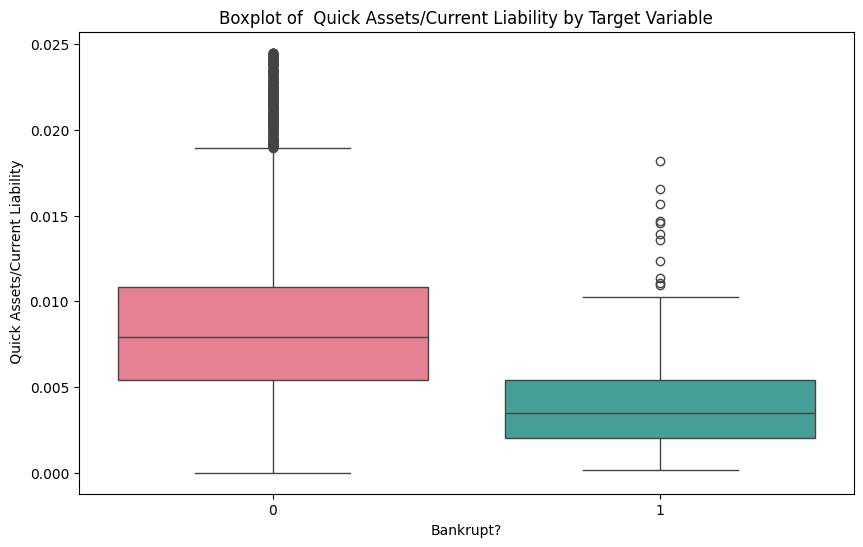

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


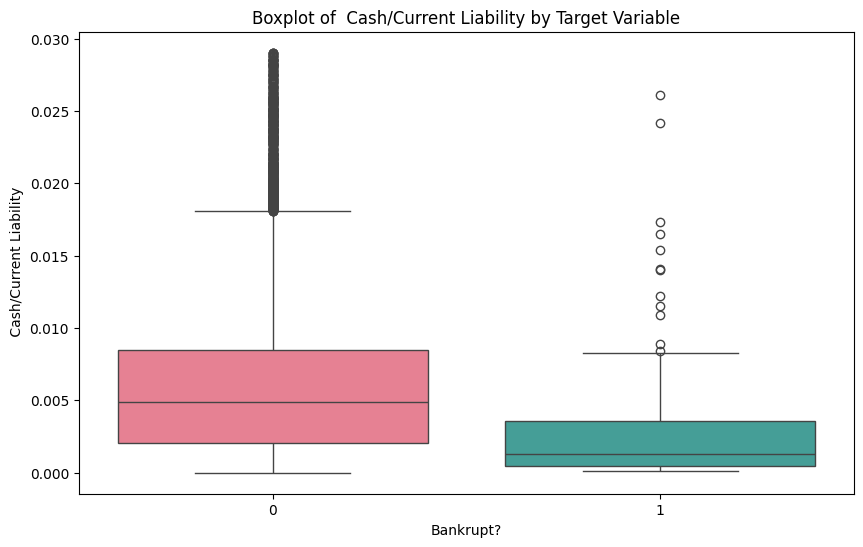

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


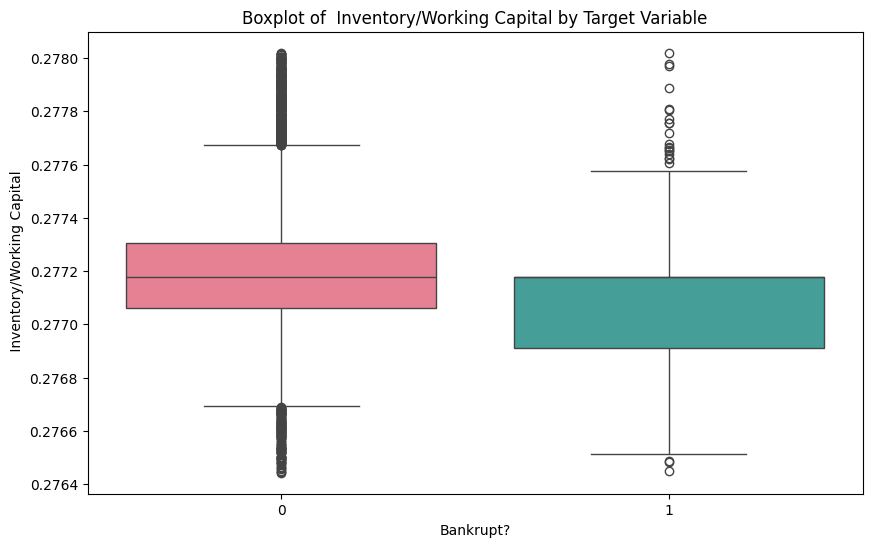

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


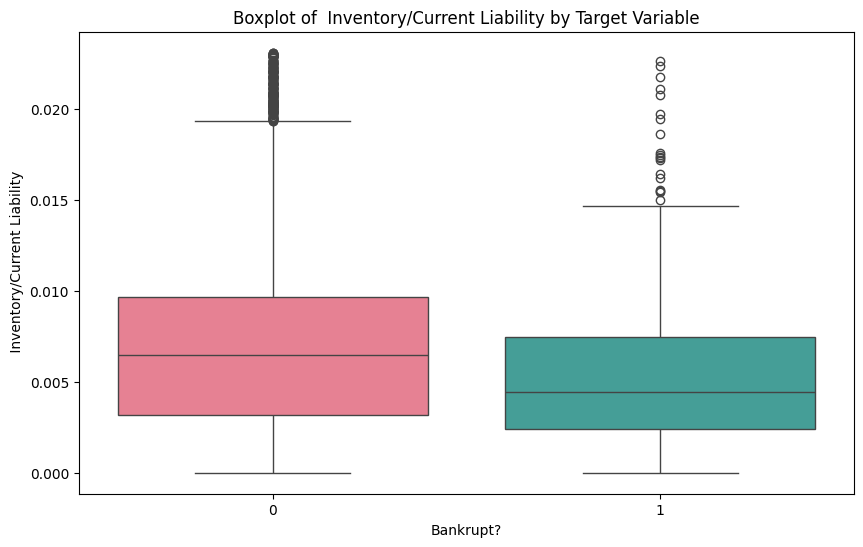

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


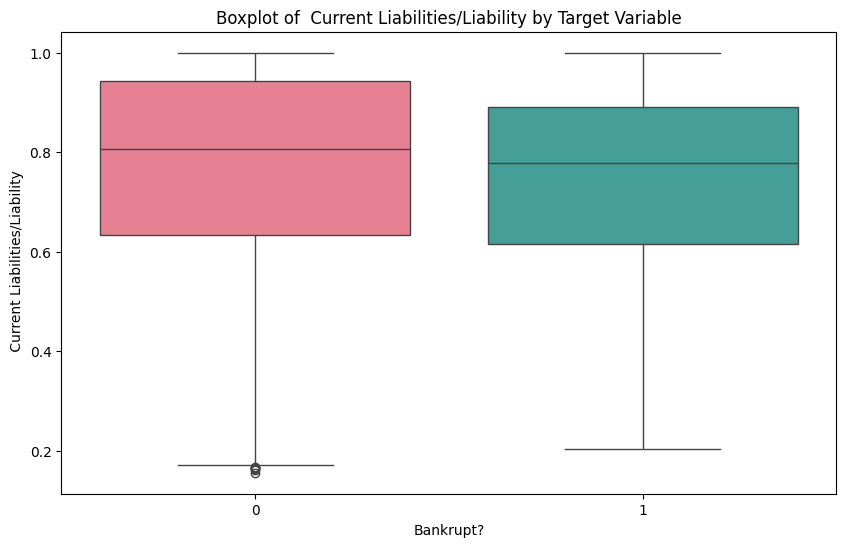

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


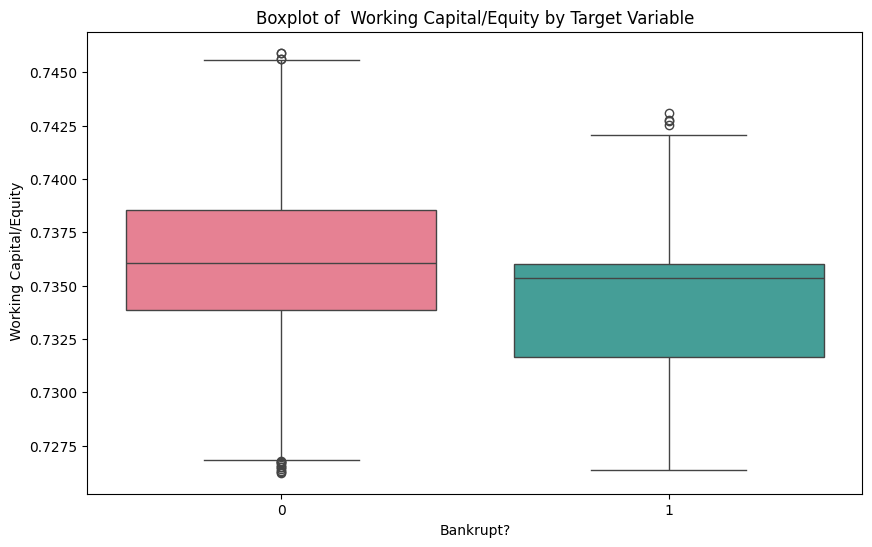

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


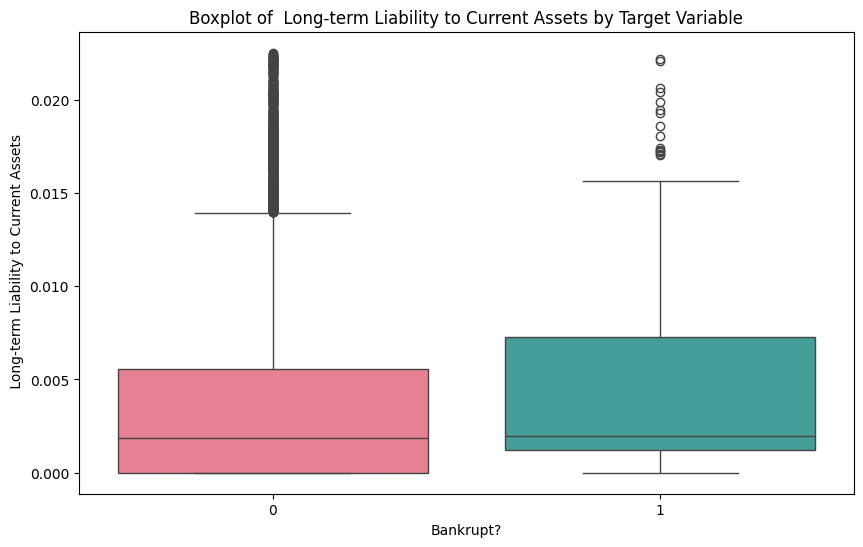

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


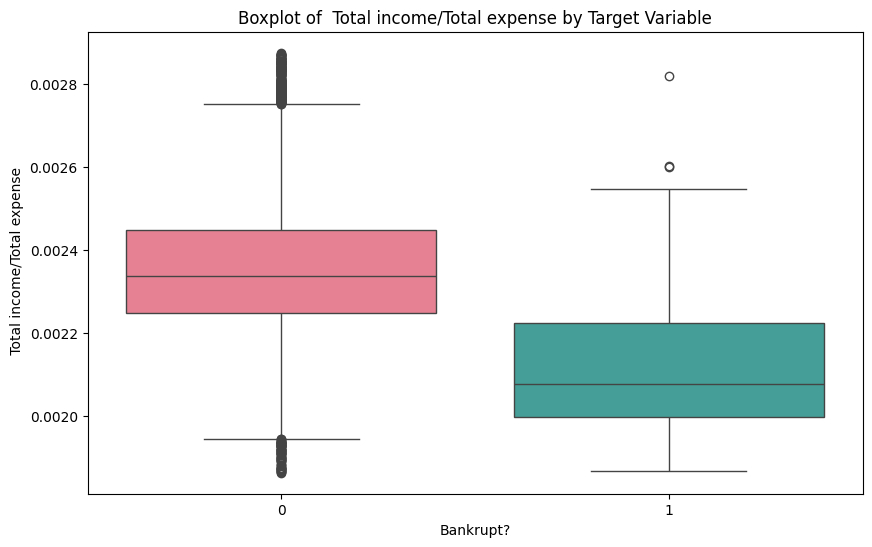

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


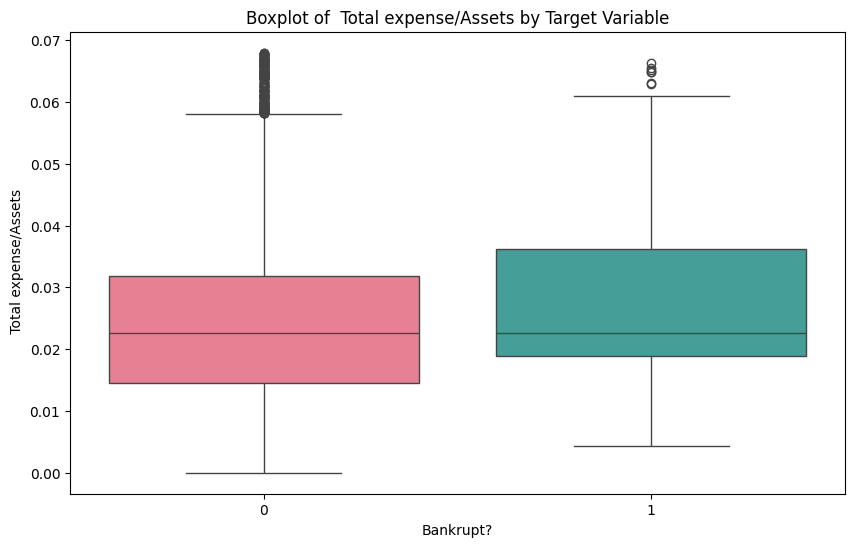

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


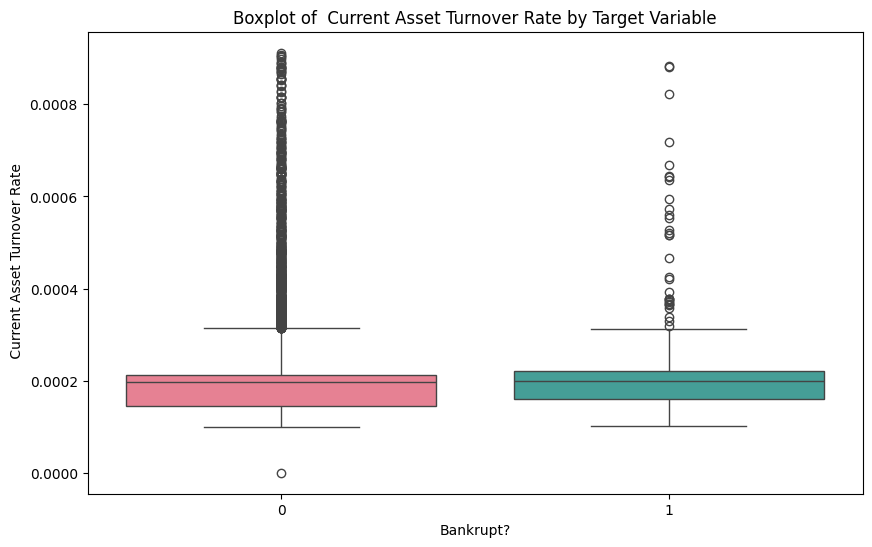

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


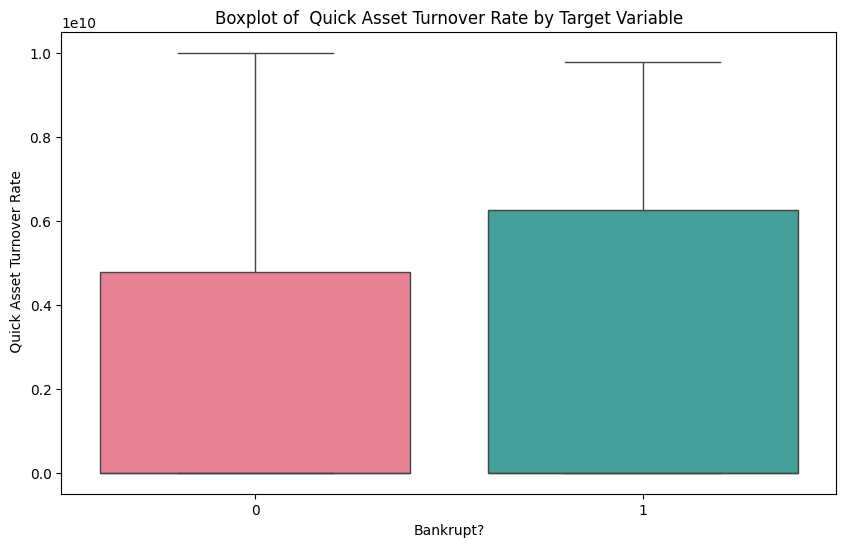

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


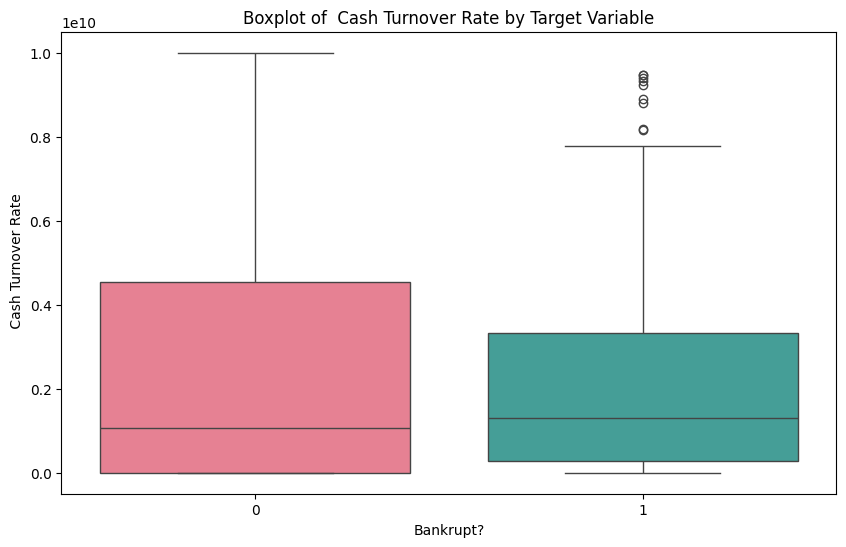

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


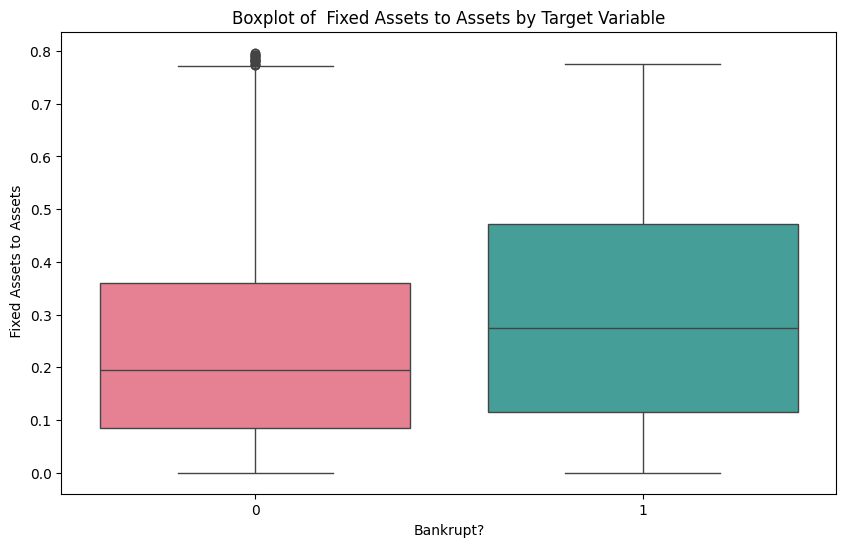

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


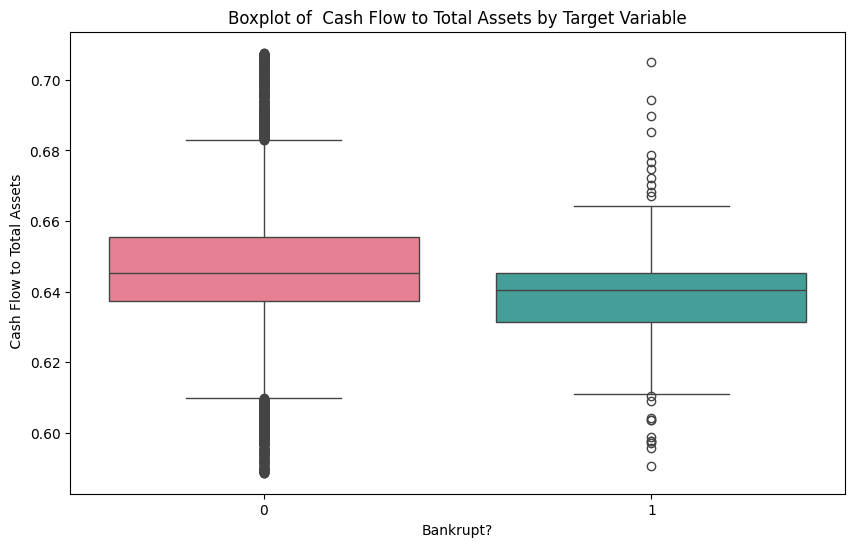

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


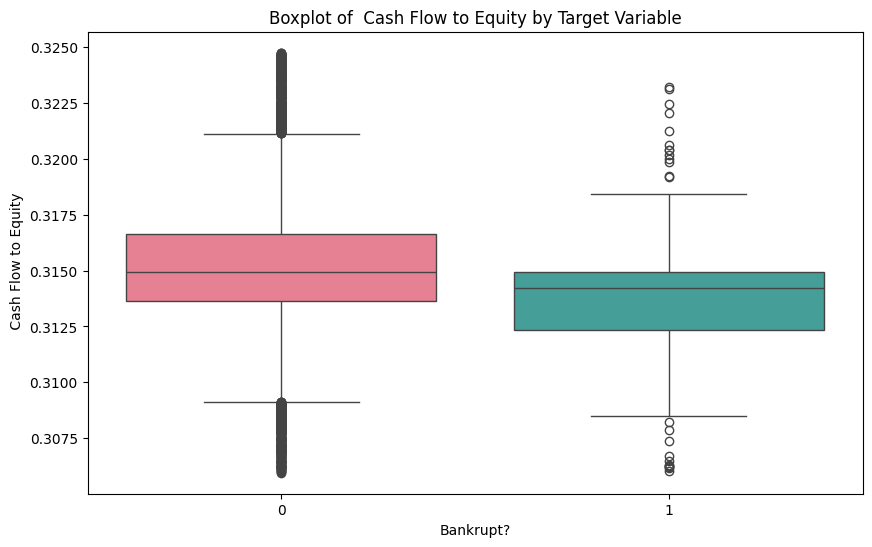

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


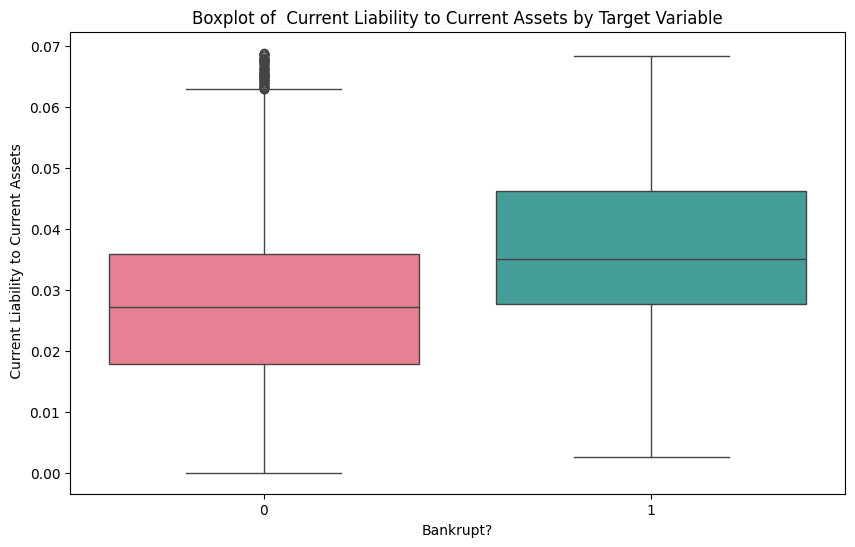

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


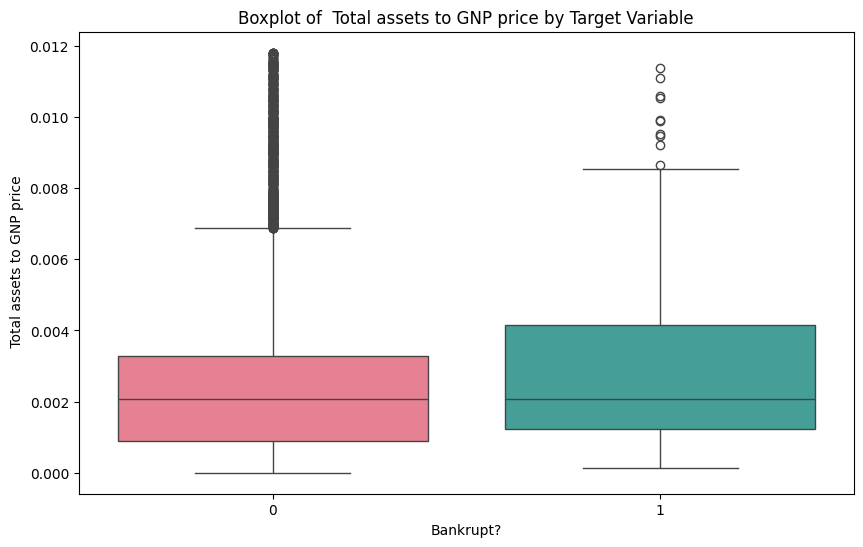

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


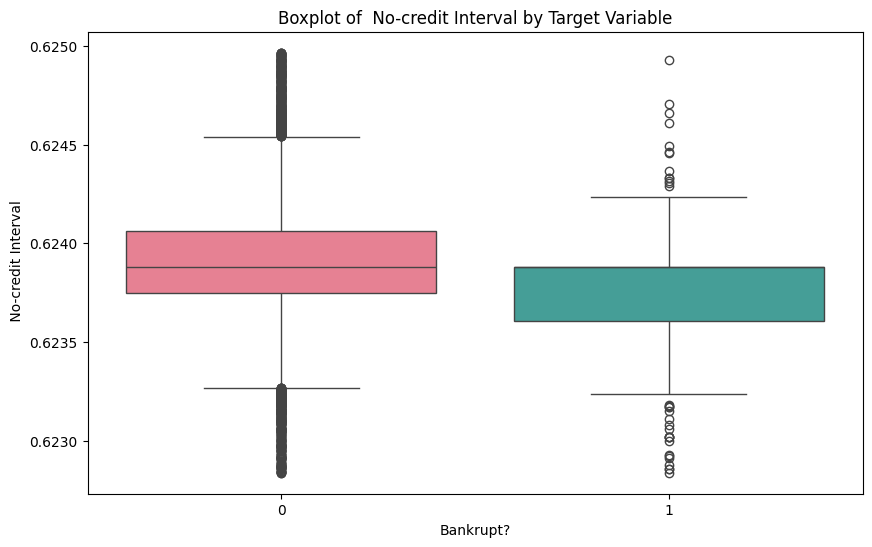

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


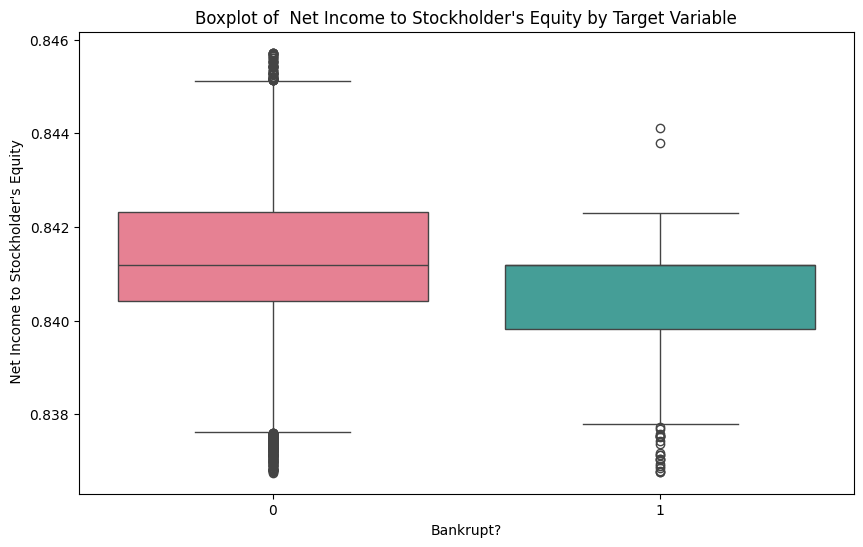

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


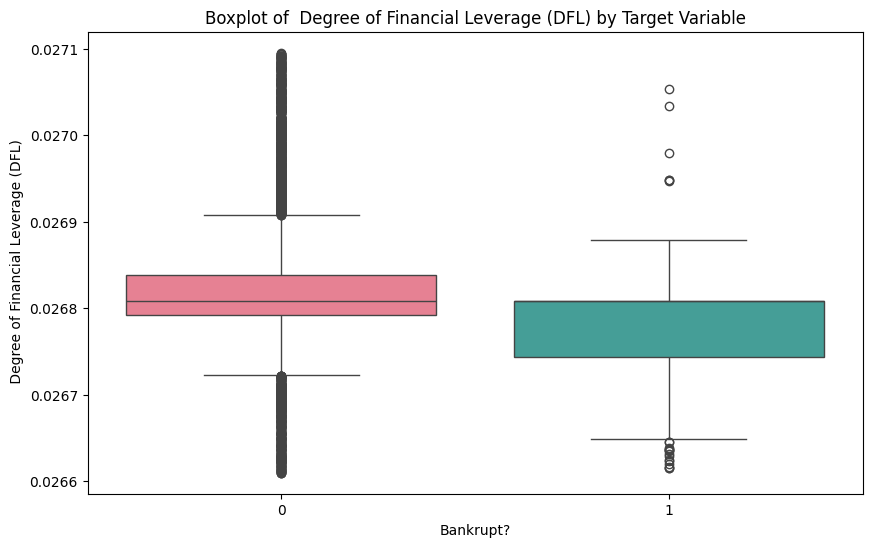

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


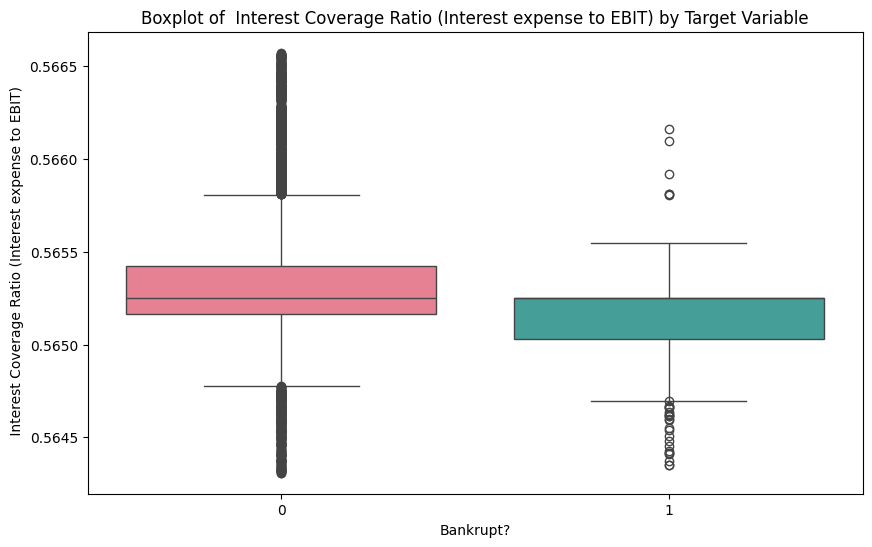

C:\Users\Rishi\AppData\Local\Temp\ipykernel_3592\1697673575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


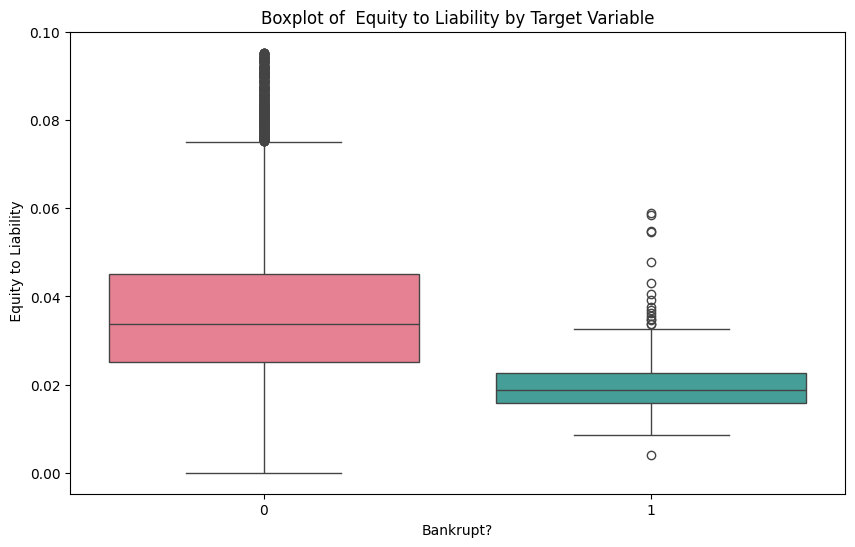

In [10]:
def plot_boxplots(dataframe, target_column, features):
    palette = sns.color_palette('husl', len(dataframe[target_column].unique()))

    for feature in features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)
        plt.title(f'Boxplot of {feature} by Target Variable')
        plt.show()

plot_boxplots(df, 'Bankrupt?', numerical_features_reduced)


In [11]:
# ANOVA test
anova_results = {}
for feature in numerical_features_reduced:
    f_stat, p_value = f_oneway(df[df['Bankrupt?'] == 0][feature], df[df['Bankrupt?'] == 1][feature])
    anova_results[feature] = p_value

anova_df = pd.DataFrame(list(anova_results.items()), columns=['Feature', 'P-Value'])
print(anova_df)


                                              Feature       P-Value
0    ROA(C) before interest and depreciation befor...  1.211401e-45
1                              Operating Gross Margin  7.150363e-29
2                               Operating Profit Rate  8.012830e-30
3         Non-industry income and expenditure/revenue  1.487066e-22
4                              Operating Expense Rate  6.154927e-01
..                                                ...           ...
57                                 No-credit Interval  2.040882e-12
58                 Net Income to Stockholder's Equity  1.742063e-18
59                 Degree of Financial Leverage (DFL)  2.928395e-22
60   Interest Coverage Ratio (Interest expense to ...  1.009028e-18
61                                Equity to Liability  1.418096e-45

[62 rows x 2 columns]


In [12]:
# Chi-Square test
chi_square_results = {}
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['Bankrupt?'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi_square_results[feature] = p_value

chi_square_df = pd.DataFrame(list(chi_square_results.items()), columns=['Feature', 'P-Value'])
print(chi_square_df)


                  Feature       P-Value
0   Liability-Assets Flag  9.139777e-26
1         Net Income Flag  1.000000e+00


In [13]:
from imblearn.under_sampling import TomekLinks , CondensedNearestNeighbour
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif, mutual_info_classif

X = df.drop(columns=['Bankrupt?'])
y = df['Bankrupt?']
X.dropna(inplace=True)
y = y[X.index]



In [14]:
Cnn = CondensedNearestNeighbour(n_neighbors=1)
X_cnn,y_cnn = Cnn.fit_resample(X,y)
y_cnn.value_counts()


Bankrupt?
0    909
1    220
Name: count, dtype: int64

<Axes: xlabel='Bankrupt?', ylabel='count'>

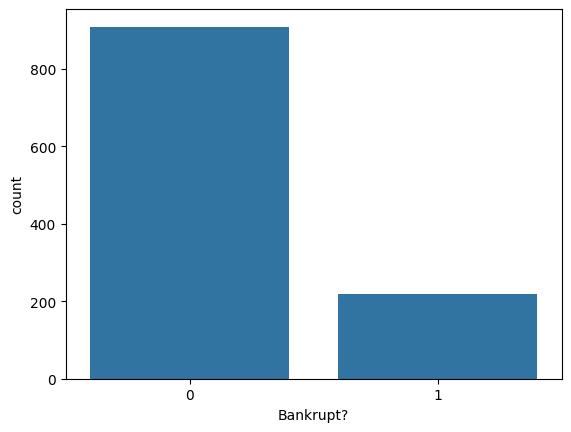

In [15]:
sns.countplot(x = y_cnn)

c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

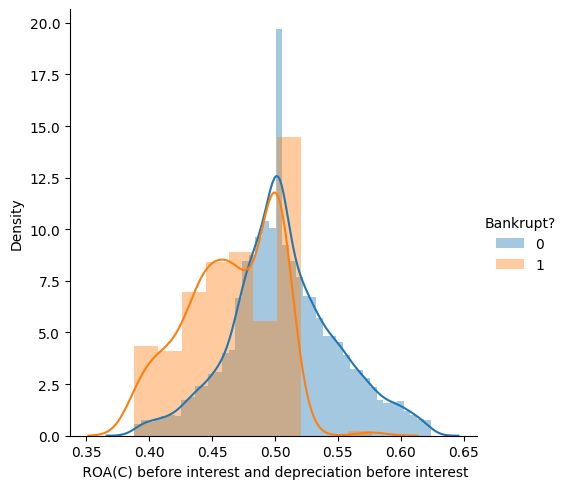

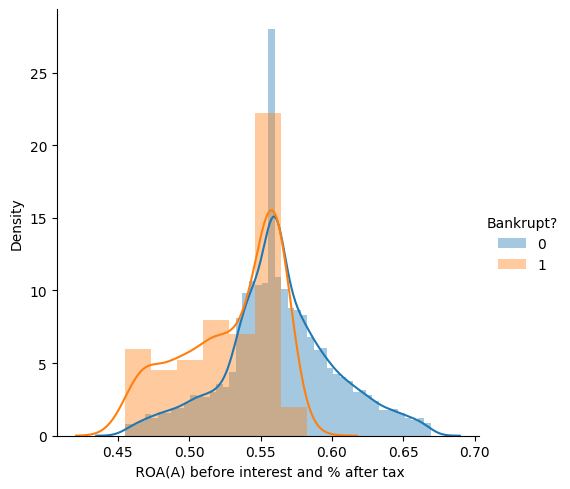

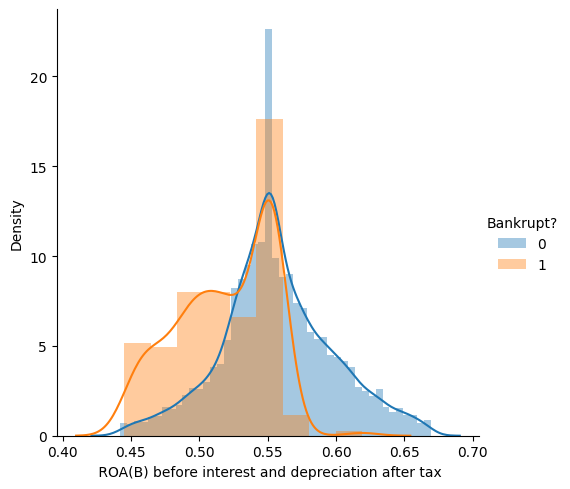

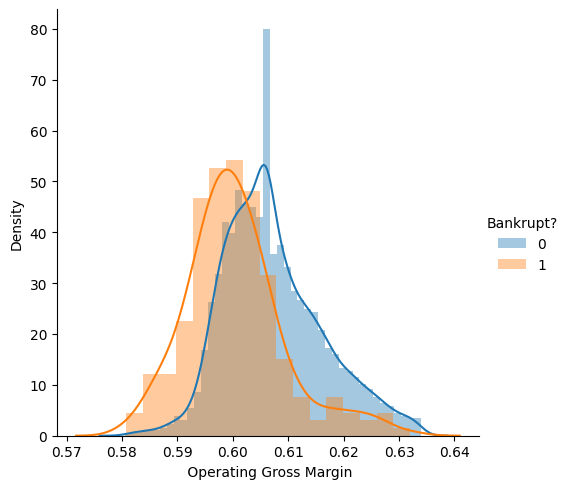

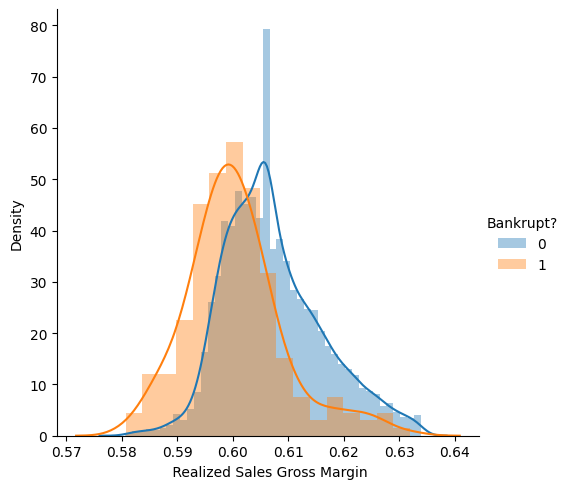

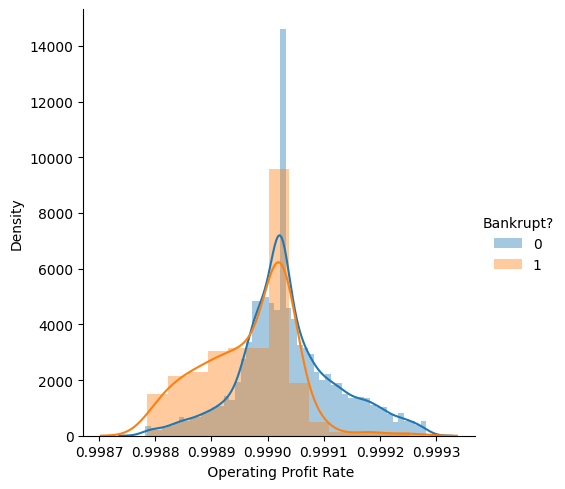

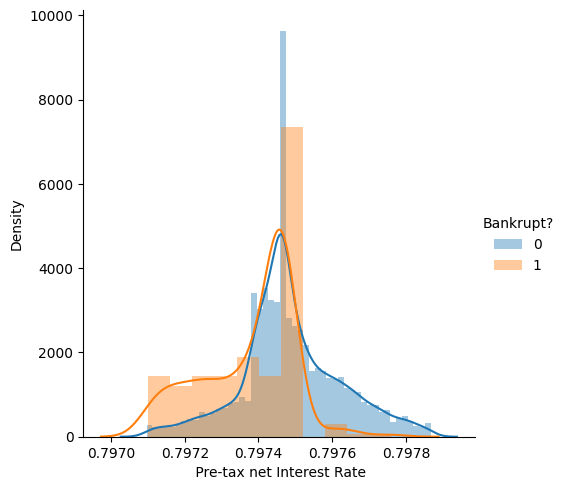

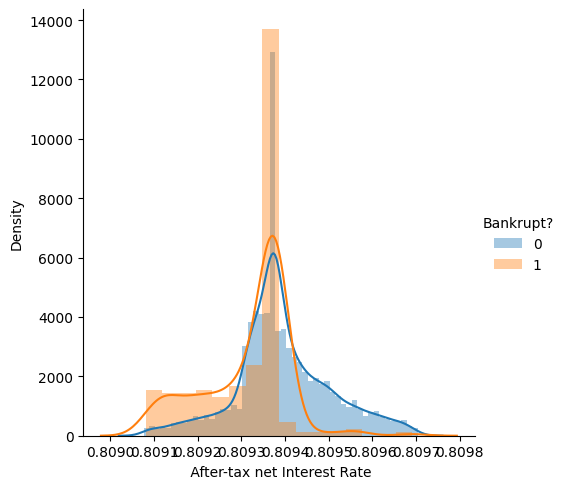

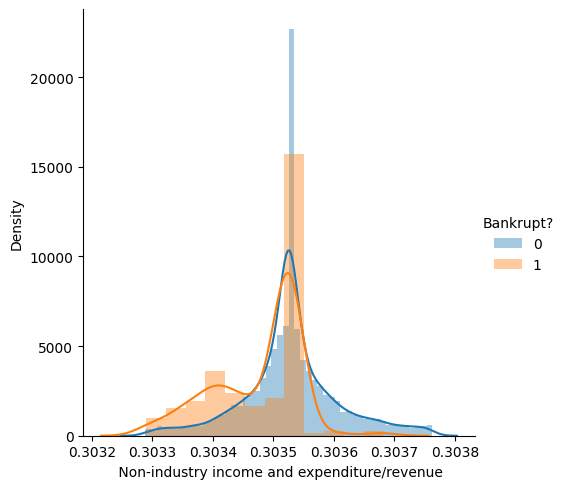

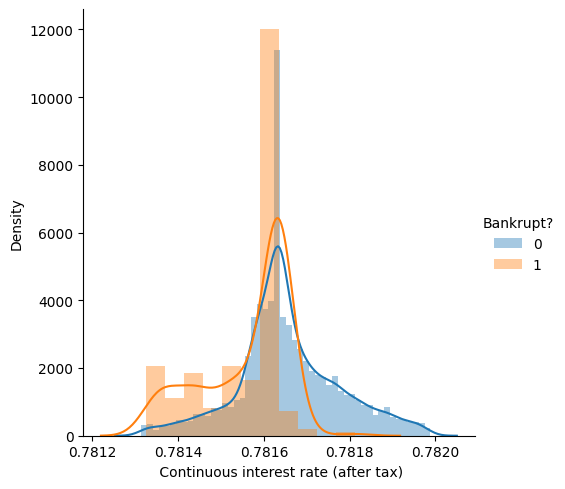

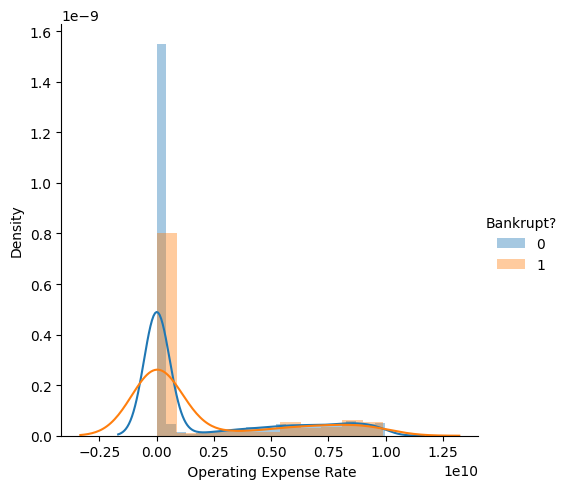

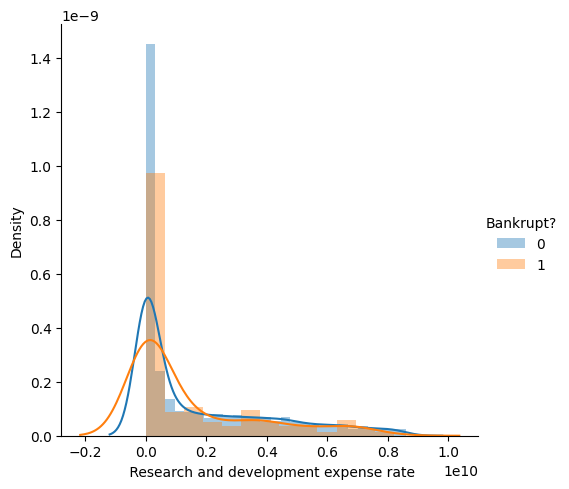

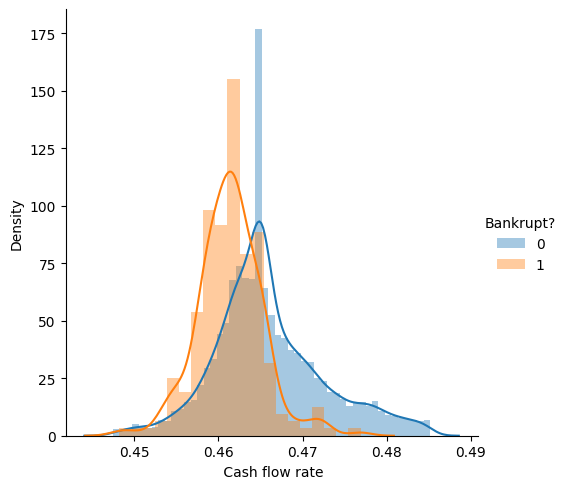

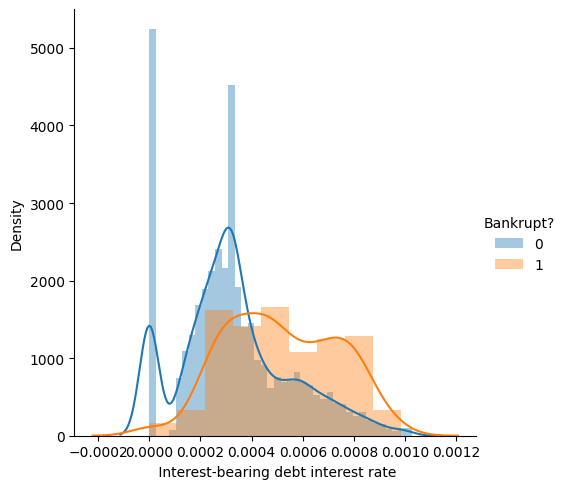

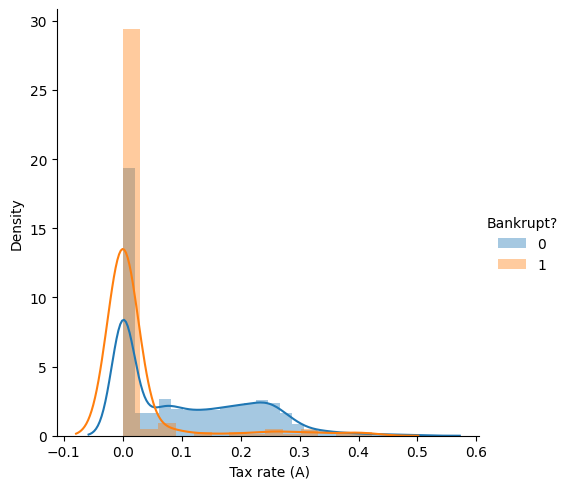

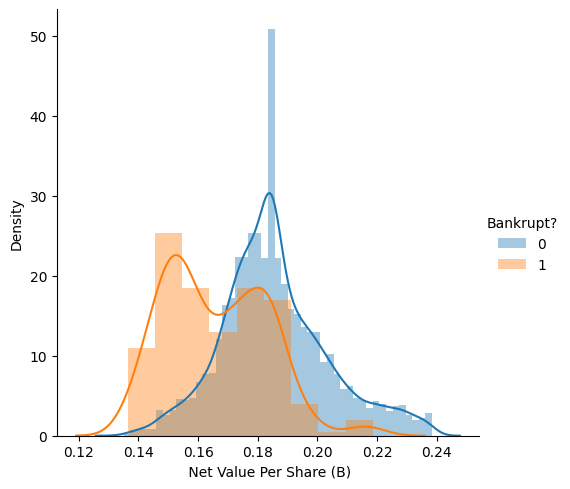

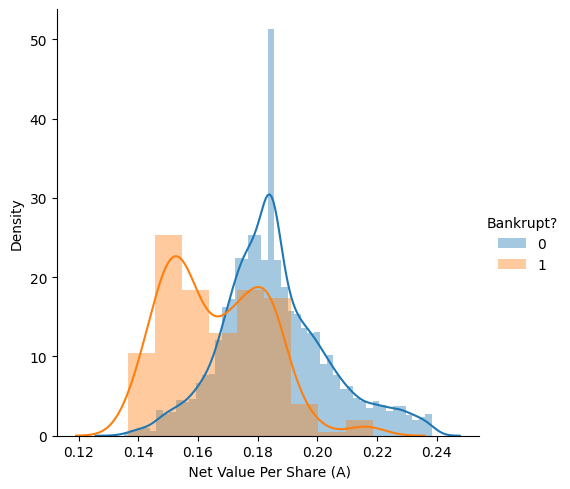

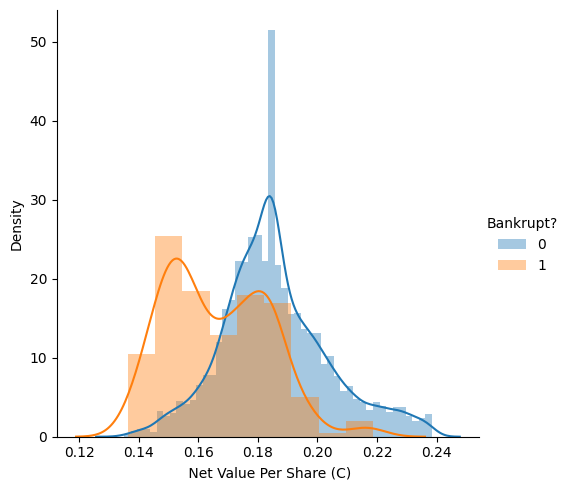

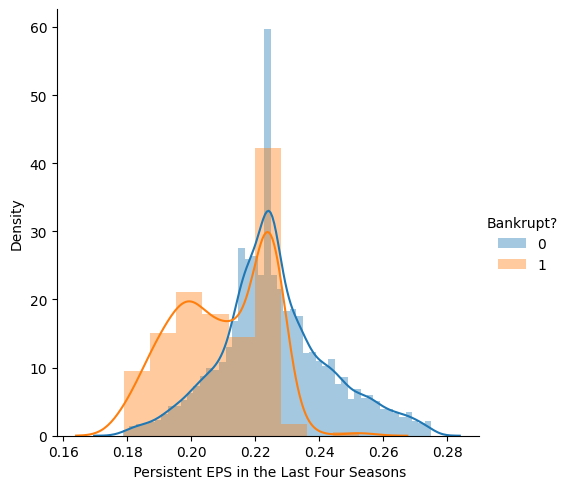

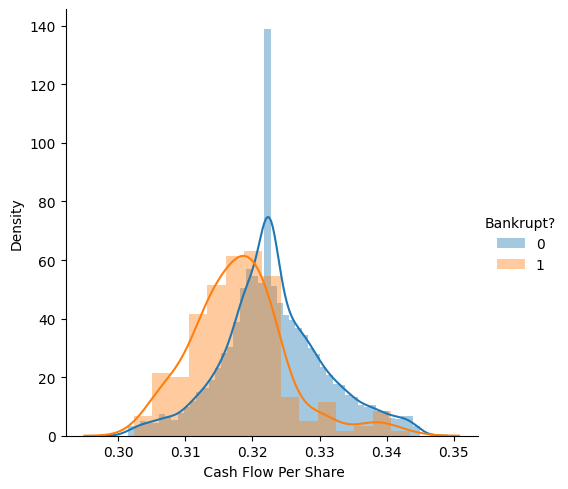

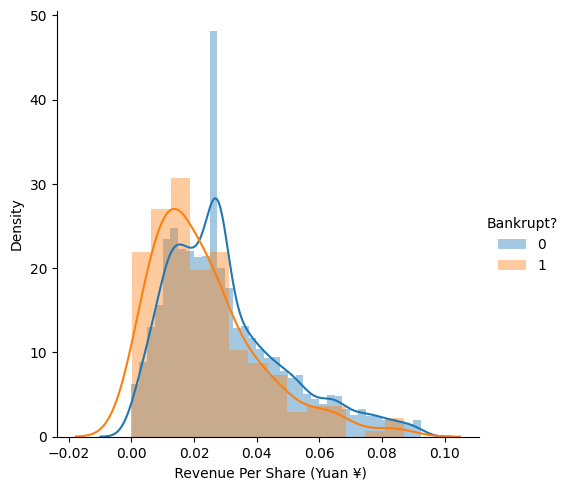

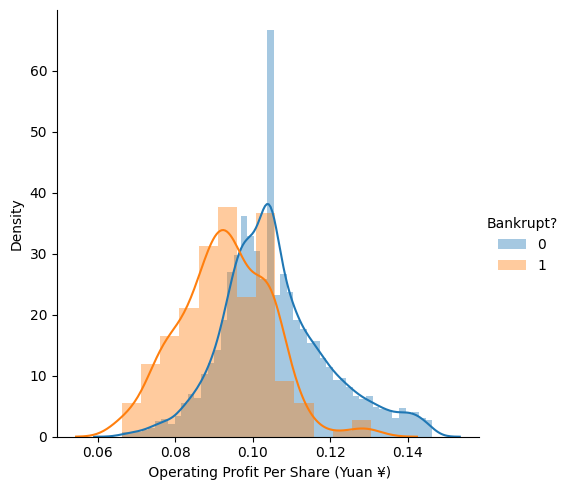

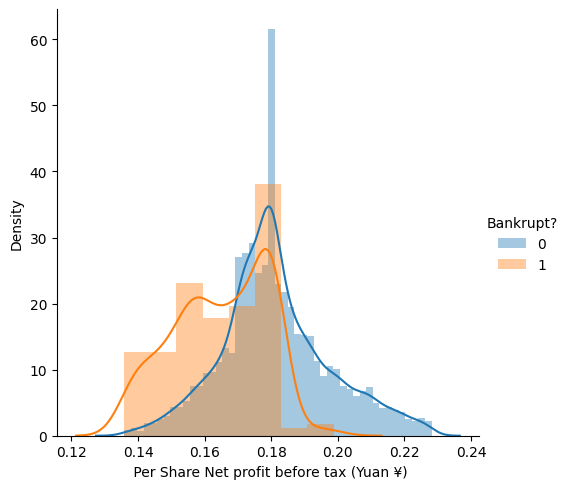

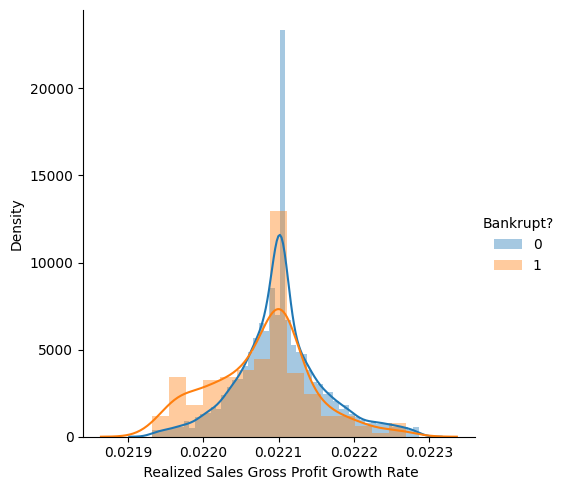

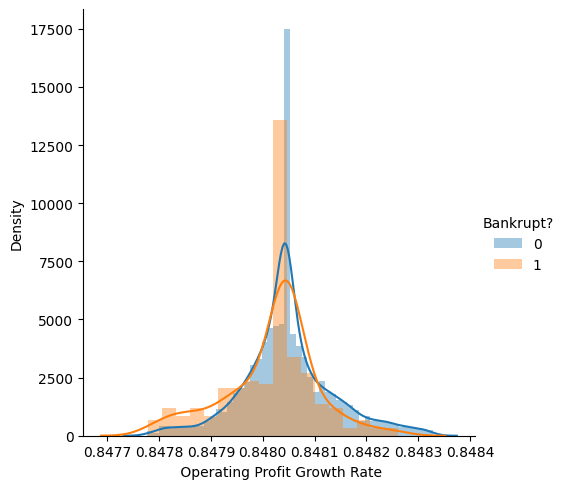

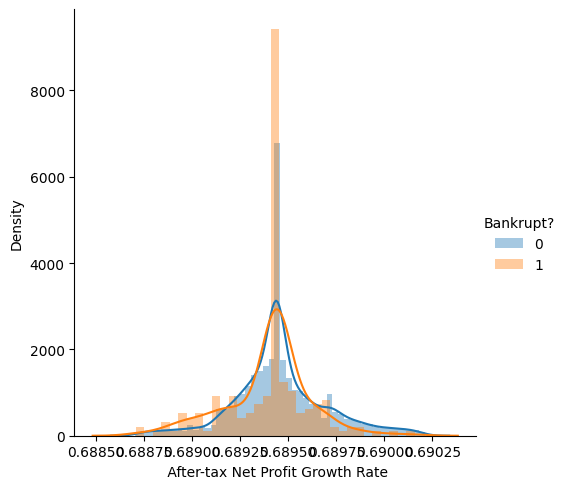

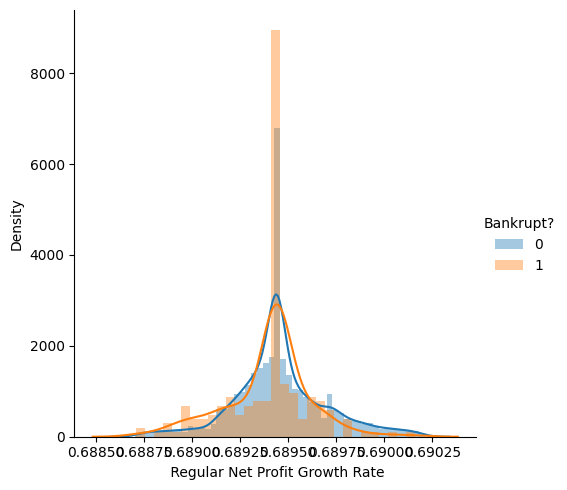

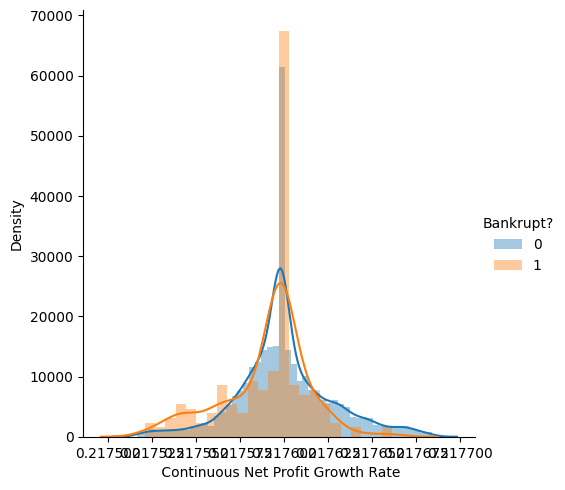

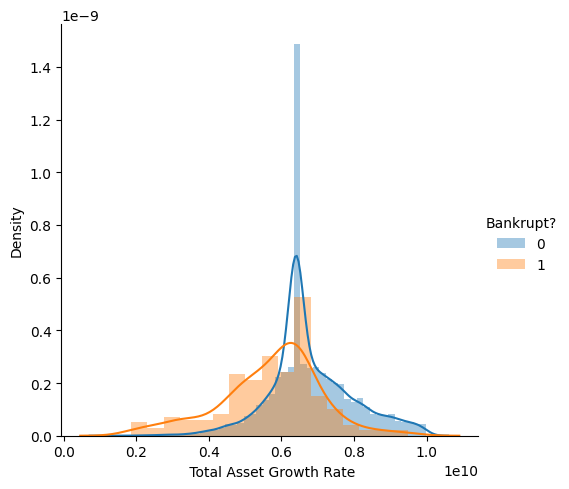

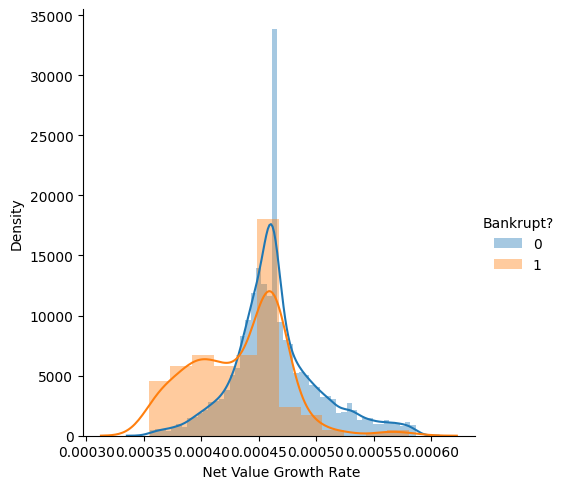

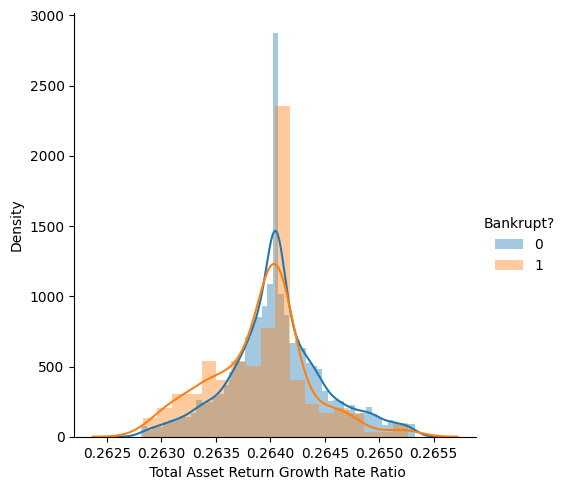

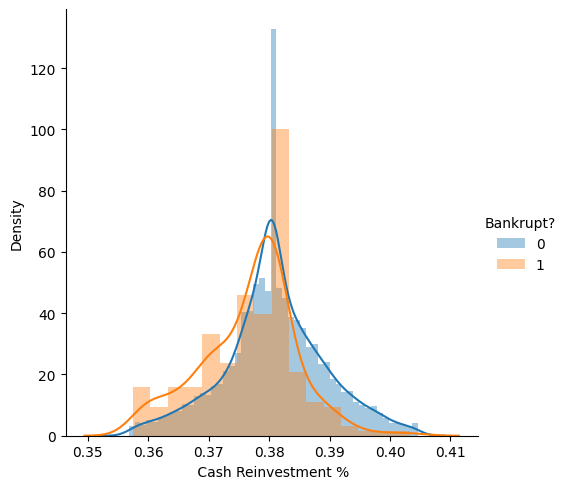

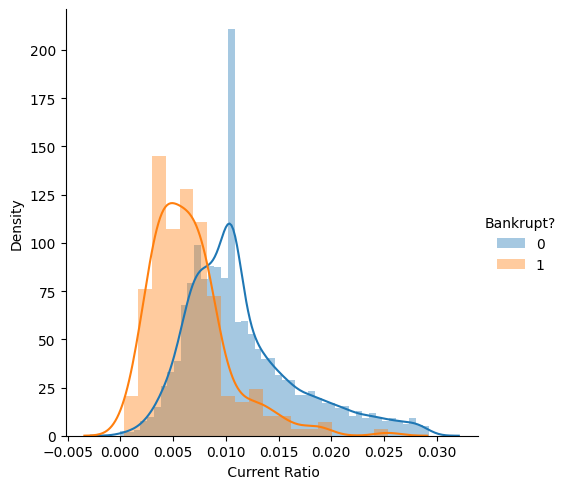

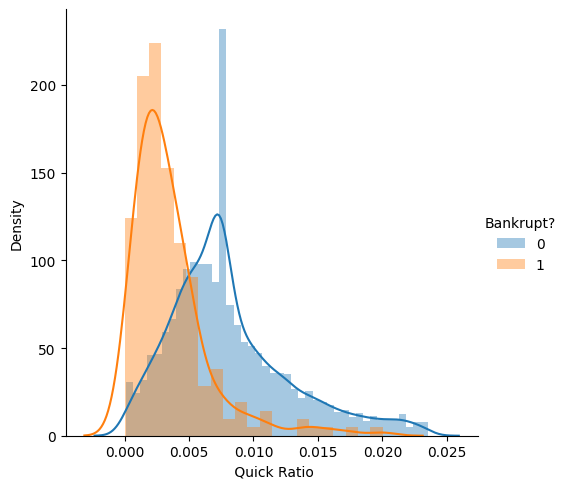

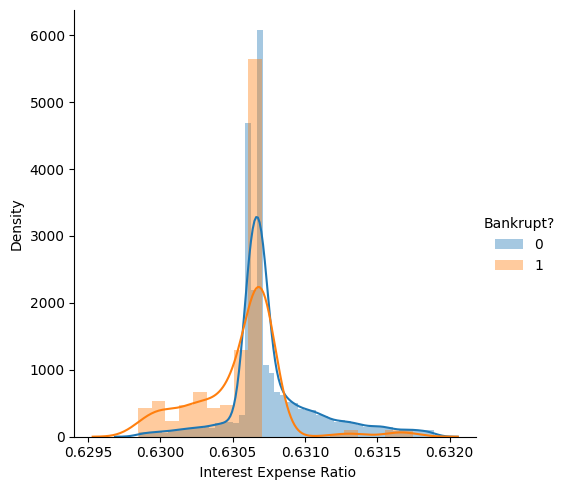

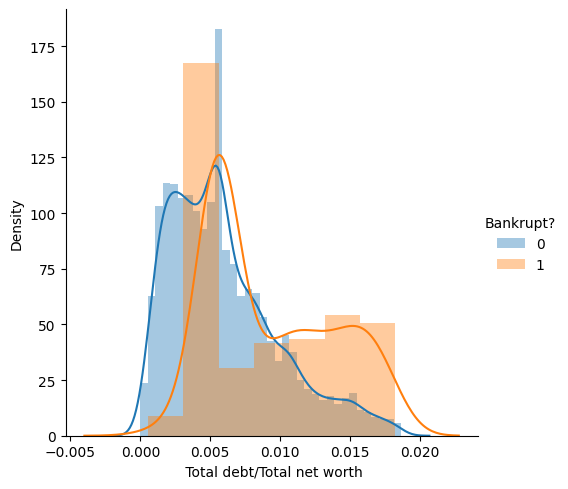

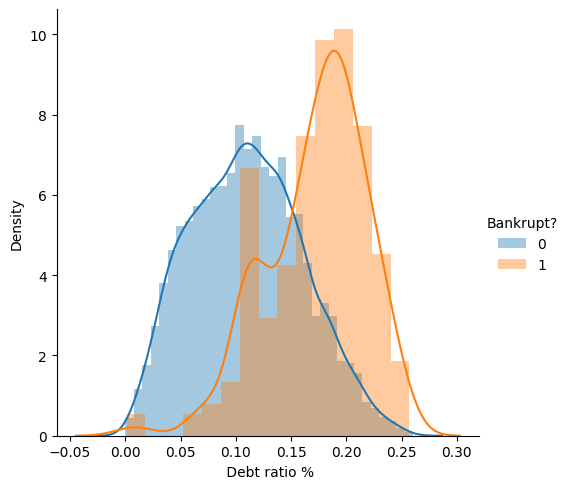

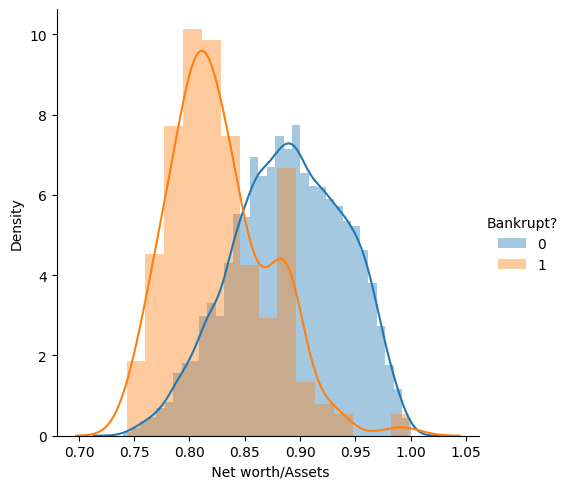

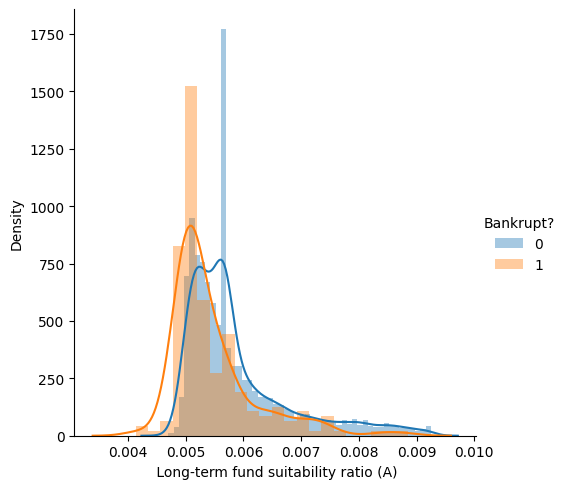

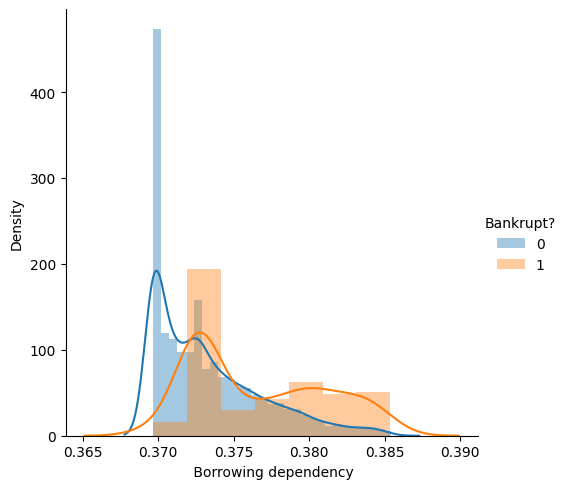

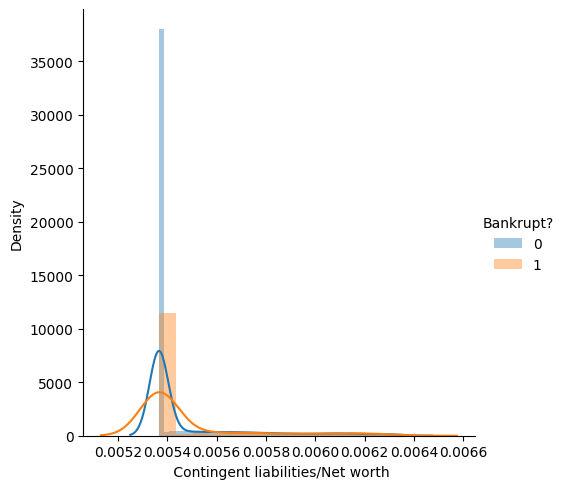

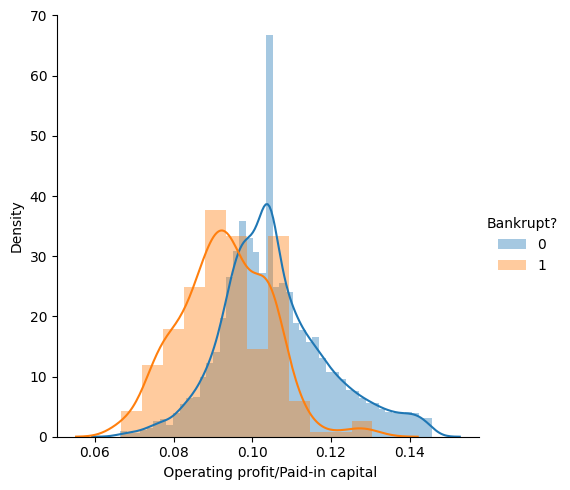

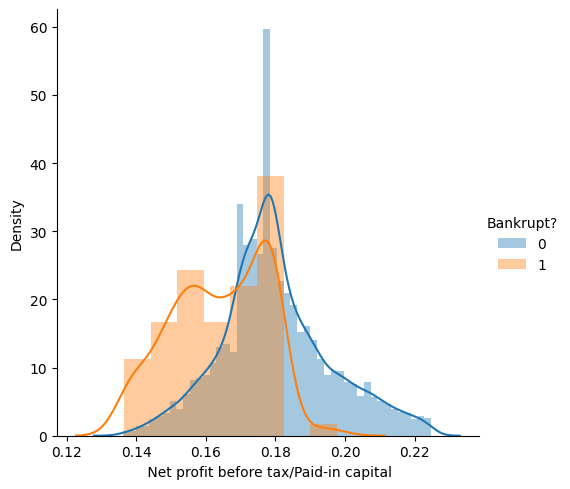

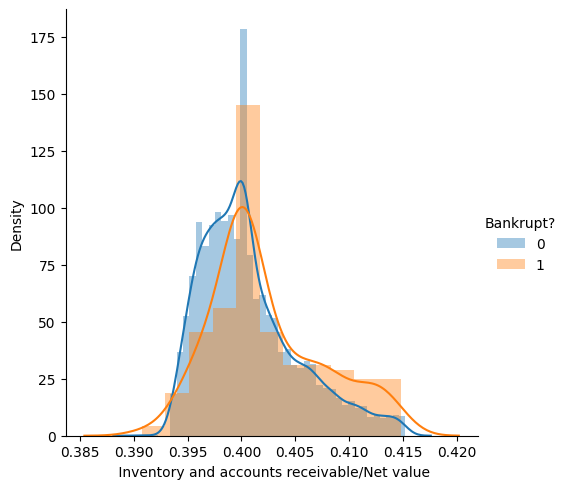

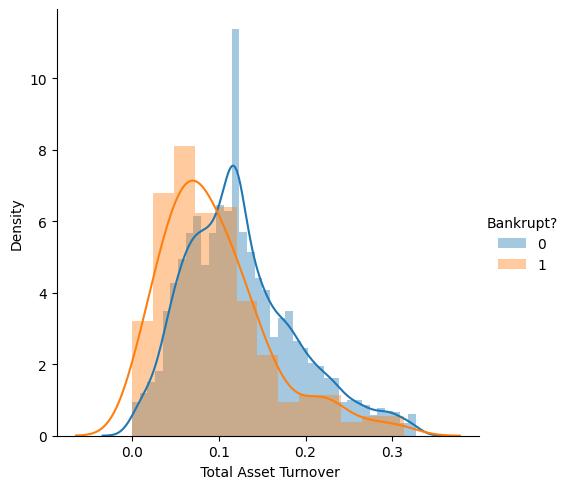

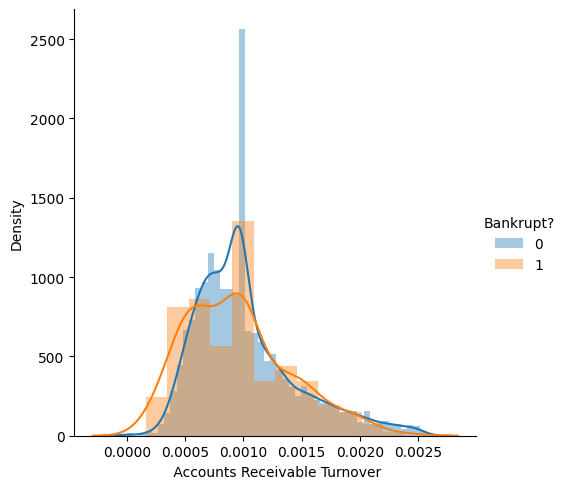

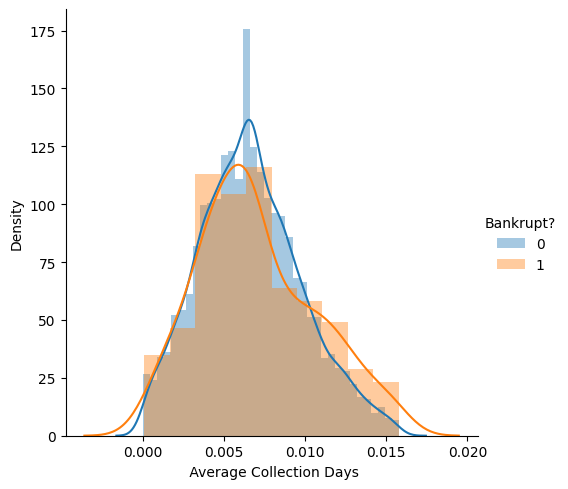

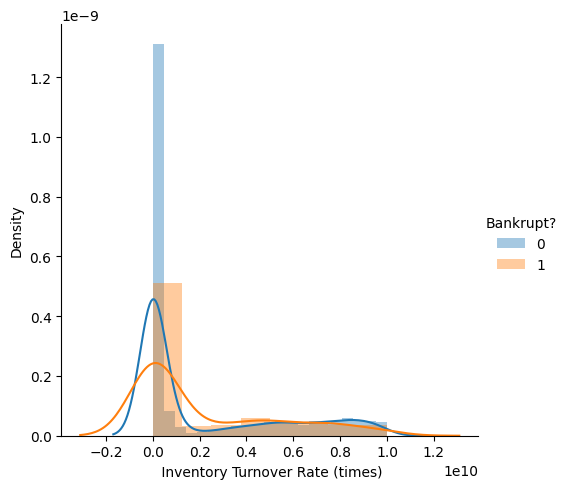

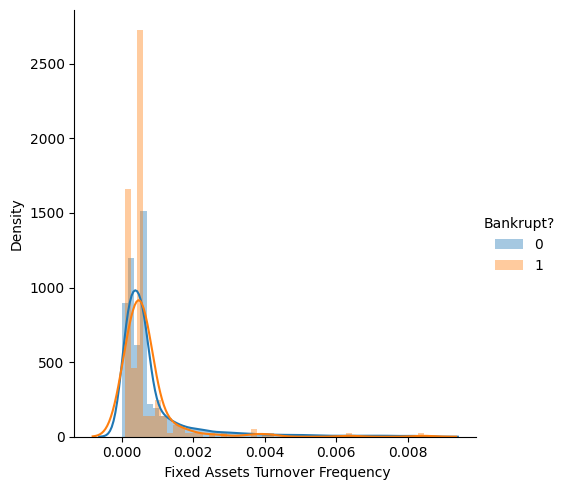

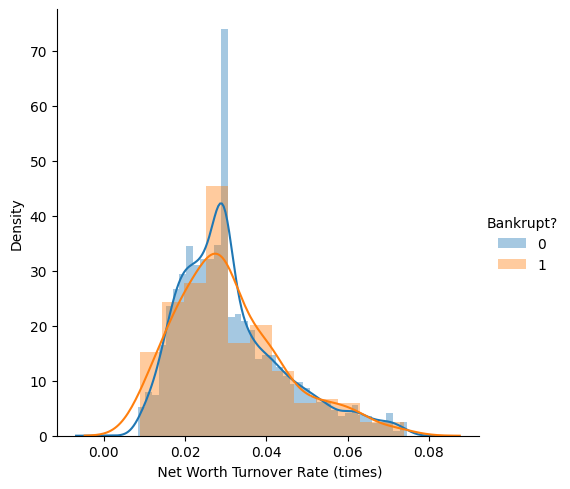

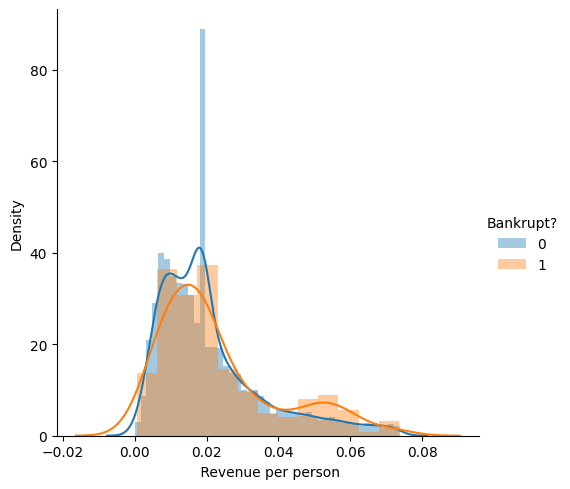

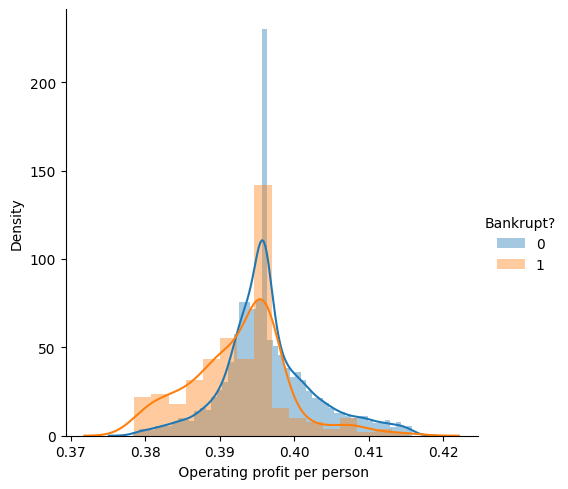

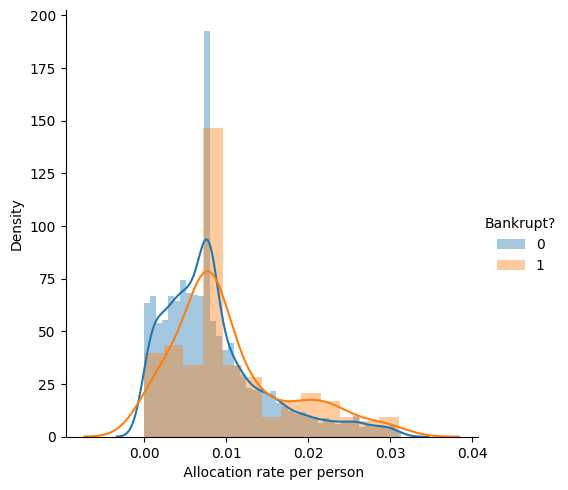

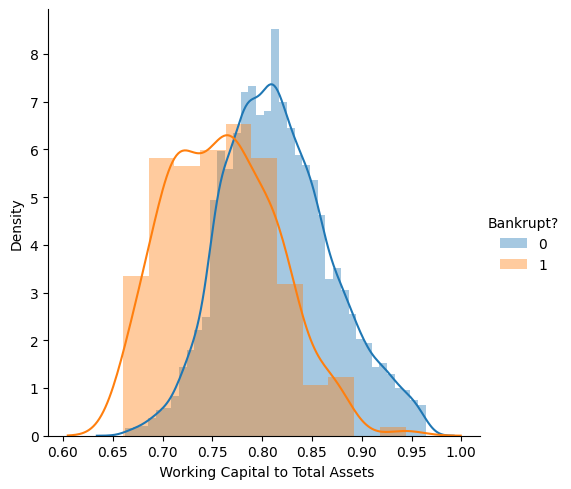

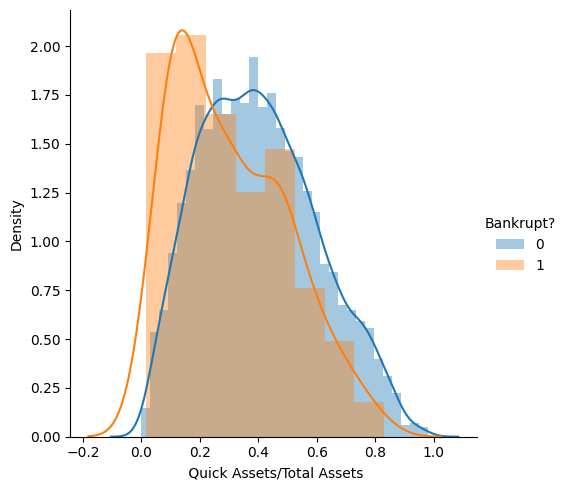

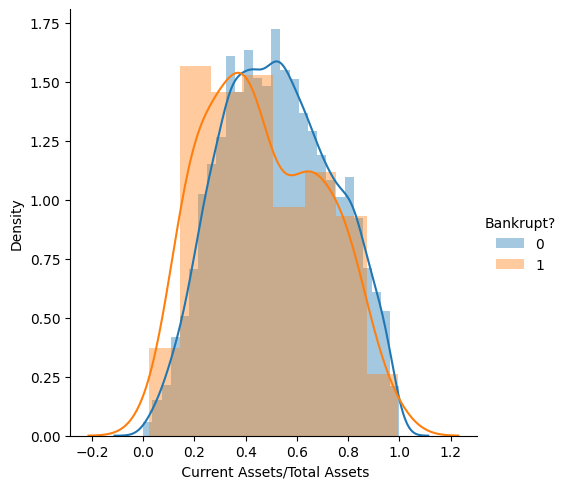

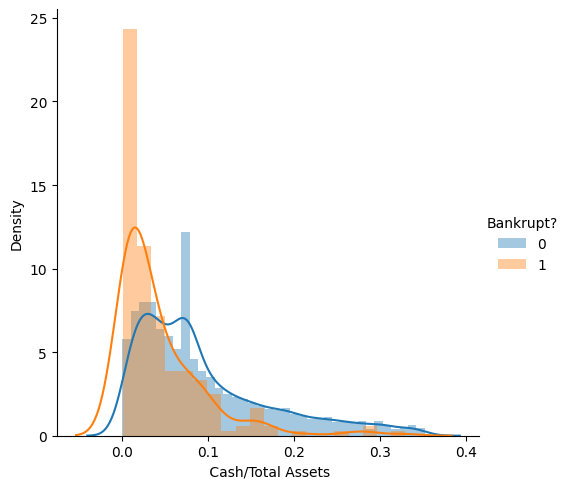

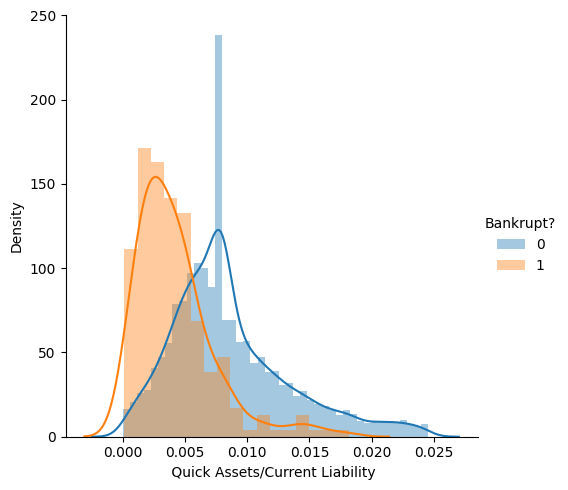

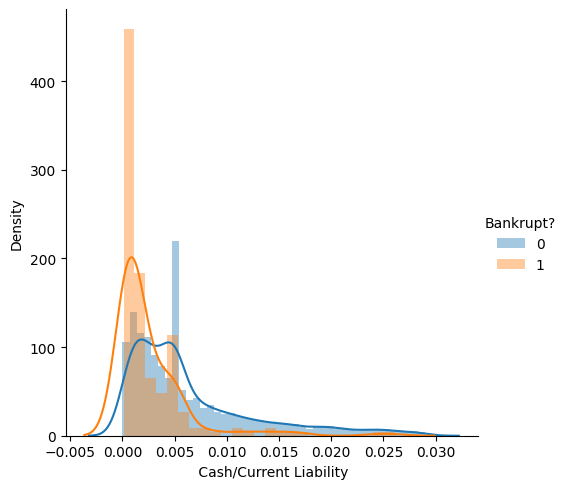

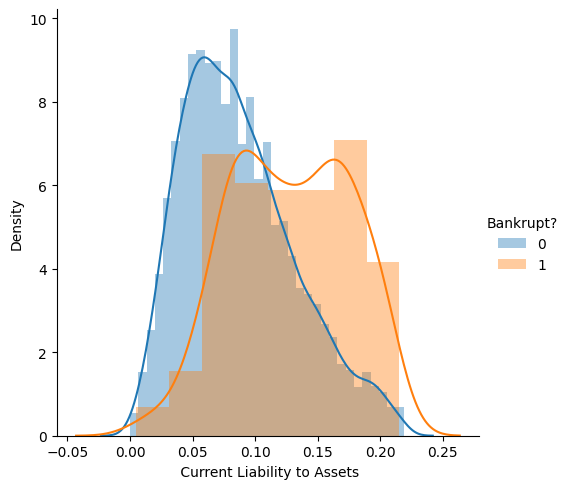

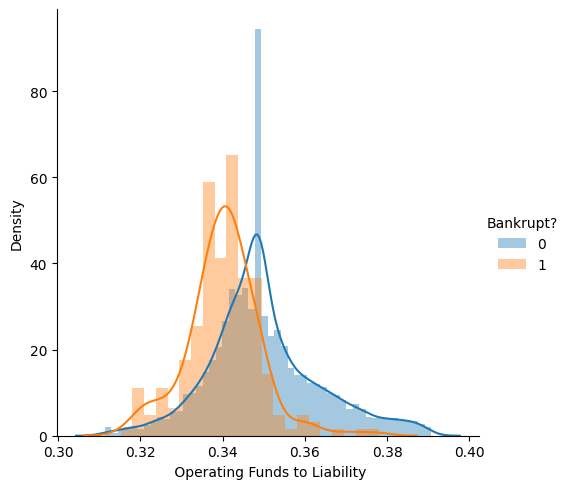

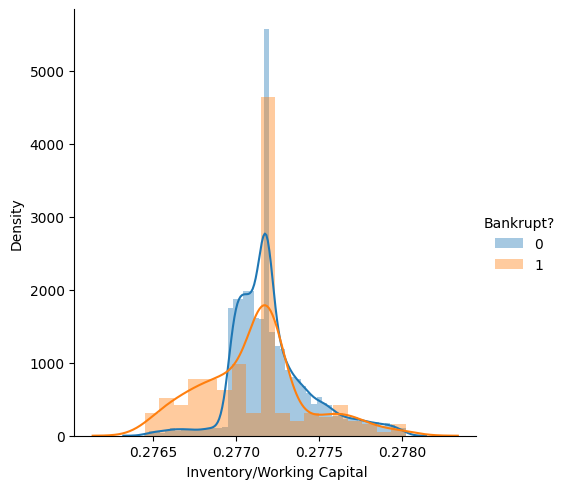

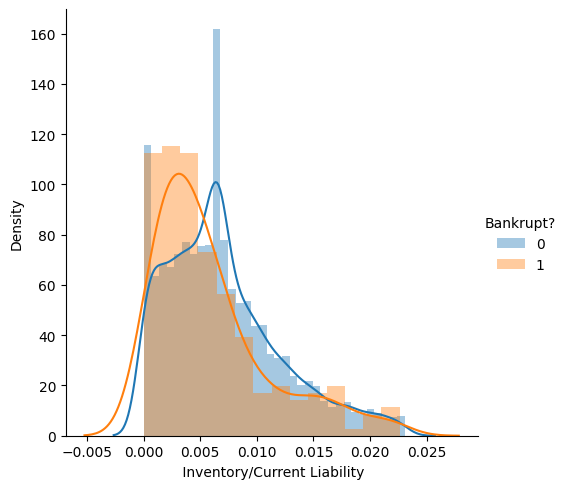

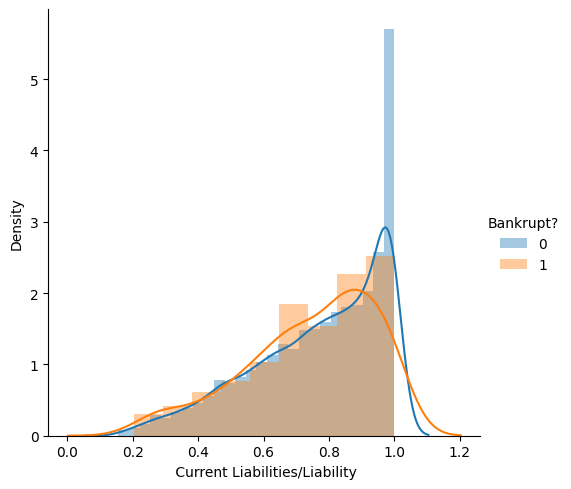

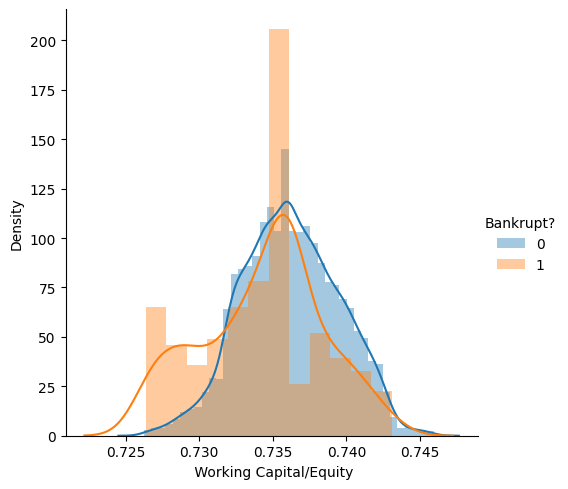

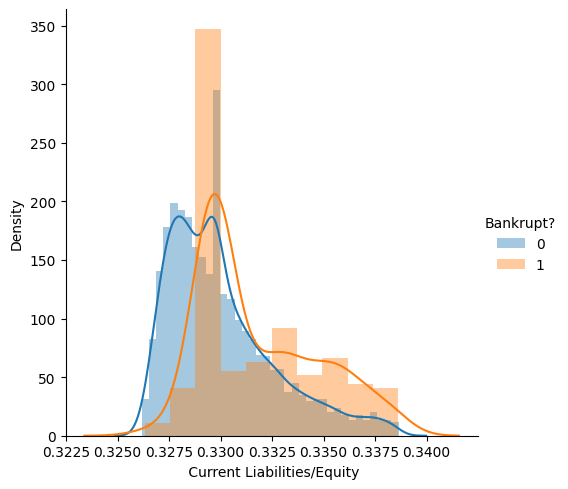

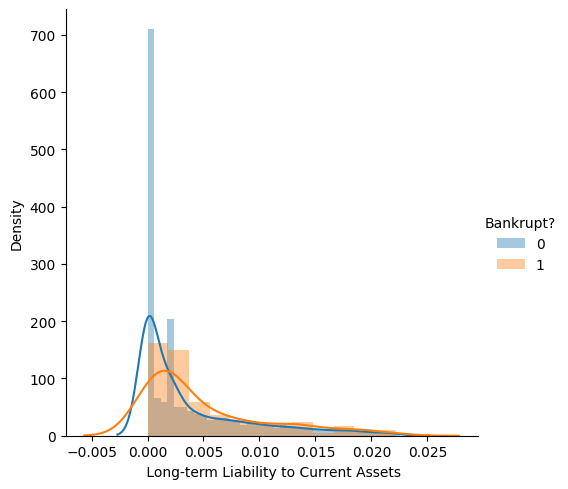

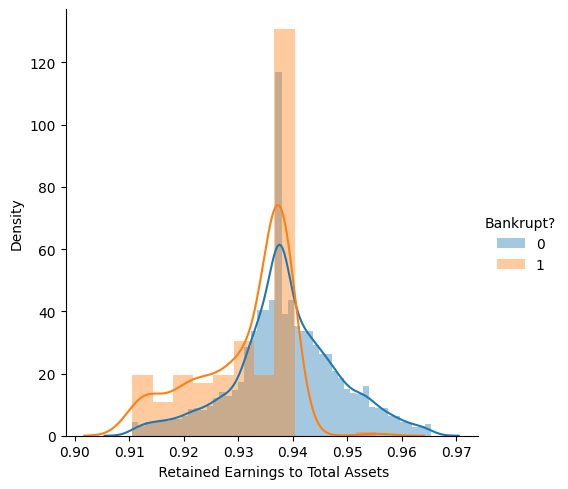

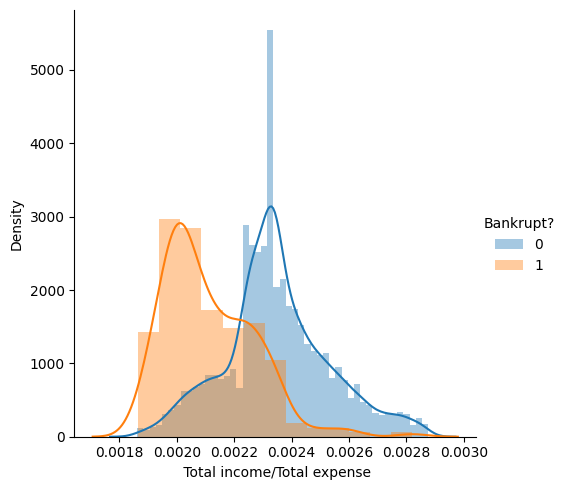

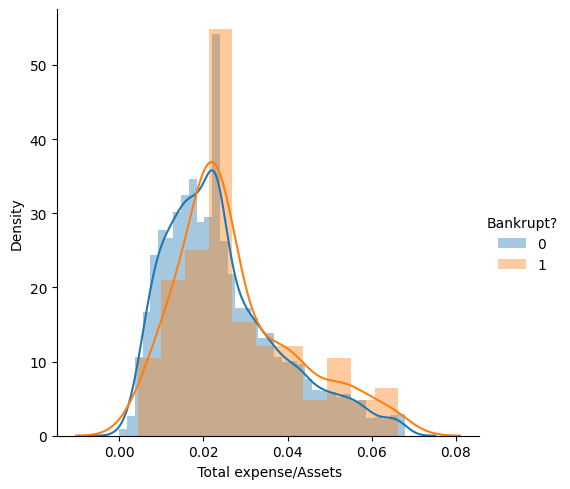

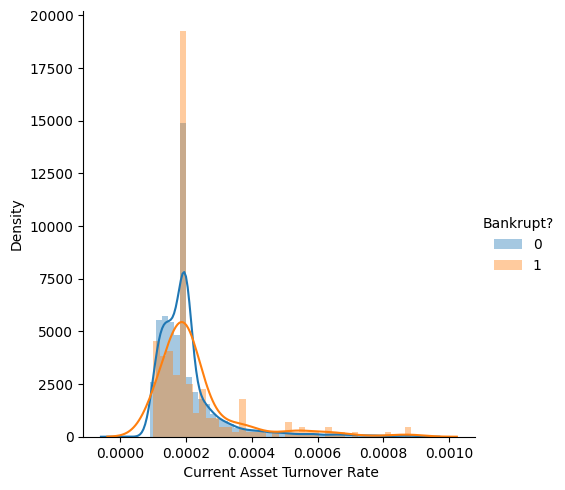

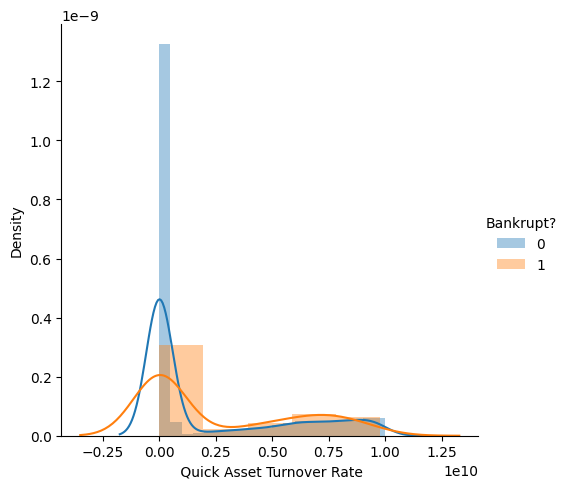

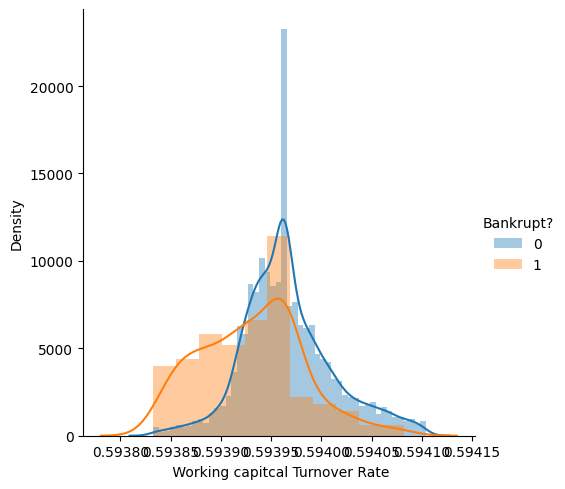

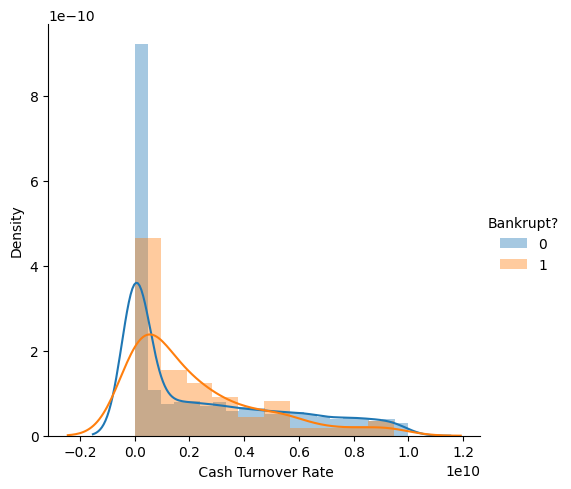

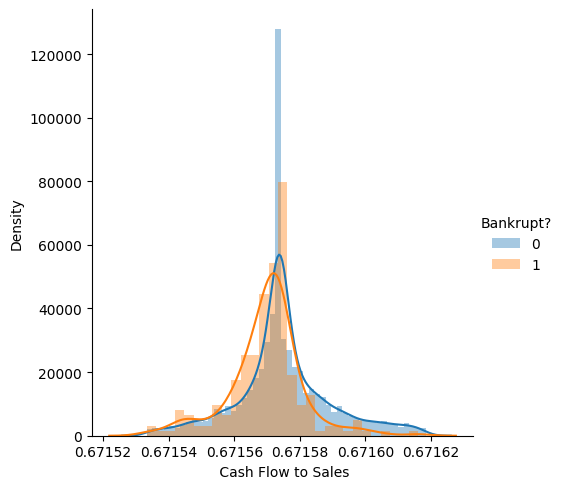

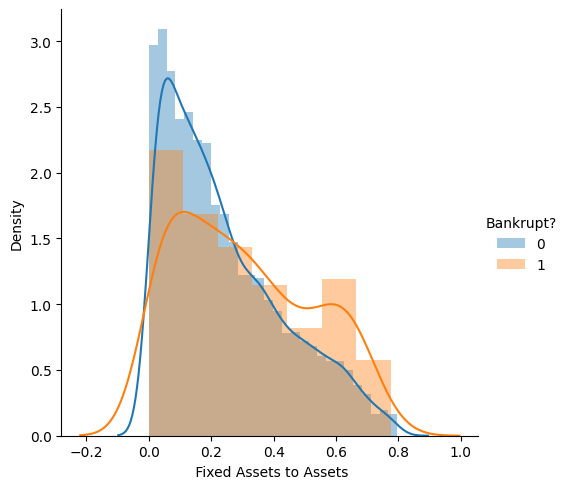

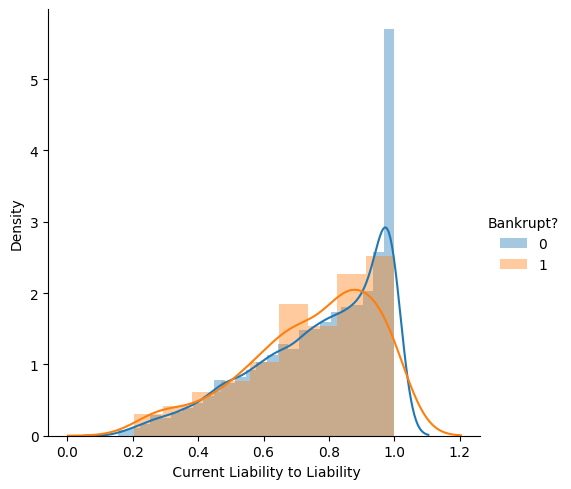

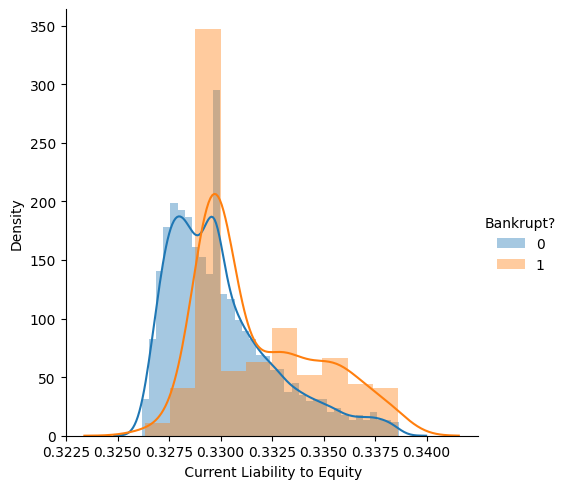

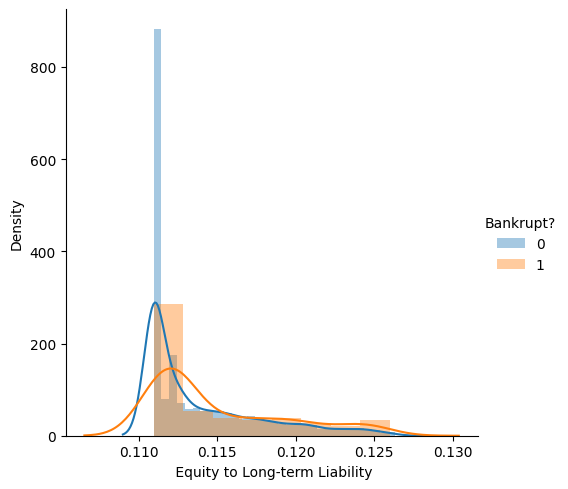

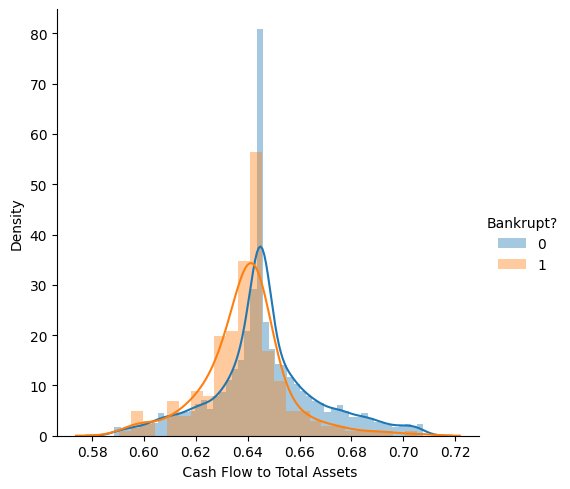

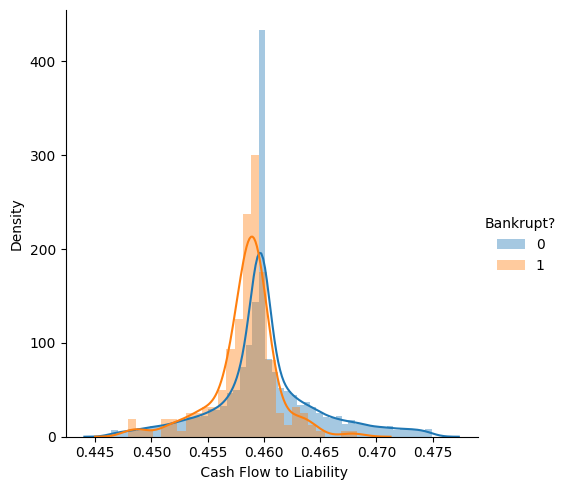

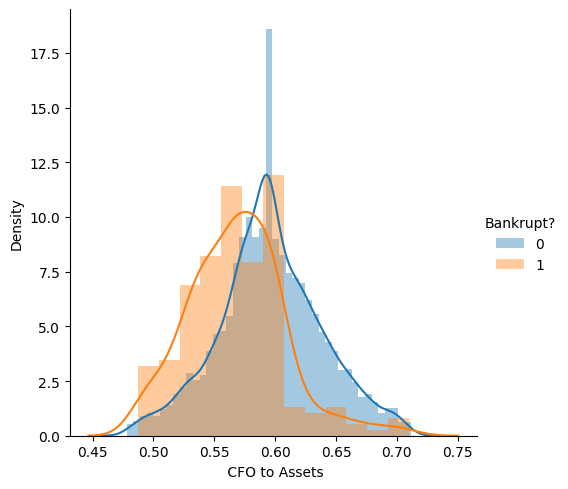

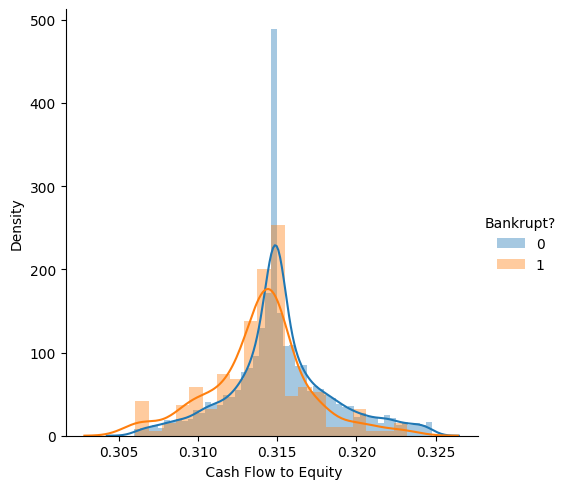

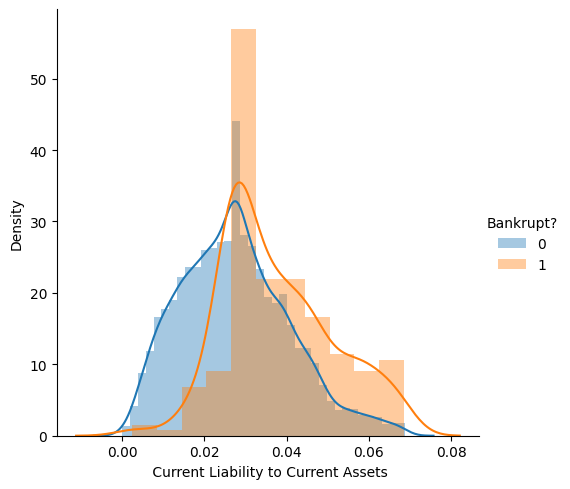

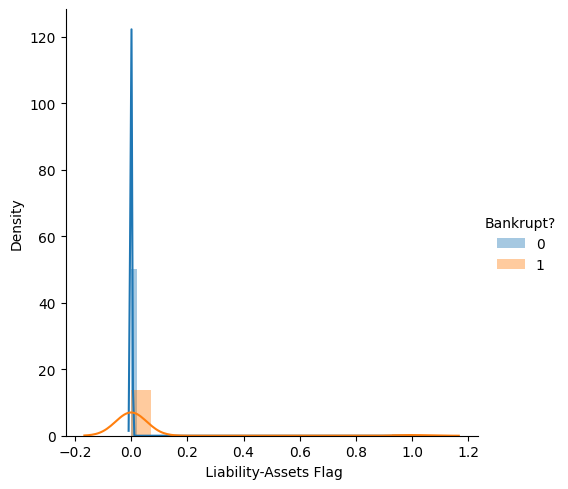

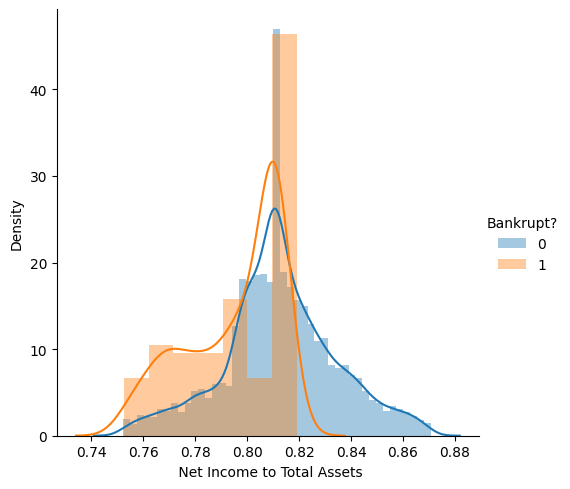

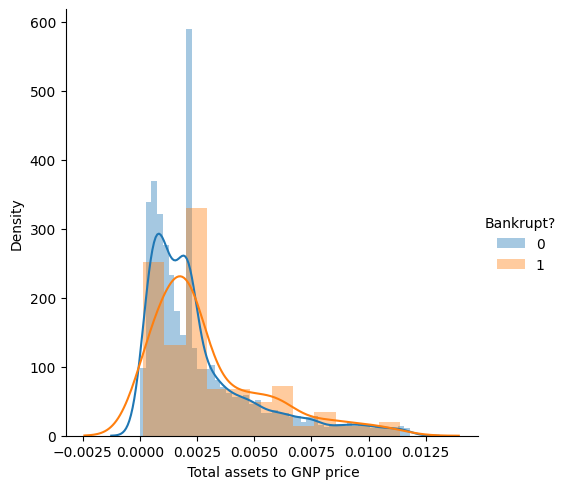

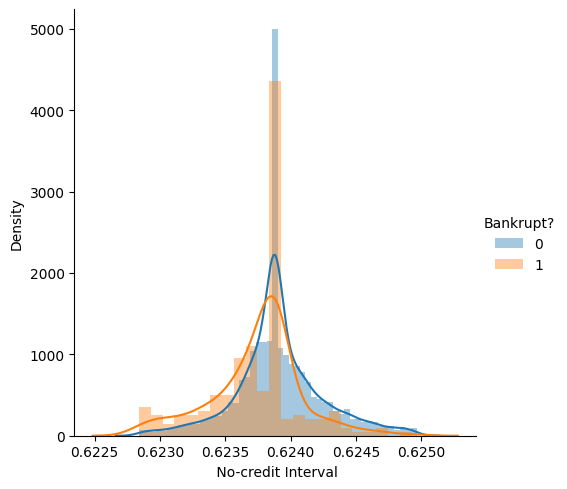

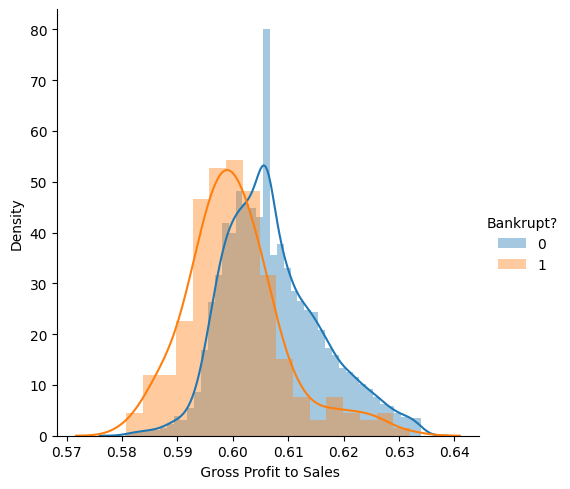

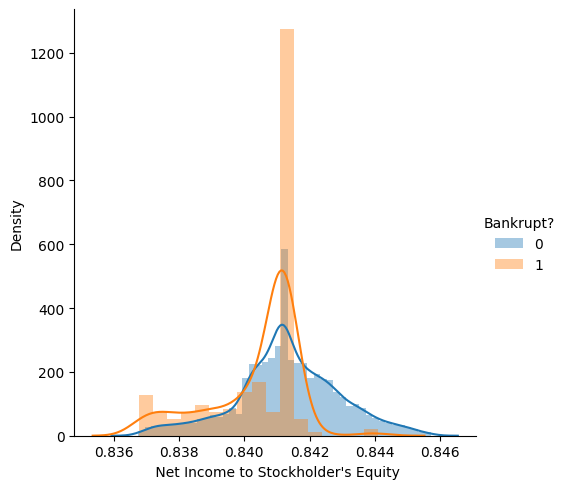

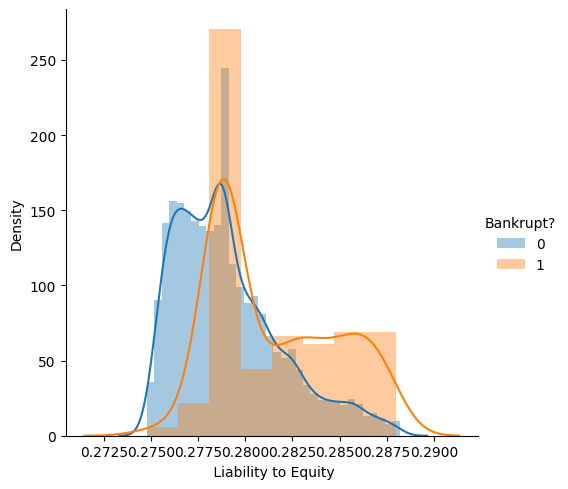

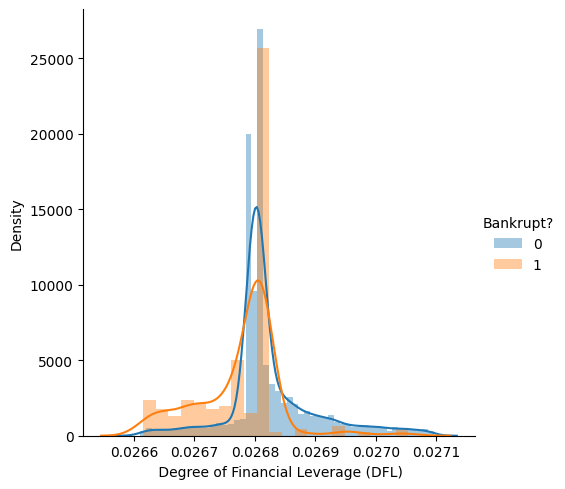

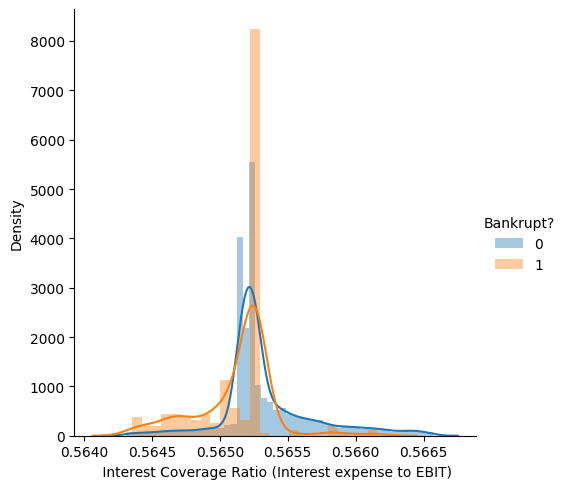

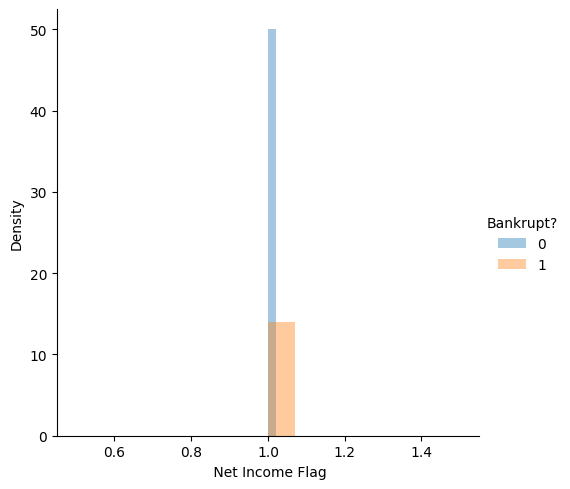

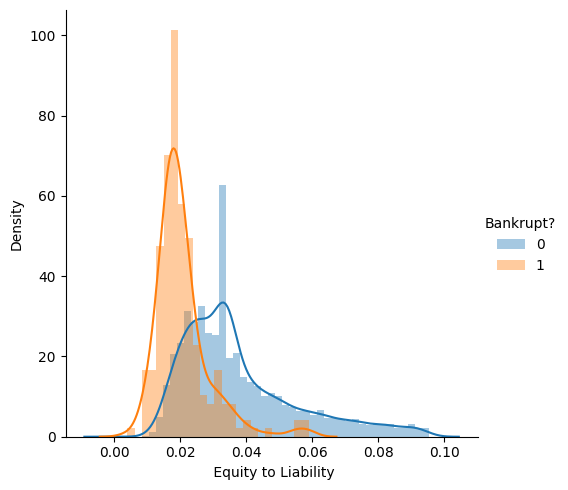

In [16]:
Df = pd.concat([X_cnn,y_cnn],axis=1)

for i in df.columns[1:]:
 sns.FacetGrid(df, hue="Bankrupt?", height=5).map(sns.distplot, i).add_legend()

In [ ]:
tmk= TomekLinks()
X_tmk , y_tmk = tmk.fit_resample(X,Y)

In [17]:
feature_select = SelectKBest(f_classif,k=30).fit(X_cnn,y_cnn)
select_features = X_cnn.columns[feature_select.get_support()]
select_features

c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [93] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax', ' Cash flow rate',
       ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)', ' Current Ratio',
       ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',
       ' Borrowing dependency', ' Operating profit/Paid-in capital',
       ' Net profit before tax/Paid-in capital',
       ' Working Capital to Total Assets', ' Quick Assets/Current Liability',
       ' Current Liability to Assets', ' Operating Funds to Liability',
       ' Current Liabilities/Equity', ' Total income/Total expense',
       ' Working capitcal Turnover Rate', ' Current Liability to

In [20]:
# split
X_train, X_test, y_train, y_test = train_test_split(X_cnn[select_features], y_cnn, test_size=0.2, random_state=42)

from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

def evaluate_models(X_train, y_train, X_test, y_test):
    models = {
        'Logistic Regression': LogisticRegression(class_weight='balanced'),
        'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100,max_depth=15),
        'Gaussian Naive Bayes': GaussianNB(),
        'Decision Tree' : DecisionTreeClassifier(),
        'SVM (Linear Kernel)': SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42),
        'SVM (RBF Kernel)': SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42),
        'SVM (Poly Kernel)': SVC(kernel='poly', class_weight='balanced', probability=True, random_state=42),
        'MLP Classifier': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
        'ANN (Custom)': MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=500, random_state=42),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
        
    }
    
    results = {}
    predictions = {}
    for model_name, model in models.items():
        # cv
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
        print(f"Cross-validation F1 scores for {model_name}: {cv_scores}")
        
        # train
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # store predictions for confusion matrix
        predictions[model_name] = y_test_pred

        # metrics
        y_train_proba = model.predict_proba(X_train) if hasattr(model, 'predict_proba') else None
        y_test_proba = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None
        
        results[model_name] = {
            'Training Accuracy': accuracy_score(y_train, y_train_pred),
            'Test Accuracy': accuracy_score(y_test, y_test_pred),
            'Training Precision': precision_score(y_train, y_train_pred),
            'Test Precision': precision_score(y_test, y_test_pred),
            'Training Recall': recall_score(y_train, y_train_pred),
            'Test Recall': recall_score(y_test, y_test_pred),
            'Training F1 Score': f1_score(y_train, y_train_pred),
            'Test F1 Score': f1_score(y_test, y_test_pred),
            'Training ROC AUC': roc_auc_score(y_train, y_train_proba[:, 1]) if y_train_proba is not None else 'N/A',
            'Test ROC AUC': roc_auc_score(y_test, y_test_proba[:, 1]) if y_test_proba is not None else 'N/A'
        }
        
        # Log loss
        if y_train_proba is not None and y_test_proba is not None:
            results[model_name]['Training Log Loss'] = log_loss(y_train, y_train_proba)
            results[model_name]['Test Log Loss'] = log_loss(y_test, y_test_proba)
        else:
            results[model_name]['Training Log Loss'] = 'N/A'
            results[model_name]['Test Log Loss'] = 'N/A'
    
    return results, predictions, models

# Call the updated function
results_over_under, predictions, original_models = evaluate_models(X_train, y_train, X_test, y_test)
from sklearn.metrics import ConfusionMatrixDisplay
# Print results and confusion matrix
for model_name, metrics in results_over_under.items():
    print(f"Model: {model_name}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    
    # Confusion matrix
    print(f"Confusion Matrix for {model_name}:")
    cm = (confusion_matrix(y_test, predictions[model_name]))
    print(cm) 


Cross-validation F1 scores for Logistic Regression: [0.62       0.58823529 0.55769231 0.63829787 0.52631579]
Cross-validation F1 scores for Random Forest: [0.59016393 0.66666667 0.52307692 0.6984127  0.55737705]
Cross-validation F1 scores for Gaussian Naive Bayes: [0.60952381 0.56862745 0.57425743 0.61052632 0.55670103]
Cross-validation F1 scores for Decision Tree: [0.55072464 0.58227848 0.56410256 0.44444444 0.61333333]
Cross-validation F1 scores for SVM (Linear Kernel): [0.61538462 0.59615385 0.53703704 0.64583333 0.54      ]
Cross-validation F1 scores for SVM (RBF Kernel): [0.60784314 0.59615385 0.53703704 0.64583333 0.54      ]
Cross-validation F1 scores for SVM (Poly Kernel): [0.65346535 0.58       0.54       0.625      0.55102041]


c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-validation F1 scores for MLP Classifier: [0.52307692 0.54545455 0.47457627 0.6        0.45614035]
Cross-validation F1 scores for ANN (Custom): [0.52307692 0.54545455 0.5625     0.625      0.5625    ]


c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:40:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:40:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:40:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

Cross-validation F1 scores for XGBoost: [0.64788732 0.6557377  0.5625     0.59016393 0.64705882]
Model: Logistic Regression
  Training Accuracy: 0.7763012181616833
  Test Accuracy: 0.8053097345132744
  Training Precision: 0.4620253164556962
  Test Precision: 0.4868421052631579
  Training Recall: 0.8202247191011236
  Test Recall: 0.8809523809523809
  Training F1 Score: 0.5910931174089069
  Test F1 Score: 0.6271186440677966
  Training ROC AUC: 0.861325067803177
  Test ROC AUC: 0.8762939958592132
  Training Log Loss: 0.4994430628666237
  Test Log Loss: 0.48933956857621663
Confusion Matrix for Logistic Regression:
[[145  39]
 [  5  37]]
Model: Random Forest
  Training Accuracy: 1.0
  Test Accuracy: 0.8938053097345132
  Training Precision: 1.0
  Test Precision: 0.7368421052631579
  Training Recall: 1.0
  Test Recall: 0.6666666666666666
  Training F1 Score: 1.0
  Test F1 Score: 0.7
  Training ROC AUC: 1.0
  Test ROC AUC: 0.9109083850931676
  Training Log Loss: 0.08390194823288974
  Test Log 

c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:40:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


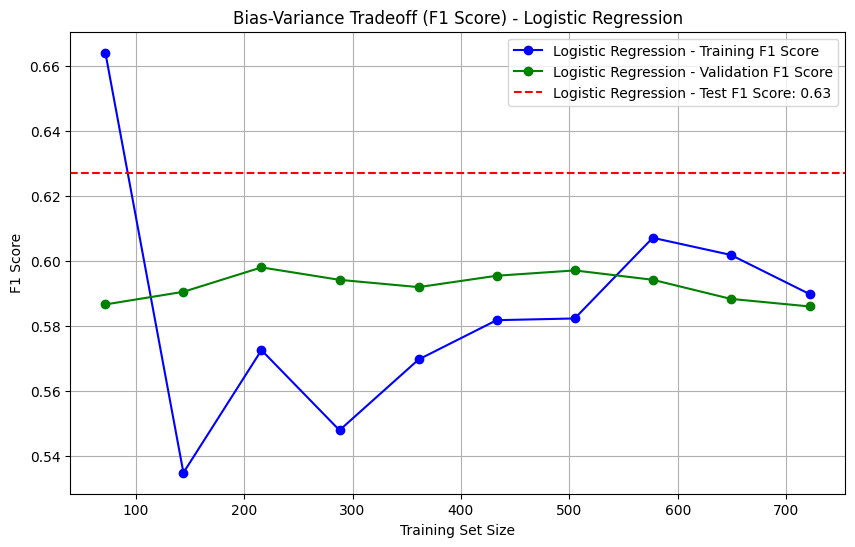

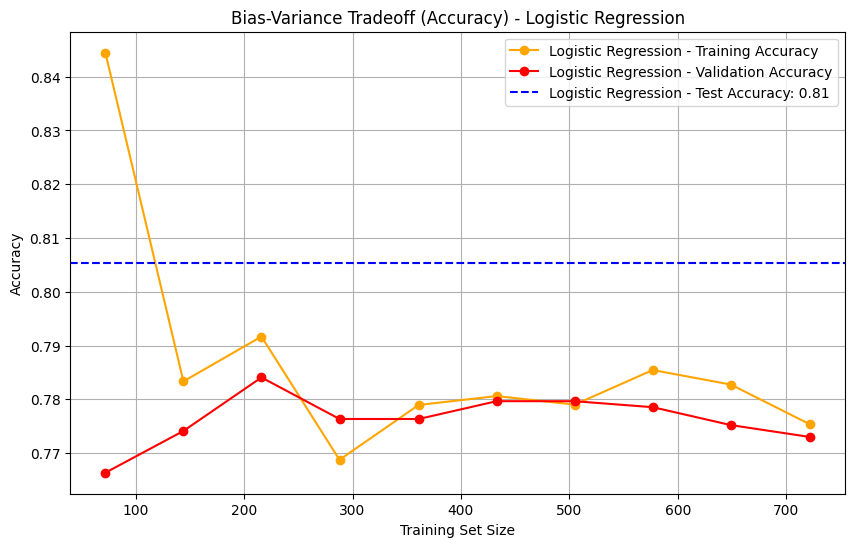

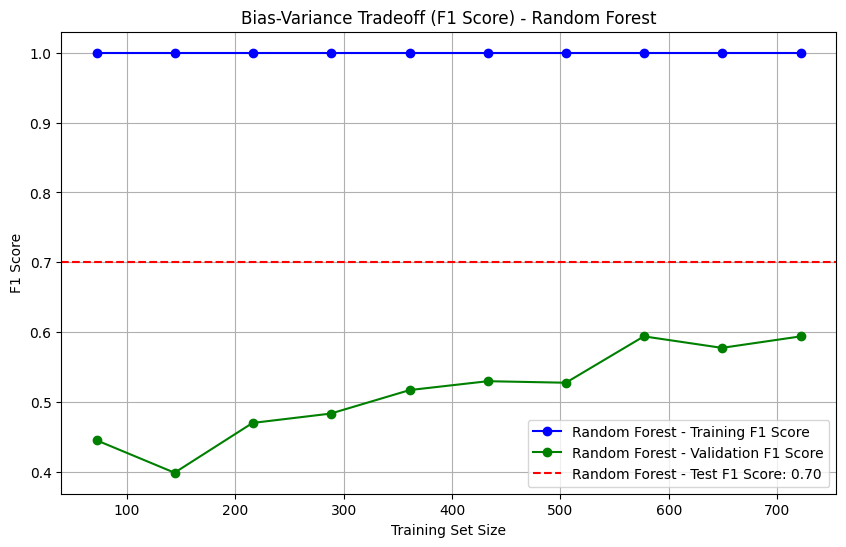

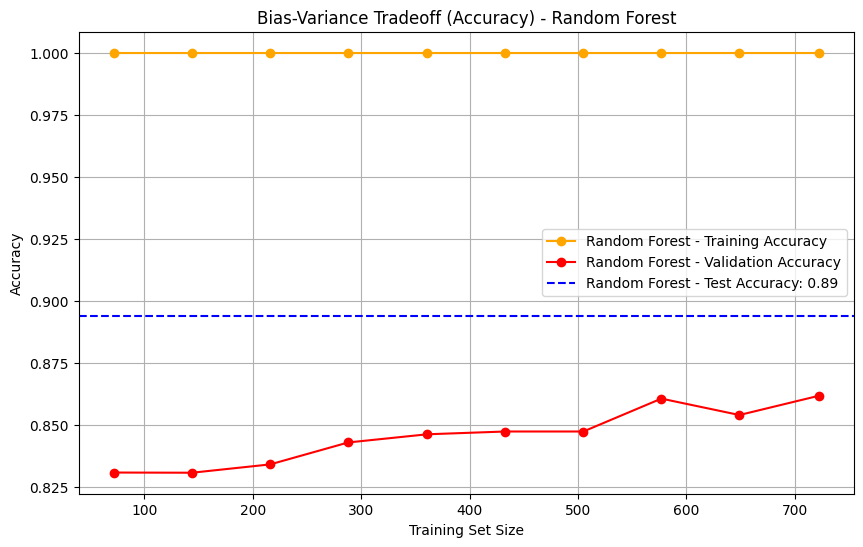

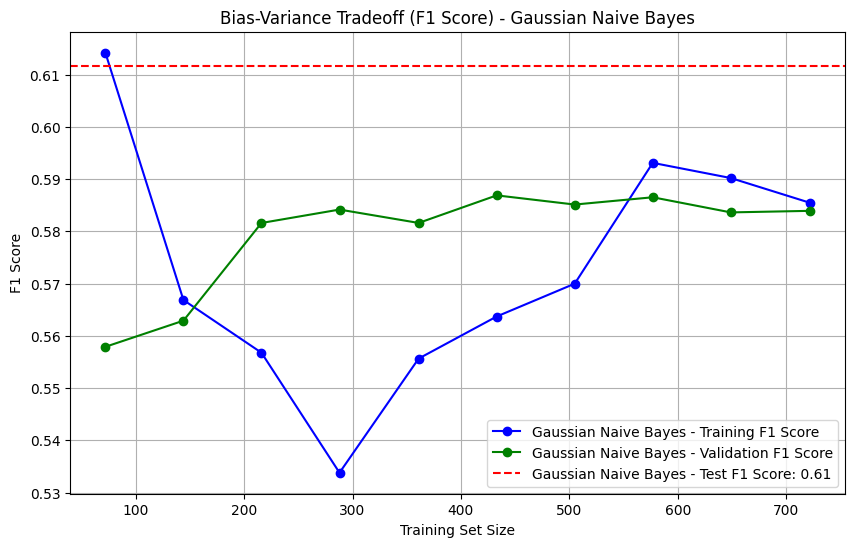

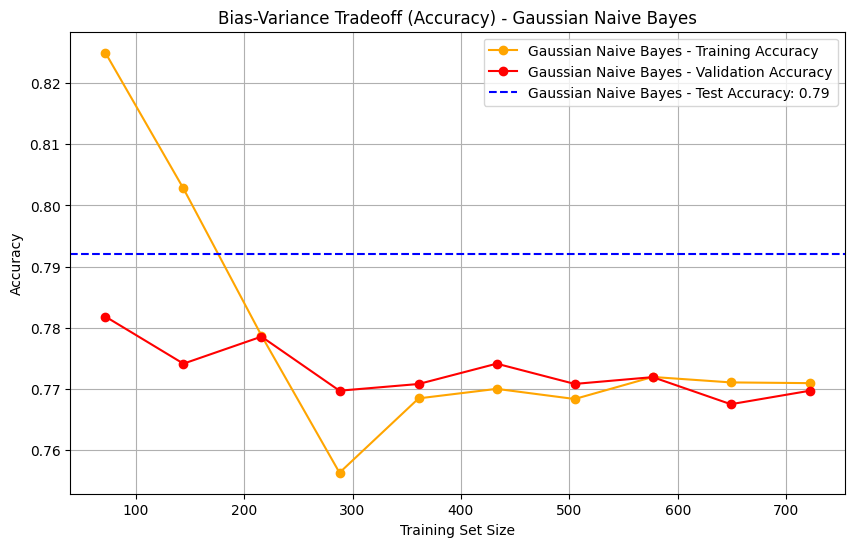

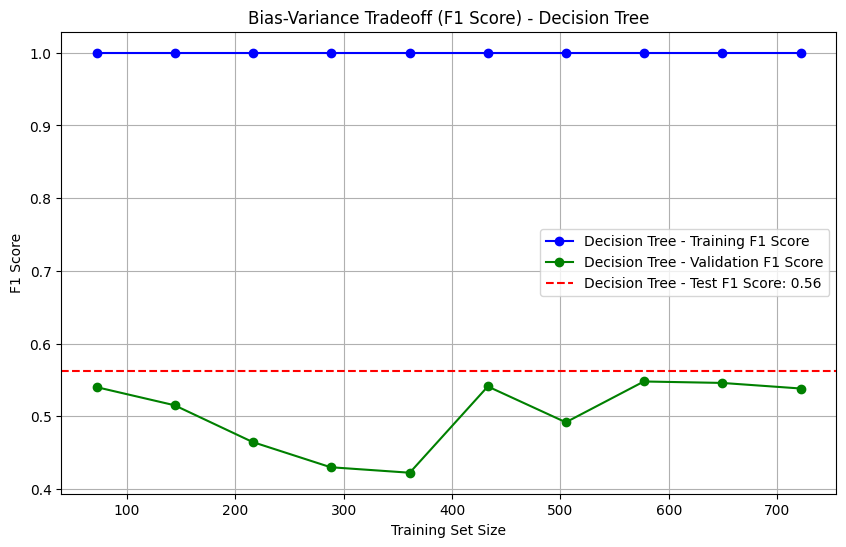

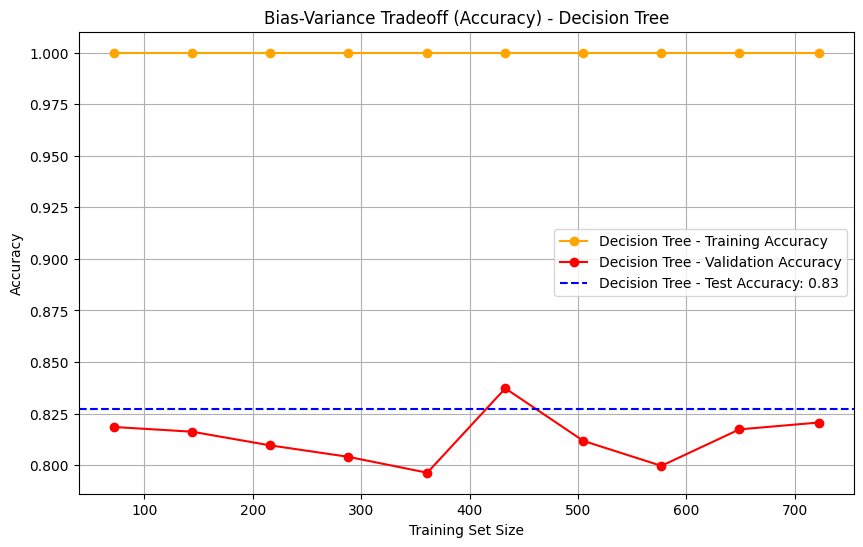

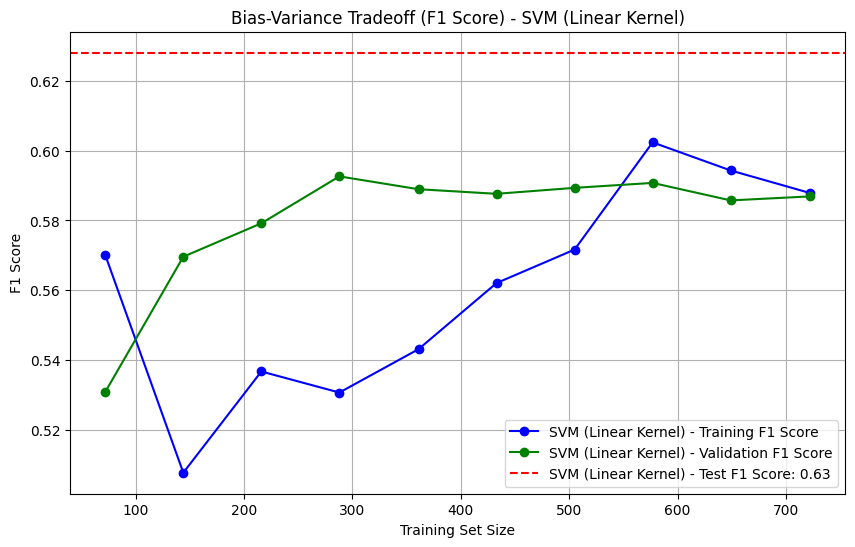

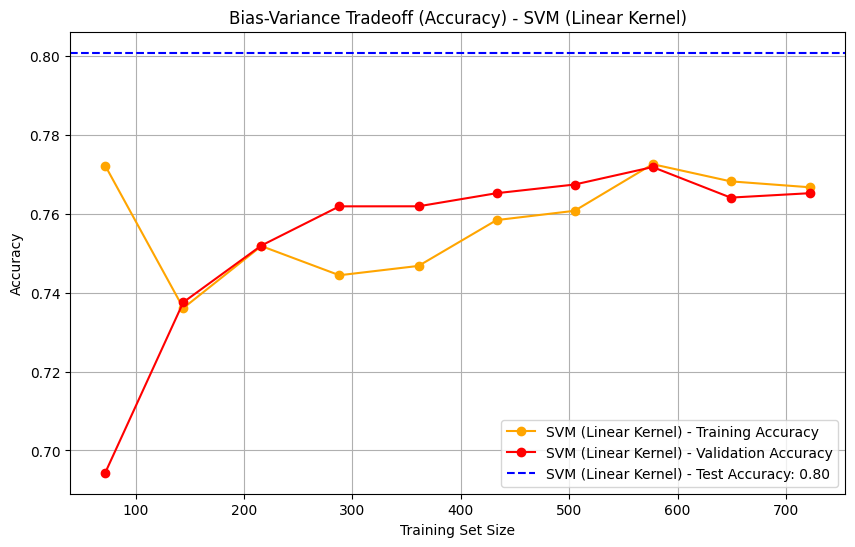

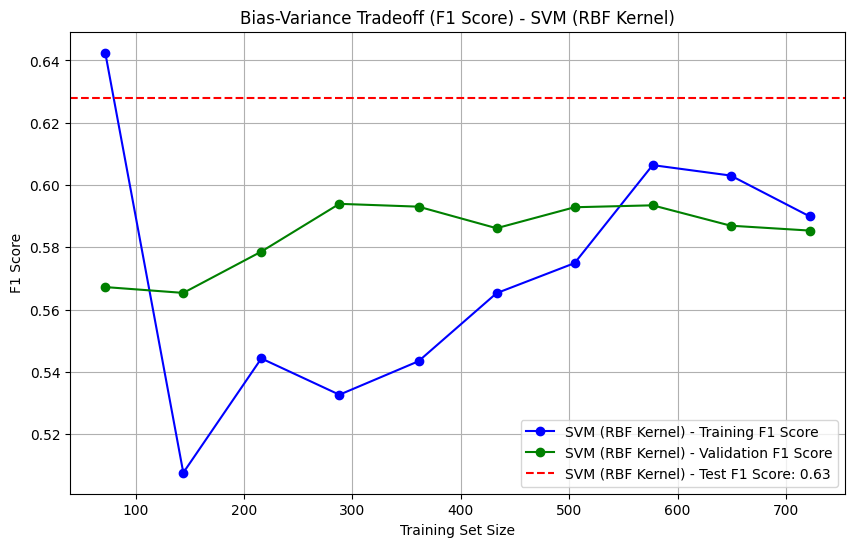

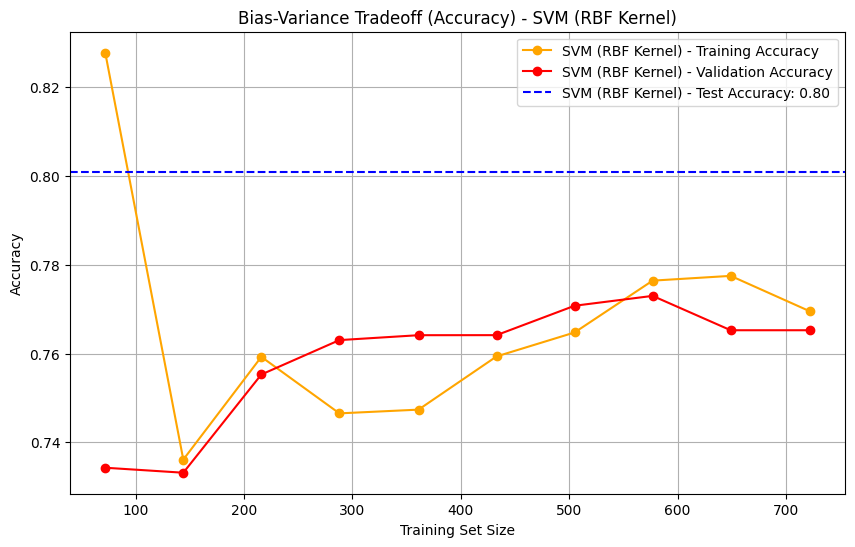

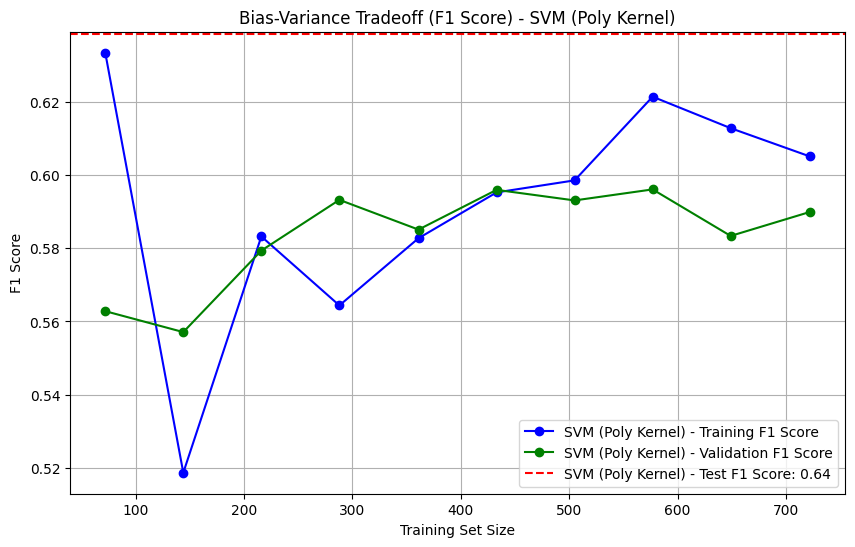

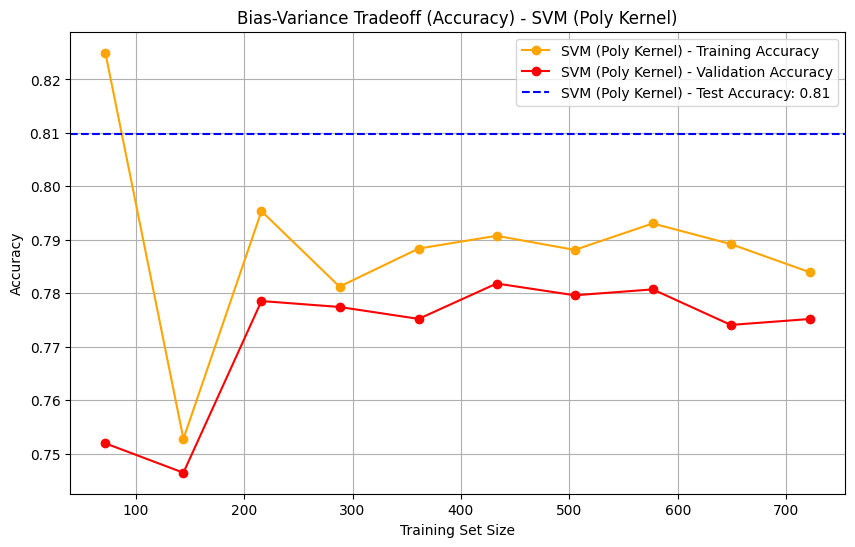

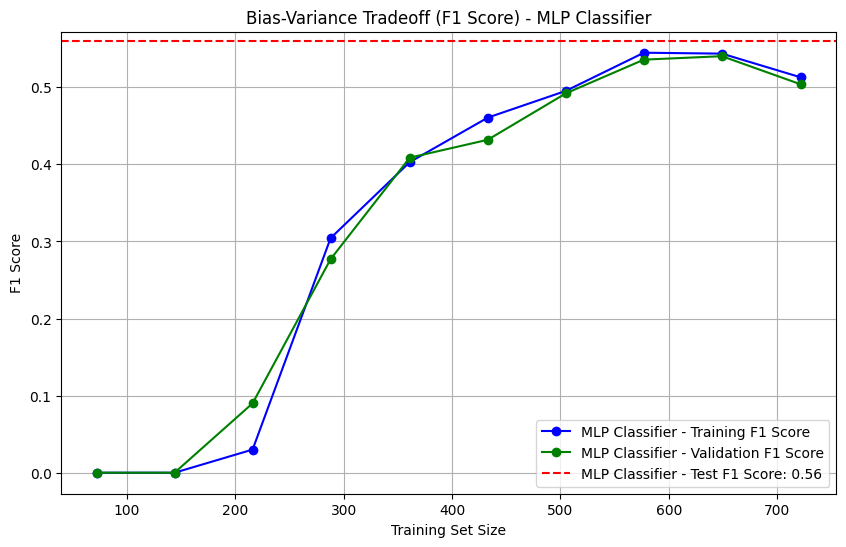

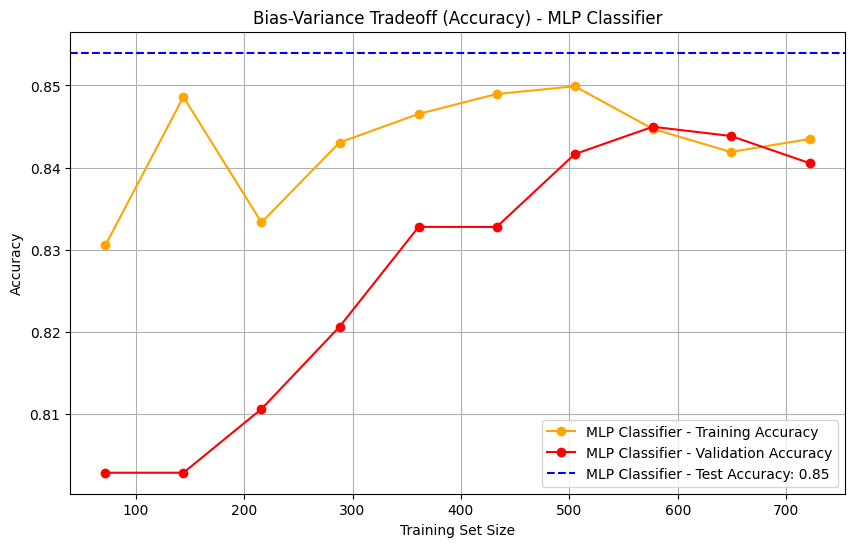

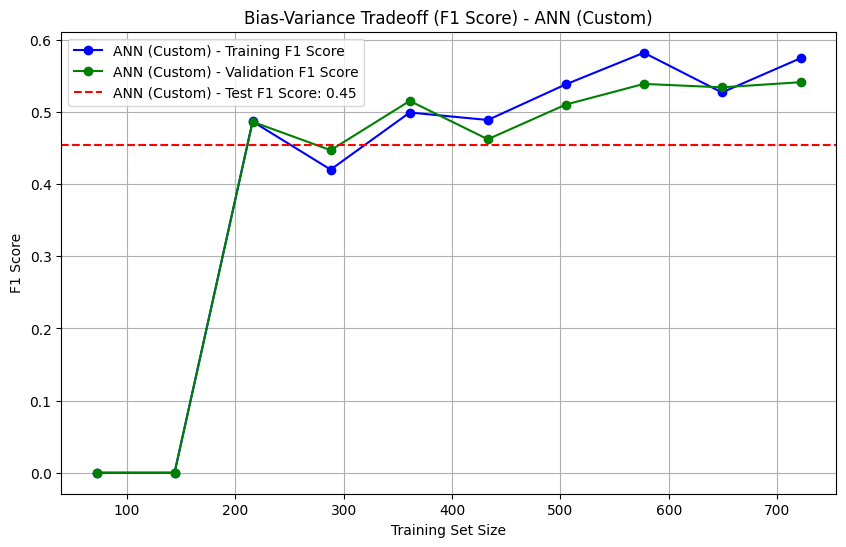

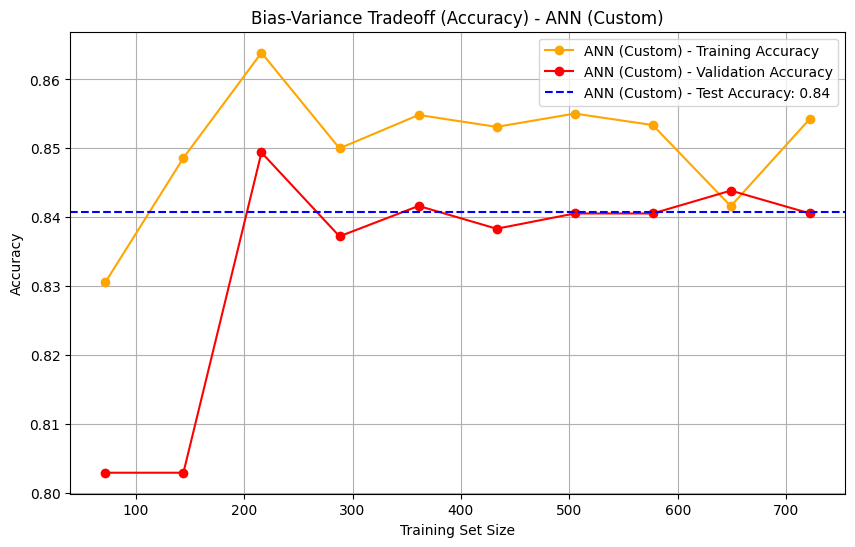

c:\Users\Rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:40:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


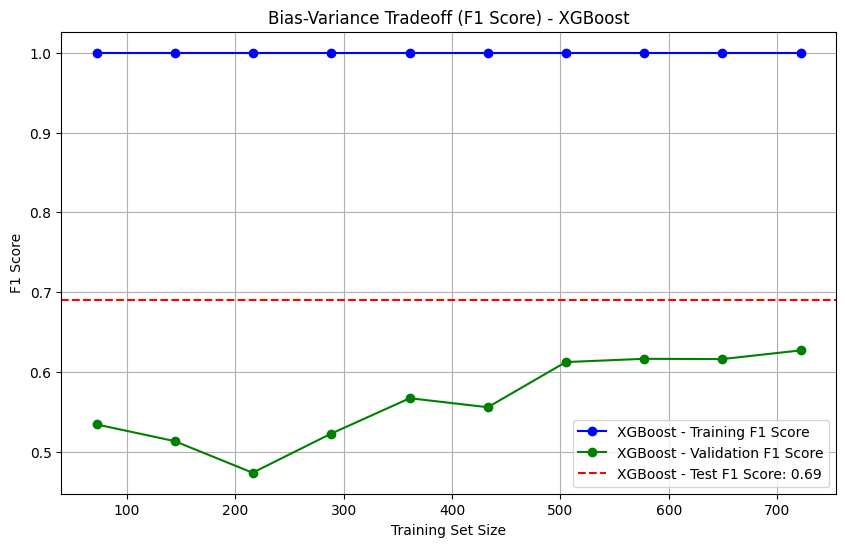

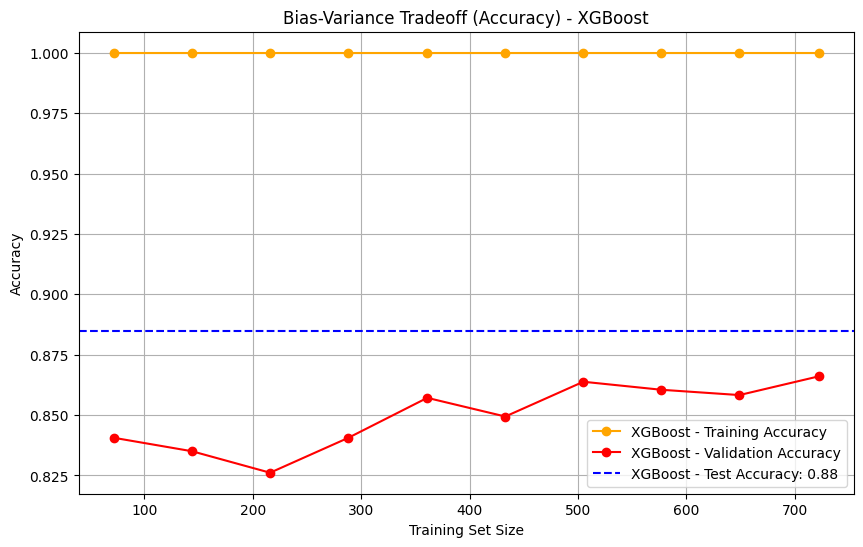

In [21]:
def plot_bias_variance_tradeoff(models, X_train, y_train, X_test, y_test):
    for model_name, model in models.items():
        
        train_sizes, train_f1_scores, test_f1_scores = learning_curve(model, X_train, y_train, cv=5, scoring='f1', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

        _, train_acc_scores, test_acc_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

        # F1 Scores
        train_f1_mean = np.mean(train_f1_scores, axis=1)
        test_f1_mean = np.mean(test_f1_scores, axis=1)
        train_f1_std = np.std(train_f1_scores, axis=1)
        test_f1_std = np.std(test_f1_scores, axis=1)

        # Accuracy
        train_acc_mean = np.mean(train_acc_scores, axis=1)
        test_acc_mean = np.mean(test_acc_scores, axis=1)
        train_acc_std = np.std(train_acc_scores, axis=1)
        test_acc_std = np.std(test_acc_scores, axis=1)

        model.fit(X_train, y_train)  
        test_f1 = f1_score(y_test, model.predict(X_test))
        test_acc = accuracy_score(y_test, model.predict(X_test))

        # Plot F1 Score
        plt.figure(figsize=(10, 6))
        plt.plot(train_sizes, train_f1_mean, label=f'{model_name} - Training F1 Score', marker='o', color='blue')
        plt.plot(train_sizes, test_f1_mean, label=f'{model_name} - Validation F1 Score', marker='o', color='green')
        plt.axhline(y=test_f1, color='red', linestyle='--', label=f'{model_name} - Test F1 Score: {test_f1:.2f}')

        plt.xlabel('Training Set Size')
        plt.ylabel('F1 Score')
        plt.title(f'Bias-Variance Tradeoff (F1 Score) - {model_name}')
        plt.legend(loc='best')
        plt.grid()
        plt.show()

        # Plot Accuracy
        plt.figure(figsize=(10, 6))
        plt.plot(train_sizes, train_acc_mean, label=f'{model_name} - Training Accuracy', marker='o', color='orange')
        plt.plot(train_sizes, test_acc_mean, label=f'{model_name} - Validation Accuracy', marker='o', color='red')
        plt.axhline(y=test_acc, color='blue', linestyle='--', label=f'{model_name} - Test Accuracy: {test_acc:.2f}')

        plt.xlabel('Training Set Size')
        plt.ylabel('Accuracy')
        plt.title(f'Bias-Variance Tradeoff (Accuracy) - {model_name}')
        plt.legend(loc='best')
        plt.grid()
        plt.show()

# Call the function to plot the graphs separately with test data
plot_bias_variance_tradeoff(original_models, X_train, y_train, X_test, y_test)


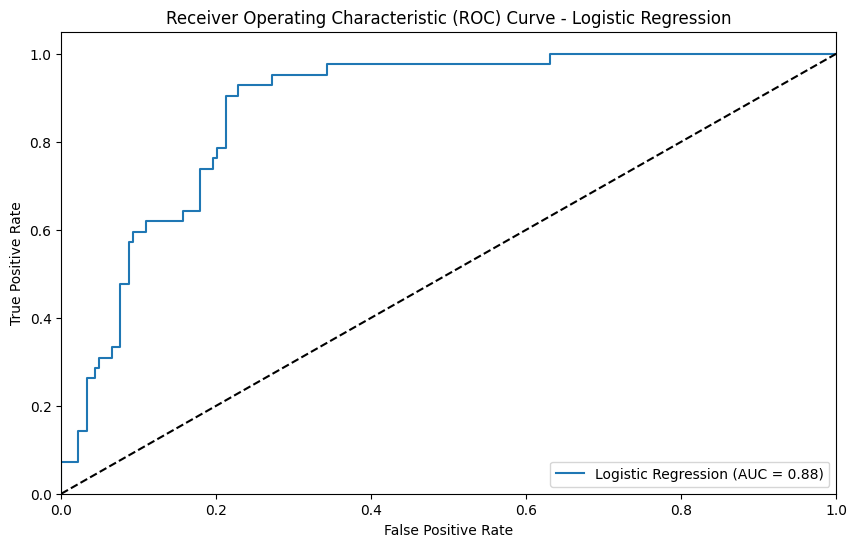

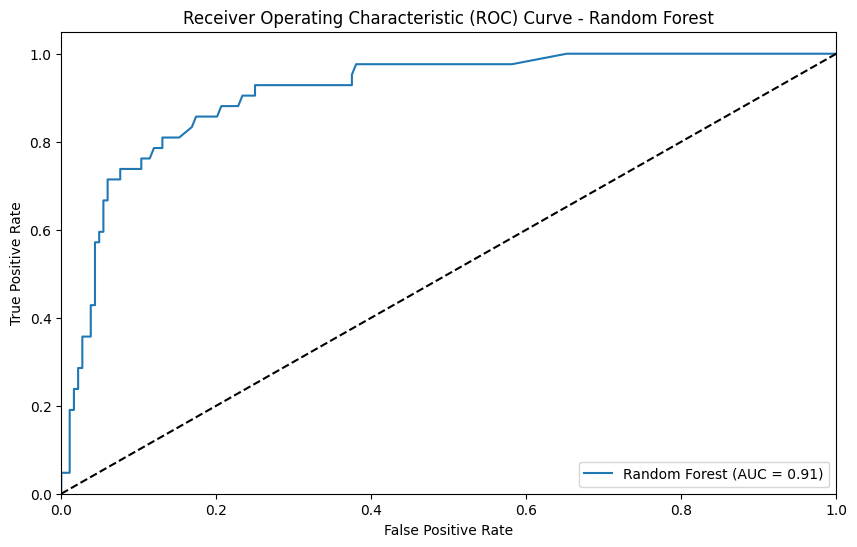

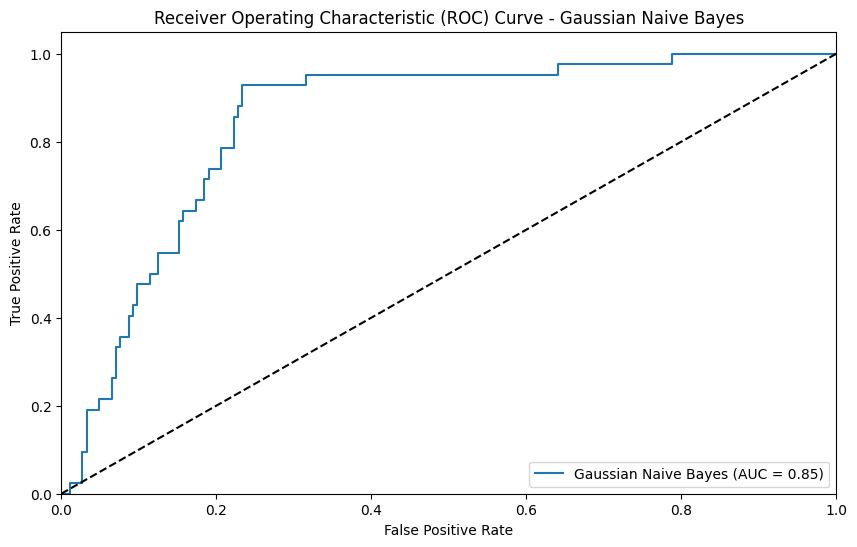

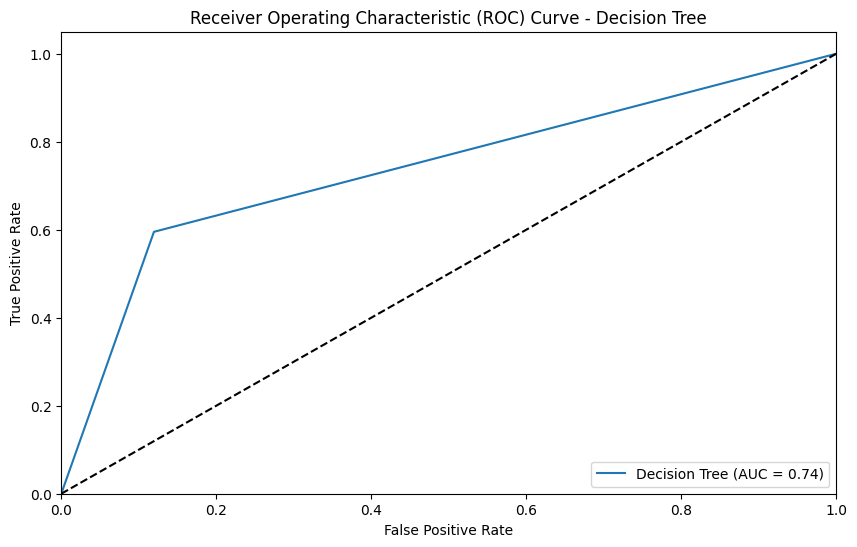

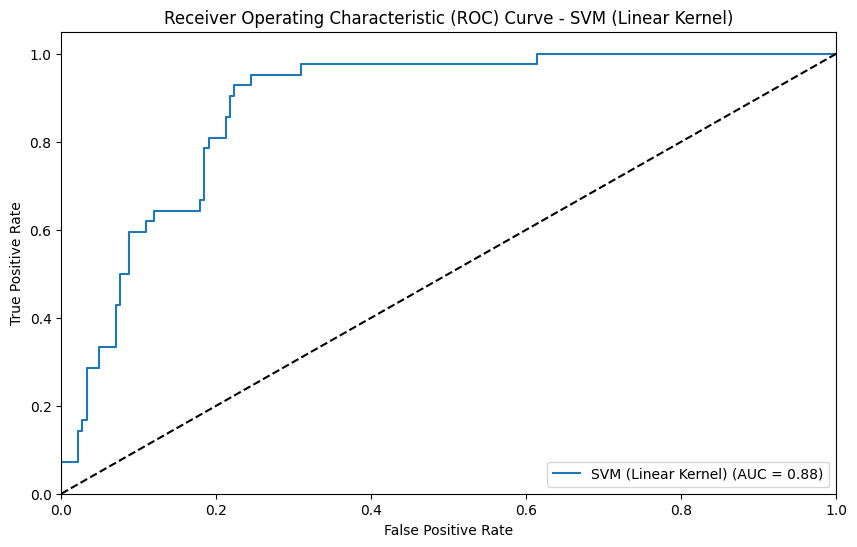

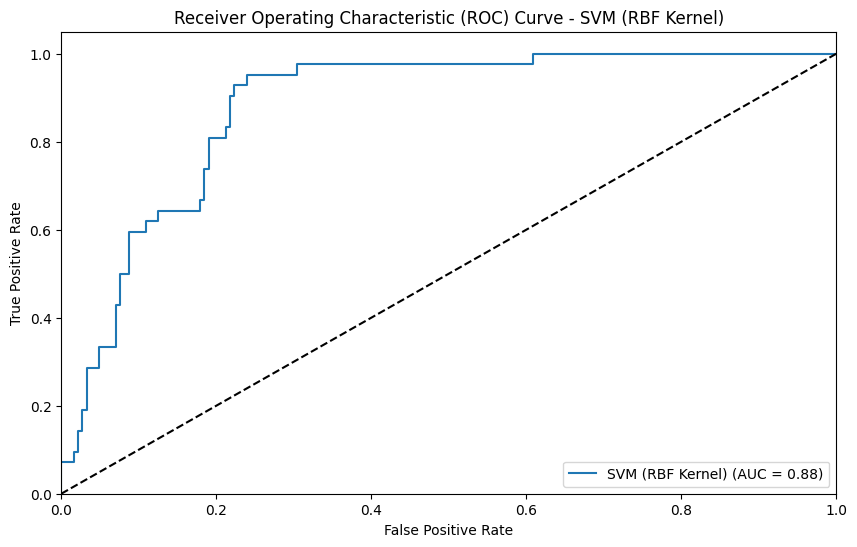

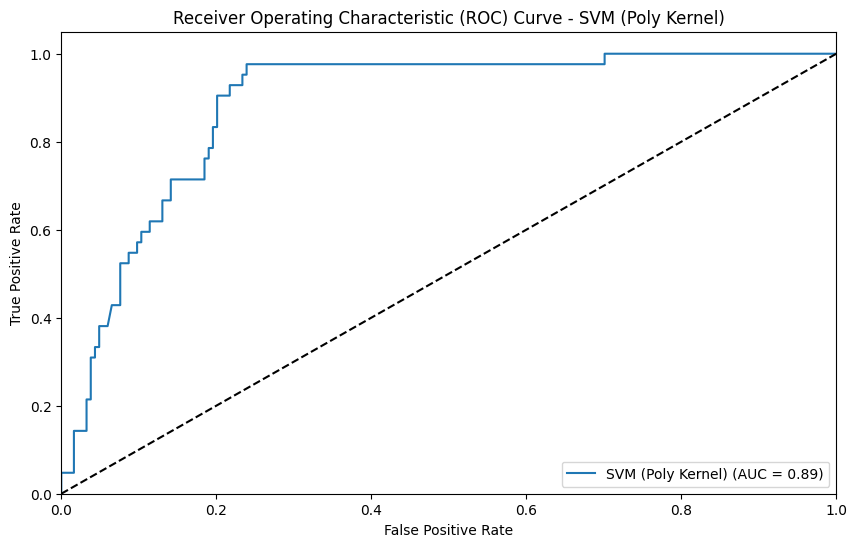

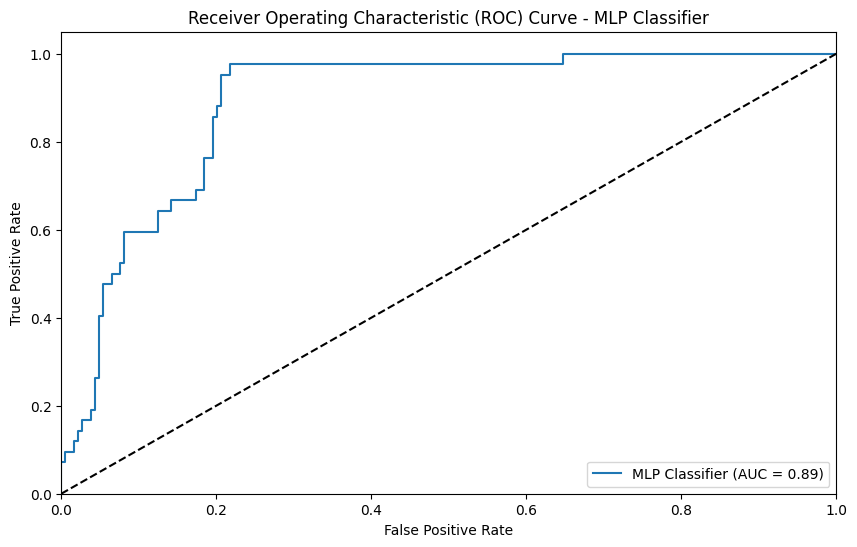

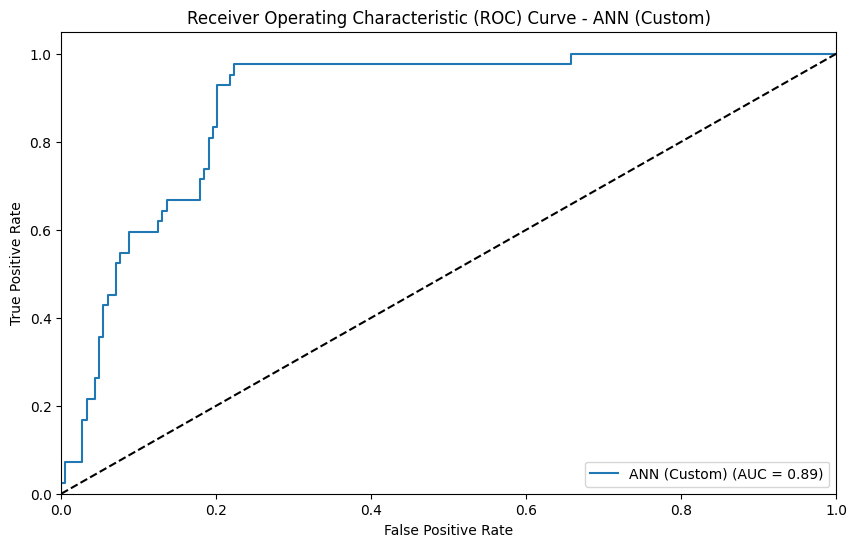

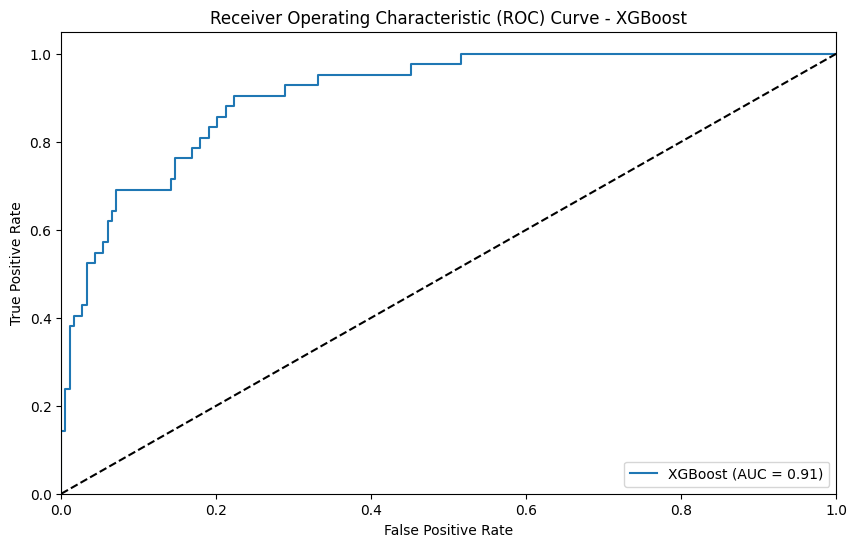

In [22]:
def plot_roc_auc(models, X_test, y_test):
    for model_name, model in models.items():
        plt.figure(figsize=(10, 6))
        if hasattr(model, 'predict_proba'):
            y_test_proba = model.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_test_proba)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
        plt.legend(loc="lower right")
        plt.show()
        
plot_roc_auc(original_models, X_test, y_test)

In [23]:
# (b) over & under using SMOTE, ADASYN, Tomek, CNN
'''
- Add one more EDA
- Outlier fix
- Try diff params

Optional : SMOTE, ADAYSN etc

Report:
- Literature Review
- Inferences/ Analysis
'''

'\n- Add one more EDA\n- Outlier fix\n- Try diff params\n\nOptional : SMOTE, ADAYSN etc\n\nReport:\n- Literature Review\n- Inferences/ Analysis\n'